# Imports:

In [664]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from datetime import datetime
from datetime import timedelta as dt
from obspy.core.utcdatetime import UTCDateTime  

# Preliminary testing and examination of dataset:

In [665]:
filepath_picks = ""
test_pick = "F:\GitHub_files\FM_Segmentation_DAS\src\data\pick_masking\CIDAS_picks.csv"

def read_pick(pick):
    df = pd.read_csv(pick)
    return df

In [666]:
read_pick(test_pick)


C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\3949923458.py:5: DtypeWarning: Columns (7,8,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(pick)


event_id source_type station_network_code station_channel_code  \
0                                                                      
1                                         CIDAS                        
2                                         CIDAS                        
3                                         CIDAS                        
4                                         CIDAS                        
...        ...         ...                  ...                  ...   
42746                                     CIDAS                        
42747                                     CIDAS                        
42748                                     CIDAS                        
42749                                     CIDAS                        
42750                                     CIDAS                        

      station_code station_location_code station_latitude_deg  \
0                                                               
1             das0                              59.3535133831   
2             das0                              59.3535133831   
3             das0                              59.3535133831   
4             das0                              59.3535133831   
...            ...                   ...                  ...   
42746      das4490                                   59.58414   
42747      das4490                                   59.58414   
42748      das4490                                   59.58414   
42749      das4490                                   59.58414   
42750      das4490                                   59.58414   

      station_longitude_deg station_elevation_m trace_name  \
0                                                            
1            -152.119676244      -62.9264913353              
2            -152.119676244      -62.9264913353              
3            -152.119676244      -62.9264913353              
4            -152.119676244      -62.9264913353              
...                     ...                 ...        ...   
42746           -152.343681          -55.999752              
42747           -152.343681          -55.999752              
42748           -152.343681          -55.999752              
42749           -152.343681          -55.999752              
42750           -152.343681          -55.999752              

      trace_sampling_rate_hz             trace_start_time  \
0                                                           
1                         25  2023-12-30T22:35:57.200000Z   
2                         25  2023-12-30T19:35:57.200000Z   
3                         25  2023-12-30T08:00:57.200000Z   
4                         25  2023-12-29T11:33:57.200000Z   
...                      ...                          ...   
42746                     25  2023-12-02T01:57:56.880000Z   
42747                     25  2023-12-02T01:38:56.880000Z   
42748                     25  2023-12-01T16:32:56.880000Z   
42749                     25  2023-12-01T10:32:56.880000Z   
42750                     25  2023-12-01T05:50:56.880000Z   

      trace_S_arrival_sample trace_P_arrival_sample trace_S_onset  \
0                                                                   
1                                                                   
2                                                                   
3                                                                   
4                                                                   
...                      ...                    ...           ...   
42746                                                               
42747                                                               
42748                                                               
42749                                                               
42750                                                               

      trace_P_onset trace_snr_db              trace_s

In [667]:
# pull out the data from the pick file where there are not Nan values for either trace_s_arrivals or trace_p_arrivals or both
df = pd.read_csv(test_pick)
df

C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\1371331190.py:2: DtypeWarning: Columns (7,8,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(test_pick)


event_id source_type station_network_code station_channel_code  \
0                                                                      
1                                         CIDAS                        
2                                         CIDAS                        
3                                         CIDAS                        
4                                         CIDAS                        
...        ...         ...                  ...                  ...   
42746                                     CIDAS                        
42747                                     CIDAS                        
42748                                     CIDAS                        
42749                                     CIDAS                        
42750                                     CIDAS                        

      station_code station_location_code station_latitude_deg  \
0                                                               
1             das0                              59.3535133831   
2             das0                              59.3535133831   
3             das0                              59.3535133831   
4             das0                              59.3535133831   
...            ...                   ...                  ...   
42746      das4490                                   59.58414   
42747      das4490                                   59.58414   
42748      das4490                                   59.58414   
42749      das4490                                   59.58414   
42750      das4490                                   59.58414   

      station_longitude_deg station_elevation_m trace_name  \
0                                                            
1            -152.119676244      -62.9264913353              
2            -152.119676244      -62.9264913353              
3            -152.119676244      -62.9264913353              
4            -152.119676244      -62.9264913353              
...                     ...                 ...        ...   
42746           -152.343681          -55.999752              
42747           -152.343681          -55.999752              
42748           -152.343681          -55.999752              
42749           -152.343681          -55.999752              
42750           -152.343681          -55.999752              

      trace_sampling_rate_hz             trace_start_time  \
0                                                           
1                         25  2023-12-30T22:35:57.200000Z   
2                         25  2023-12-30T19:35:57.200000Z   
3                         25  2023-12-30T08:00:57.200000Z   
4                         25  2023-12-29T11:33:57.200000Z   
...                      ...                          ...   
42746                     25  2023-12-02T01:57:56.880000Z   
42747                     25  2023-12-02T01:38:56.880000Z   
42748                     25  2023-12-01T16:32:56.880000Z   
42749                     25  2023-12-01T10:32:56.880000Z   
42750                     25  2023-12-01T05:50:56.880000Z   

      trace_S_arrival_sample trace_P_arrival_sample trace_S_onset  \
0                                                                   
1                                                                   
2                                                                   
3                                                                   
4                                                                   
...                      ...                    ...           ...   
42746                                                               
42747                                                               
42748                                                               
42749                                                               
42750                                                               

      trace_P_onset trace_snr_db              trace_s

In [668]:
# datetime interaction

# Function to safely convert timestamps
def safe_to_datetime(timestamp):
    try:
        return UTCDateTime(timestamp).datetime
    except Exception:
        return pd.NaT

# Apply the safe conversion function
df['trace_start_time_unix'] = df['trace_start_time'].apply(safe_to_datetime)

# Convert to Unix timestamp (seconds since epoch)
df['trace_start_time_unix'] = df['trace_start_time_unix'].apply(lambda x: x.timestamp() if x is not pd.NaT else pd.NaT)

In [669]:
# Function to safely convert timestamps
def safe_to_datetime(timestamp):
    try:
        return UTCDateTime(timestamp).datetime
    except Exception:
        return pd.NaT

# Apply the safe conversion function
df['trace_p_arrival_unix'] = df['trace_p_arrival'].apply(safe_to_datetime)

# Convert to Unix timestamp (seconds since epoch)
df['trace_p_arrival_unix'] = df['trace_p_arrival_unix'].apply(lambda x: x.timestamp() if x is not pd.NaT else pd.NaT)



In [670]:
# Function to safely convert timestamps
def safe_to_datetime(timestamp):
    try:
        return UTCDateTime(timestamp).datetime
    except Exception:
        return pd.NaT

# Apply the safe conversion function
df['trace_s_arrival_unix'] = df['trace_s_arrival'].apply(safe_to_datetime)

# Convert to Unix timestamp (seconds since epoch)
df['trace_s_arrival_unix'] = df['trace_s_arrival_unix'].apply(lambda x: x.timestamp() if x is not pd.NaT else pd.NaT)



In [671]:
df['trace_p_arrival_sec'] = df['trace_p_arrival_unix'] - df['trace_start_time_unix']
df['trace_s_arrival_sec'] = df['trace_s_arrival_unix'] - df['trace_start_time_unix'] 

In [672]:
df

event_id source_type station_network_code station_channel_code  \
0                                                                      
1                                         CIDAS                        
2                                         CIDAS                        
3                                         CIDAS                        
4                                         CIDAS                        
...        ...         ...                  ...                  ...   
42746                                     CIDAS                        
42747                                     CIDAS                        
42748                                     CIDAS                        
42749                                     CIDAS                        
42750                                     CIDAS                        

      station_code station_location_code station_latitude_deg  \
0                                                               
1             das0                              59.3535133831   
2             das0                              59.3535133831   
3             das0                              59.3535133831   
4             das0                              59.3535133831   
...            ...                   ...                  ...   
42746      das4490                                   59.58414   
42747      das4490                                   59.58414   
42748      das4490                                   59.58414   
42749      das4490                                   59.58414   
42750      das4490                                   59.58414   

      station_longitude_deg station_elevation_m trace_name  ... trace_S_onset  \
0                                                           ...                 
1            -152.119676244      -62.9264913353             ...                 
2            -152.119676244      -62.9264913353             ...                 
3            -152.119676244      -62.9264913353             ...                 
4            -152.119676244      -62.9264913353             ...                 
...                     ...                 ...        ...  ...           ...   
42746           -152.343681          -55.999752             ...                 
42747           -152.343681          -55.999752             ...                 
42748           -152.343681          -55.999752             ...                 
42749           -152.343681          -55.999752             ...                 
42750           -152.343681          -55.999752             ...                 

      trace_P_onset trace_snr_db              trace_s_arrival  \
0                                                               
1                                 2023-12-30T22:36:42.180000Z   
2                                                         NaN   
3                                 2023-12-30T08:01:06.430000Z   
4                                                         NaN   
...             ...          ...                          ...   
42746                             2023-12-02T01:58:11.270000Z   
42747                                                     NaN   
42748                                                     NaN   
42749                                                     NaN   
42750                                                     NaN   

                   trace_p_arrival trace_start_time_unix trace_p_arrival_unix  \
0                                                    NaT                  NaT   
1      2023-12-30T22:36:25.860000Z          1703975757.2        1703975785.86   
2                              NaN          1703964957.2                  NaT   
3                              NaN          1703923257.2                  NaT   
4                              NaN          1703849637.2                  NaT   
...                            ...                   ...                  ...   
42746                          NaN     

In [673]:
grouped_df = df.groupby('trace_start_time').apply(lambda x: x)

#add an additional column which is the number that is that is in the followed by das in the station_code column 
grouped_df['das_number'] = grouped_df['station_code'].str.extract('(\d+)')
grouped_df

C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\3571767727.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_df = df.groupby('trace_start_time').apply(lambda x: x)


event_id source_type station_network_code  \
trace_start_time                                                              
                            0                                                 
2023-12-01T05:50:56.880000Z 21470                                     CIDAS   
                            21565                                     CIDAS   
                            21660                                     CIDAS   
                            21755                                     CIDAS   
...                                    ...         ...                  ...   
2023-12-30T22:35:57.200000Z 20901                                     CIDAS   
                            20996                                     CIDAS   
                            21091                                     CIDAS   
                            21186                                     CIDAS   
                            21281                                     CIDAS   

                                  station_channel_code station_code  \
trace_start_time                                                      
                            0                                         
2023-12-01T05:50:56.880000Z 21470                           das2250   
                            21565                           das2260   
                            21660                           das2270   
                            21755                           das2280   
...                                                ...          ...   
2023-12-30T22:35:57.200000Z 20901                           das2200   
                            20996                           das2210   
                            21091                           das2220   
                            21186                           das2230   
                            21281                           das2240   

                                  station_location_code station_latitude_deg  \
trace_start_time                                                               
                            0                                                  
2023-12-01T05:50:56.880000Z 21470                              59.6231316964   
                            21565                              59.6225635216   
                            21660                              59.6219952682   
                            21755                               59.621426936   
...                                                 ...                  ...   
2023-12-30T22:35:57.200000Z 20901                              59.6051334253   
                            20996                              59.6065711433   
                            21091                              59.6082059641   
                            21186                              59.6086841406   
                            21281                              59.6101172901   

                                  station_longitude_deg station_elevation_m  \
trace_start_time                                                              
                            0                                                 
2023-12-01T05:50:56.880000Z 21470         -151.61228522      -17.3175342765   
                            21565        -151.615487668      -18.7937778432   
                            21660        -151.618690008      -20.2679850174   
                            21755        -151.621892241       -21.586400689   
...                                                 ...                 ...   
2023-12-30T22:35:57.200000Z 20901        -151.582361186      -25.6091513457   
                            20996        -151.580517482      -23.9690764135   
                            21091        -151.580760677      -22.6053314043   
                            21186        -151.578191349      -21.4473477359   
                            21281        -151.576318745      -19.8287074186   

             

In [674]:
#plot the das number vs the trace_p_arrival_sec and trace_s_arrival_sec for one trace_start_time

unique_trace_start_times = grouped_df.index.get_level_values('trace_start_time').unique()
print(unique_trace_start_times)

folder_name = 'F:\DAS'


# for i in unique_trace_start_times:
#     grouped_df[grouped_df.index.get_level_values('trace_start_time') == i].plot(x='das_number', y='trace_p_arrival_sec', kind='scatter')
#     plt.title('trace_p_arrival_sec vs das_number for trace_start_time')
#     png_name = 'trace_p_arrival_sec_vs_das_number_for_trace_start_time_' + str(i) + '.png'
#     plt.savefig(png_name)

Index([' ', '2023-12-01T05:50:56.880000Z', '2023-12-01T05:50:57.200000Z',
       '2023-12-01T10:32:56.880000Z', '2023-12-01T10:32:57.200000Z',
       '2023-12-01T16:32:56.880000Z', '2023-12-01T16:32:57.200000Z',
       '2023-12-02T01:38:56.880000Z', '2023-12-02T01:38:57.200000Z',
       '2023-12-02T01:57:56.880000Z',
       ...
       '2023-12-29T02:13:56.880000Z', '2023-12-29T02:13:57.200000Z',
       '2023-12-29T11:33:56.880000Z', '2023-12-29T11:33:57.200000Z',
       '2023-12-30T08:00:56.880000Z', '2023-12-30T08:00:57.200000Z',
       '2023-12-30T19:35:56.880000Z', '2023-12-30T19:35:57.200000Z',
       '2023-12-30T22:35:56.880000Z', '2023-12-30T22:35:57.200000Z'],
      dtype='object', name='trace_start_time', length=187)


In [675]:
import os

# Preliminary for loop for generating initial pick plots:

In [676]:
# number = 0
# for i in unique_trace_start_times:
#     number += 1
#     plt.figure(figsize=(10, 6))
#     for col in ['trace_s_arrival_sec']:
#         if grouped_df.loc[i, col].isna().any():
#             print(f"NaN values found in {col} for trace_start_time {i}")
#         else:
#             grouped_df[grouped_df.index.get_level_values('trace_start_time') == i].plot(x='das_number', y='trace_s_arrival_sec', kind='scatter', color = "blue")

#     for col in  ['trace_p_arrival_sec']:      
#         if grouped_df.loc[i, col].isna().any():
#             print(f"NaN values found in {col} for trace_start_time {i}")
#         else:
#             grouped_df[grouped_df.index.get_level_values('trace_start_time') == i].plot(x='das_number', y='trace_p_arrival_sec', kind='scatter', color = "red")
    
#     # Define directory and filename
#     directory = "F:/DAS/pick_plots"
#     filename = str(number) + ".png"

#     # Combine directory and filename
#     filepath = os.path.join(directory, filename)

#     # Save the plot
#     plt.savefig(filepath)
#     plt.close()





# Continuation of earlier steps while interpolating values inbetween picks:

### Possibly better for loop:

Dropping columns that have Nan values for both trace_s_arrival and trace_p_arrival

In [677]:
# Drop rows where both 'trace_s_arrival_sec' and 'trace_p_arrival_sec' are NaN
df_dropped = df.dropna(subset=['trace_s_arrival_sec', 'trace_p_arrival_sec'], how='all')

# Display the updated dataframe
df_dropped

event_id source_type station_network_code station_channel_code  \
1                                         CIDAS                        
3                                         CIDAS                        
5                                         CIDAS                        
6                                         CIDAS                        
9                                         CIDAS                        
...        ...         ...                  ...                  ...   
42728                                     CIDAS                        
42737                                     CIDAS                        
42741                                     CIDAS                        
42746                                     CIDAS                        
42750                                     CIDAS                        

      station_code station_location_code station_latitude_deg  \
1             das0                              59.3535133831   
3             das0                              59.3535133831   
5             das0                              59.3535133831   
6             das0                              59.3535133831   
9             das0                              59.3535133831   
...            ...                   ...                  ...   
42728      das4490                                   59.58414   
42737      das4490                                   59.58414   
42741      das4490                                   59.58414   
42746      das4490                                   59.58414   
42750      das4490                                   59.58414   

      station_longitude_deg station_elevation_m trace_name  ... trace_S_onset  \
1            -152.119676244      -62.9264913353             ...                 
3            -152.119676244      -62.9264913353             ...                 
5            -152.119676244      -62.9264913353             ...                 
6            -152.119676244      -62.9264913353             ...                 
9            -152.119676244      -62.9264913353             ...                 
...                     ...                 ...        ...  ...           ...   
42728           -152.343681          -55.999752             ...                 
42737           -152.343681          -55.999752             ...                 
42741           -152.343681          -55.999752             ...                 
42746           -152.343681          -55.999752             ...                 
42750           -152.343681          -55.999752             ...                 

      trace_P_onset trace_snr_db              trace_s_arrival  \
1                                 2023-12-30T22:36:42.180000Z   
3                                 2023-12-30T08:01:06.430000Z   
5                                 2023-12-29T02:14:32.170001Z   
6                                 2023-12-28T14:18:34.770000Z   
9                                 2023-12-27T05:06:51.030002Z   
...             ...          ...                          ...   
42728                                                     NaN   
42737                             2023-12-05T05:24:22.730000Z   
42741                             2023-12-03T07:30:33.179999Z   
42746                             2023-12-02T01:58:11.270000Z   
42750                                                     NaN   

                   trace_p_arrival trace_start_time_unix trace_p_arrival_unix  \
1      2023-12-30T22:36:25.860000Z          1703975757.2        1703975785.86   
3                              NaN          1703923257.2                  NaT   
5      2023-12-29T02:14:15.740001Z          1703816037.2    1703816055.740001   
6                              NaN          1703773077.2                  NaT   
9      2023-12-27T05:06:44.650001Z          1703653557.2    1703653604.650001   
...                            ...                   ...                  ...   
42728  2023-12-07T02:57:51.220000Z     

regrouping

In [678]:
grouped_df_dropped = df_dropped.groupby('trace_start_time').apply(lambda x: x)
grouped_df_dropped

#add an additional column which is the number that is that is in the followed by das in the station_code column 
grouped_df_dropped['das_number'] = grouped_df_dropped['station_code'].str.extract('(\d+)')
grouped_df_dropped

C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2907651947.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_df_dropped = df_dropped.groupby('trace_start_time').apply(lambda x: x)


event_id source_type station_network_code  \
trace_start_time                                                              
2023-12-01T05:50:56.880000Z 21470                                     CIDAS   
                            21565                                     CIDAS   
                            21660                                     CIDAS   
                            21755                                     CIDAS   
                            21850                                     CIDAS   
...                                    ...         ...                  ...   
2023-12-30T22:35:57.200000Z 20806                                     CIDAS   
                            20901                                     CIDAS   
                            20996                                     CIDAS   
                            21186                                     CIDAS   
                            21281                                     CIDAS   

                                  station_channel_code station_code  \
trace_start_time                                                      
2023-12-01T05:50:56.880000Z 21470                           das2250   
                            21565                           das2260   
                            21660                           das2270   
                            21755                           das2280   
                            21850                           das2290   
...                                                ...          ...   
2023-12-30T22:35:57.200000Z 20806                           das2190   
                            20901                           das2200   
                            20996                           das2210   
                            21186                           das2230   
                            21281                           das2240   

                                  station_location_code station_latitude_deg  \
trace_start_time                                                               
2023-12-01T05:50:56.880000Z 21470                              59.6231316964   
                            21565                              59.6225635216   
                            21660                              59.6219952682   
                            21755                               59.621426936   
                            21850                              59.6208585253   
...                                                 ...                  ...   
2023-12-30T22:35:57.200000Z 20806                              59.6037060557   
                            20901                              59.6051334253   
                            20996                              59.6065711433   
                            21186                              59.6086841406   
                            21281                              59.6101172901   

                                  station_longitude_deg station_elevation_m  \
trace_start_time                                                              
2023-12-01T05:50:56.880000Z 21470         -151.61228522      -17.3175342765   
                            21565        -151.615487668      -18.7937778432   
                            21660        -151.618690008      -20.2679850174   
                            21755        -151.621892241       -21.586400689   
                            21850        -151.625094367      -23.2750093549   
...                                                 ...                 ...   
2023-12-30T22:35:57.200000Z 20806        -151.584250629      -26.9169346047   
                            20901        -151.582361186      -25.6091513457   
                            20996        -151.580517482      -23.9690764135   
                            21186        -151.578191349      -21.4473477359   
                            21281        -151.576318745      -19.8287074186   

             

In [679]:
#find the number of times that each 

In [680]:
unique_trace_start_times_dropped = grouped_df_dropped.index.get_level_values('trace_start_time').unique()
print(unique_trace_start_times_dropped)

Index(['2023-12-01T05:50:56.880000Z', '2023-12-01T05:50:57.200000Z',
       '2023-12-02T01:38:56.880000Z', '2023-12-02T01:38:57.200000Z',
       '2023-12-02T01:57:56.880000Z', '2023-12-02T01:57:57.200000Z',
       '2023-12-02T10:27:56.880000Z', '2023-12-02T10:27:57.200000Z',
       '2023-12-02T14:56:56.880000Z', '2023-12-02T14:56:57.200000Z',
       ...
       '2023-12-28T14:17:56.880000Z', '2023-12-28T14:17:57.200000Z',
       '2023-12-29T02:13:56.880000Z', '2023-12-29T02:13:57.200000Z',
       '2023-12-30T08:00:56.880000Z', '2023-12-30T08:00:57.200000Z',
       '2023-12-30T19:35:56.880000Z', '2023-12-30T19:35:57.200000Z',
       '2023-12-30T22:35:56.880000Z', '2023-12-30T22:35:57.200000Z'],
      dtype='object', name='trace_start_time', length=147)


In [681]:
min_trace_p_arrival_sec = grouped_df_dropped['trace_p_arrival_sec'].min()
max_trace_p_arrival_sec = grouped_df_dropped['trace_p_arrival_sec'].max()
min_trace_s_arrival_sec = grouped_df_dropped['trace_s_arrival_sec'].min()
max_trace_s_arrival_sec = grouped_df_dropped['trace_s_arrival_sec'].max()

print("Min trace_p_arrival_sec:", min_trace_p_arrival_sec)
print("Max trace_p_arrival_sec:", max_trace_p_arrival_sec)
print("Min trace_s_arrival_sec:", min_trace_s_arrival_sec)
print("Max trace_s_arrival_sec:", max_trace_s_arrival_sec)


Min trace_p_arrival_sec: 5.009999990463257
Max trace_p_arrival_sec: 54.990001916885376
Min trace_s_arrival_sec: 7.6499998569488525
Max trace_s_arrival_sec: 54.980000019073486


In [682]:
unique_trace_start_times_dropped

Index(['2023-12-01T05:50:56.880000Z', '2023-12-01T05:50:57.200000Z',
       '2023-12-02T01:38:56.880000Z', '2023-12-02T01:38:57.200000Z',
       '2023-12-02T01:57:56.880000Z', '2023-12-02T01:57:57.200000Z',
       '2023-12-02T10:27:56.880000Z', '2023-12-02T10:27:57.200000Z',
       '2023-12-02T14:56:56.880000Z', '2023-12-02T14:56:57.200000Z',
       ...
       '2023-12-28T14:17:56.880000Z', '2023-12-28T14:17:57.200000Z',
       '2023-12-29T02:13:56.880000Z', '2023-12-29T02:13:57.200000Z',
       '2023-12-30T08:00:56.880000Z', '2023-12-30T08:00:57.200000Z',
       '2023-12-30T19:35:56.880000Z', '2023-12-30T19:35:57.200000Z',
       '2023-12-30T22:35:56.880000Z', '2023-12-30T22:35:57.200000Z'],
      dtype='object', name='trace_start_time', length=147)

In [683]:
# import numpy as np

# for i in unique_trace_start_times_dropped:
#     if i.strip() == '':
#         print(f"Skipping invalid trace_start_time: '{i}'")
#         continue
    
#     # Define directory and filename
#     # Convert i into a string with format YYYYMMDD_HHMMSS
#     name = str(i).replace(" ", "_").replace(":", "_").replace("-", "_").replace(".", "_")
    
#     directory = "F:/DAS/pick_plots_new"
#     filename = str(name) + ".png"

#     # Combine directory and filename
#     filepath = os.path.join(directory, filename)

#     plt.figure(figsize=(10, 6))
  

#     subset = grouped_df_dropped.loc[i]

#     plt.plot(subset['das_number'], subset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
#     plt.plot(subset['das_number'], subset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

#     plt.title(f'Trace Arrivals vs Channel for {i}')
#     plt.xlabel('Channel')
#     plt.ylabel('Arrival Time (sec)')
#     plt.ylim(0, 60)
#     plt.legend()

#     # Set the number of ticks to 5
#     plt.gca().xaxis.set_major_locator(MaxNLocator(5))
#     #change the number of ticks on the x axis to be 5 total
#     # Save the plot
#     plt.savefig(filepath)
#     plt.close()
    

## Test with normalizing and interpolating (need to turn into a function like above)

# Numpy files for training

In [684]:
# decide the amount of seconds you want to add to the mask after the arrival time for p and s waves

p_arrival_mask = 6
s_arrival_mask = 6

### 2023-12-30T22:35:57.2000000Z

#### Background

In [685]:
# Select the specific row based on the index
data_2023_12_30 = grouped_df_dropped.loc['2023-12-30T22:35:57.200000Z']

# Select specific columns from the row
dropped_dataset = data_2023_12_30[['trace_p_arrival_sec', 'trace_s_arrival_sec', 'das_number']]
p_dataset = dropped_dataset[['trace_p_arrival_sec','das_number']]
s_dataset = dropped_dataset[['trace_s_arrival_sec','das_number']]


In [686]:
p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)

C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\751016926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\751016926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)


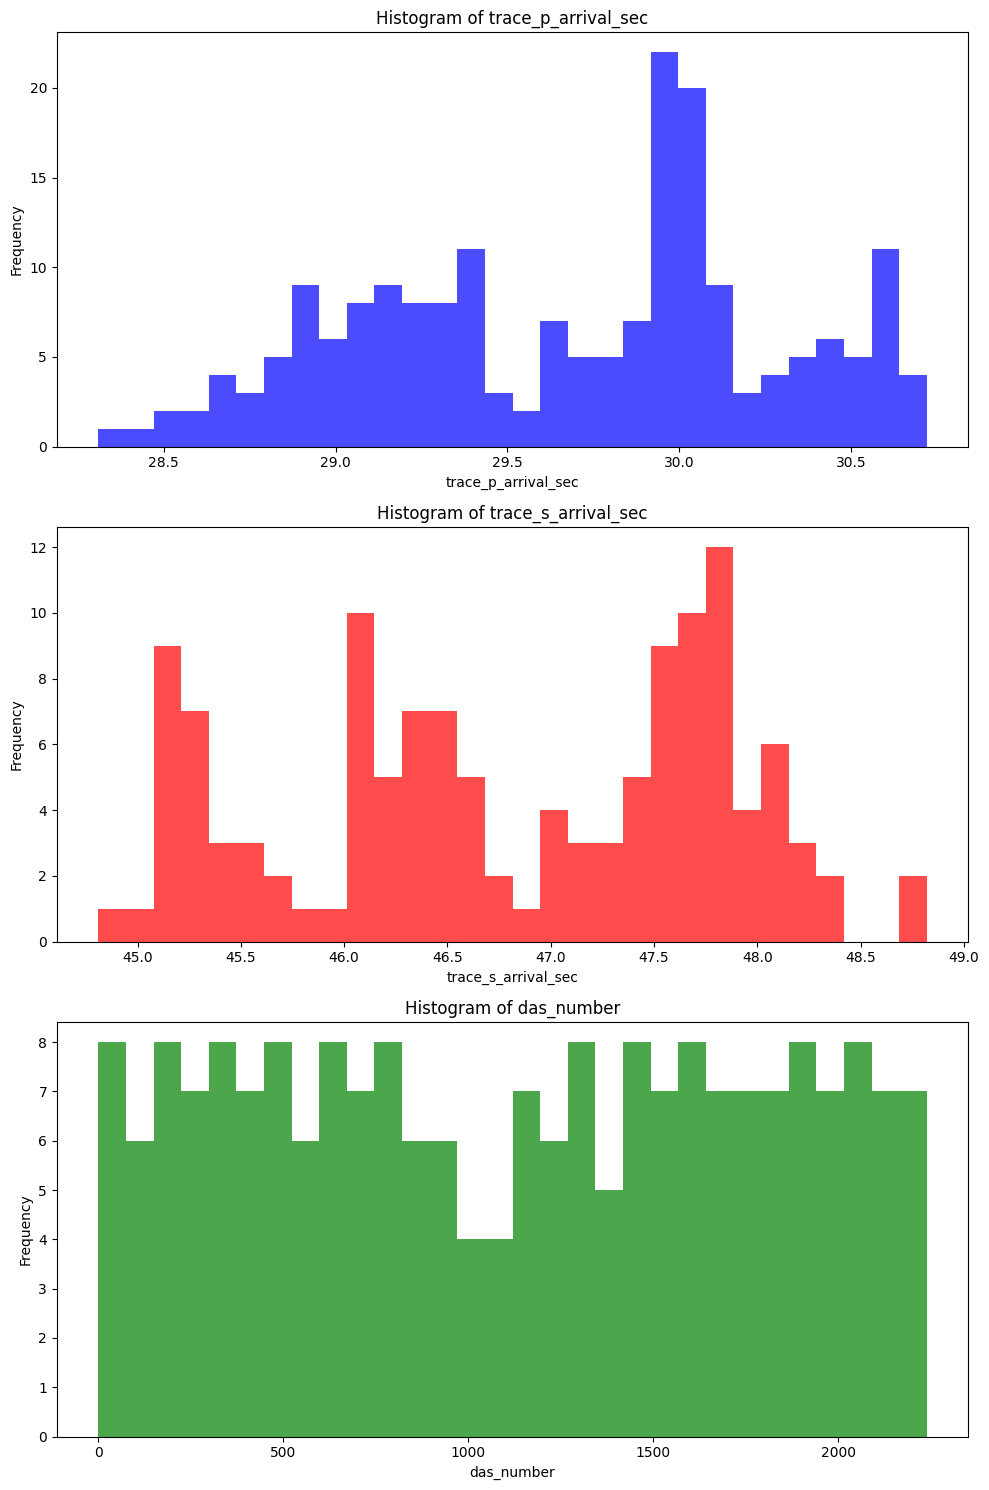

In [687]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(dropped_dataset['trace_p_arrival_sec'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(dropped_dataset['trace_s_arrival_sec'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')

# Histogram for das_number
axes[2].hist(pd.to_numeric(dropped_dataset['das_number'], errors='coerce').dropna(), bins=30, color='green', alpha=0.7)
axes[2].set_title('Histogram of das_number')
axes[2].set_xlabel('das_number')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

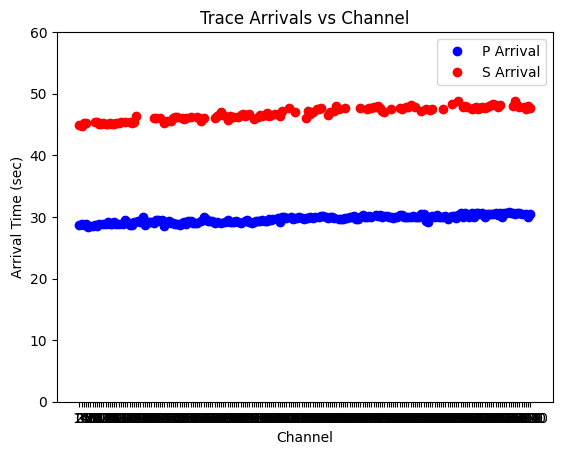

In [688]:
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

In [689]:
p_dataset
#convert das_number column to int
p_dataset['das_number'] = p_dataset['das_number'].astype(float)
s_dataset['das_number'] = s_dataset['das_number'].astype(float)
p_dataset['trace_p_arrival_sec'] = p_dataset['trace_p_arrival_sec'].astype(float)
s_dataset['trace_s_arrival_sec'] = s_dataset['trace_s_arrival_sec'].astype(float)



C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['das_number'] = p_dataset['das_number'].astype(float)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['das_number'] = s_dataset['das_number'].astype(float)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [690]:

#is there nans in p_dataset["trace_[arrival_sec"]"]
p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
print(p_dataset["trace_p_arrival_sec"].isna())


1        False
96       False
191      False
286      False
381      False
         ...  
20711    False
20806    False
20996    False
21186    False
21281    False
Name: trace_p_arrival_sec, Length: 195, dtype: bool


C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\620326073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)


In [691]:
print(p_dataset["das_number"].dtype)
print(p_dataset["trace_p_arrival_sec"].dtype)
print(s_dataset["das_number"].dtype)
print(s_dataset["trace_s_arrival_sec"].dtype)


float64
float64
float64
float64


In [692]:
print(p_dataset["das_number"].values)
print(p_dataset["trace_p_arrival_sec"].values)
print(s_dataset["das_number"].values)
print(s_dataset["trace_s_arrival_sec"].values)


[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  120.  130.
  140.  150.  160.  170.  180.  190.  210.  220.  230.  240.  250.  260.
  280.  290.  300.  310.  320.  330.  340.  350.  360.  370.  380.  390.
  400.  410.  420.  430.  440.  450.  460.  470.  480.  490.  500.  510.
  520.  530.  540.  550.  580.  590.  600.  610.  620.  630.  640.  650.
  670.  690.  700.  710.  720.  730.  740.  750.  760.  780.  790.  800.
  810.  820.  840.  850.  860.  870.  880.  890.  900.  910.  920.  940.
  950. 1000. 1010. 1020. 1050. 1070. 1090. 1100. 1130. 1140. 1150. 1160.
 1170. 1180. 1190. 1200. 1230. 1240. 1250. 1260. 1270. 1280. 1290. 1300.
 1320. 1330. 1340. 1360. 1370. 1380. 1400. 1410. 1420. 1430. 1440. 1450.
 1460. 1470. 1480. 1490. 1510. 1520. 1530. 1540. 1550. 1560. 1570. 1580.
 1590. 1600. 1610. 1620. 1630. 1640. 1650. 1660. 1670. 1680. 1690. 1700.
 1710. 1720. 1730. 1740. 1750. 1760. 1780. 1790. 1800. 1810. 1820. 1830.
 1840. 1850. 1860. 1870. 1880. 1890. 1900. 1910. 19

In [693]:
import numpy as np
import matplotlib.pyplot as plt

# Fit individual polynomials for p_dataset and s_dataset
p_coeffs_individual = np.polyfit(p_dataset['das_number'].values, p_dataset['trace_p_arrival_sec'].values, deg=1)
s_coeffs_individual = np.polyfit(s_dataset['das_number'].values, s_dataset['trace_s_arrival_sec'].values, deg=1)

# # Calculate the trends
p_trend_individual = np.polyval(p_coeffs_individual, pd.to_numeric(p_dataset['das_number']))
s_trend_individual = np.polyval(s_coeffs_individual, pd.to_numeric(s_dataset['das_number']))

# # Detrend by subtracting the individual trends
p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual



C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\25613787.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\25613787.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual


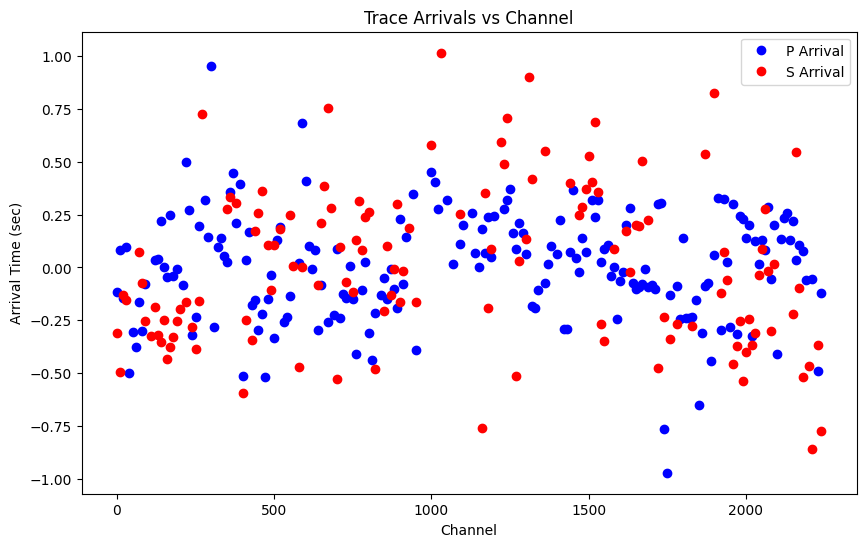

In [694]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_detrended'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_detrended'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.legend()
# Set the number of ticks to 5
plt.gca().xaxis.set_major_locator(MaxNLocator(5))

Text(0, 0.5, 'Frequency')

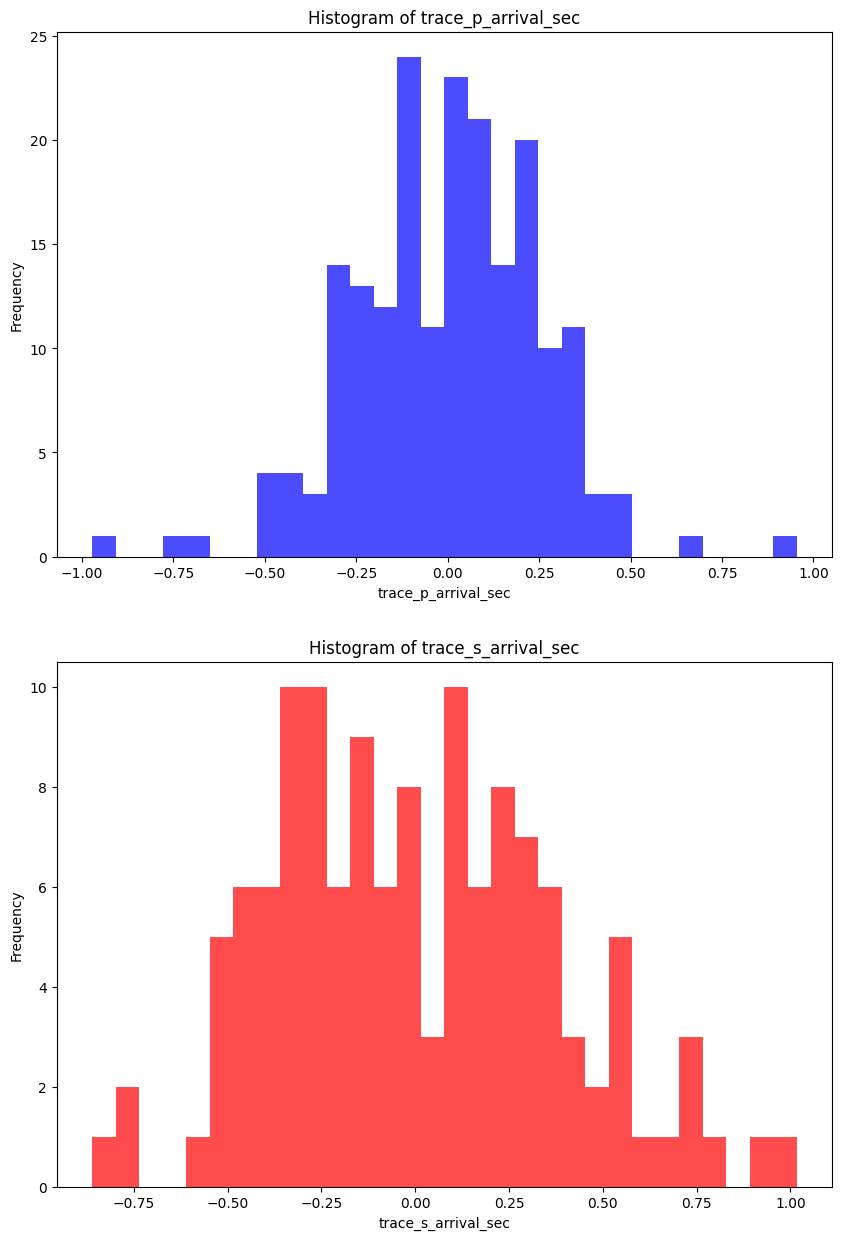

In [695]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(p_dataset['trace_p_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(s_dataset['trace_s_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')


In [696]:
#calculate 2 standard deviations from the mean for the trace_p_arrival_sec and trace_s_arrival_sec columns
p_dataset_mean = p_dataset['trace_p_arrival_sec_detrended'].mean()
p_dataset_std = p_dataset['trace_p_arrival_sec_detrended'].std()
p_dataset_2std = 2 * p_dataset_std

print(p_dataset_mean)
print(p_dataset_std)
print(p_dataset_2std)



2.022313940240285e-15
0.25571951595899595
0.5114390319179919


In [697]:
# do it for s_dataset
s_dataset_mean = s_dataset['trace_s_arrival_sec_detrended'].mean()
s_dataset_std = s_dataset['trace_s_arrival_sec_detrended'].std()
s_dataset_2std = 2 * s_dataset_std

print(s_dataset_mean)
print(s_dataset_std)
print(s_dataset_2std)

1.0380585280245214e-14
0.3729898592187784
0.7459797184375568


In [698]:
#save values for index which are greater than 2 standard deviations from the mean for the trace_p_arrival_sec column
p_dataset_outliers = p_dataset[(p_dataset['trace_p_arrival_sec_detrended'].values > p_dataset_2std) | 
                               (p_dataset['trace_p_arrival_sec_detrended'].values < -p_dataset_2std)]

p_dataset_outliers

#replace p_dataset trace_p_arrival_sec and trace_p_arrival_sec_detrended with Nans for the das_number values that occur in p_dataset_outliers
p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec'] = np.nan
p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec_detrended'] = np.nan


#find the columns that are Nans
p_dataset[p_dataset['trace_p_arrival_sec'].isna()]

trace_p_arrival_sec  das_number  trace_p_arrival_sec_detrended
2851                   NaN       300.0                            NaN
3801                   NaN       400.0                            NaN
4466                   NaN       470.0                            NaN
5606                   NaN       590.0                            NaN
16531                  NaN      1740.0                            NaN
16626                  NaN      1750.0                            NaN
17576                  NaN      1850.0                            NaN

In [699]:
# Save values for index which are greater than 2 standard deviations from the mean for the trace_s_arrival_sec column
s_dataset_outliers = s_dataset[(s_dataset['trace_s_arrival_sec_detrended'].values > s_dataset_2std) | 
                               (s_dataset['trace_s_arrival_sec_detrended'].values < -s_dataset_2std)]

s_dataset_outliers

# Replace s_dataset trace_s_arrival_sec and trace_s_arrival_sec_detrended with NaNs for the das_number values that occur in s_dataset_outliers
s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec'] = np.nan
s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec_detrended'] = np.nan

# Find the columns that are NaNs
s_dataset[s_dataset['trace_s_arrival_sec'].isna()]


trace_s_arrival_sec  das_number  trace_s_arrival_sec_detrended
6366                   NaN       670.0                            NaN
9786                   NaN      1030.0                            NaN
11021                  NaN      1160.0                            NaN
12446                  NaN      1310.0                            NaN
18051                  NaN      1900.0                            NaN
20996                  NaN      2210.0                            NaN
21281                  NaN      2240.0                            NaN

Text(0, 0.5, 'Frequency')

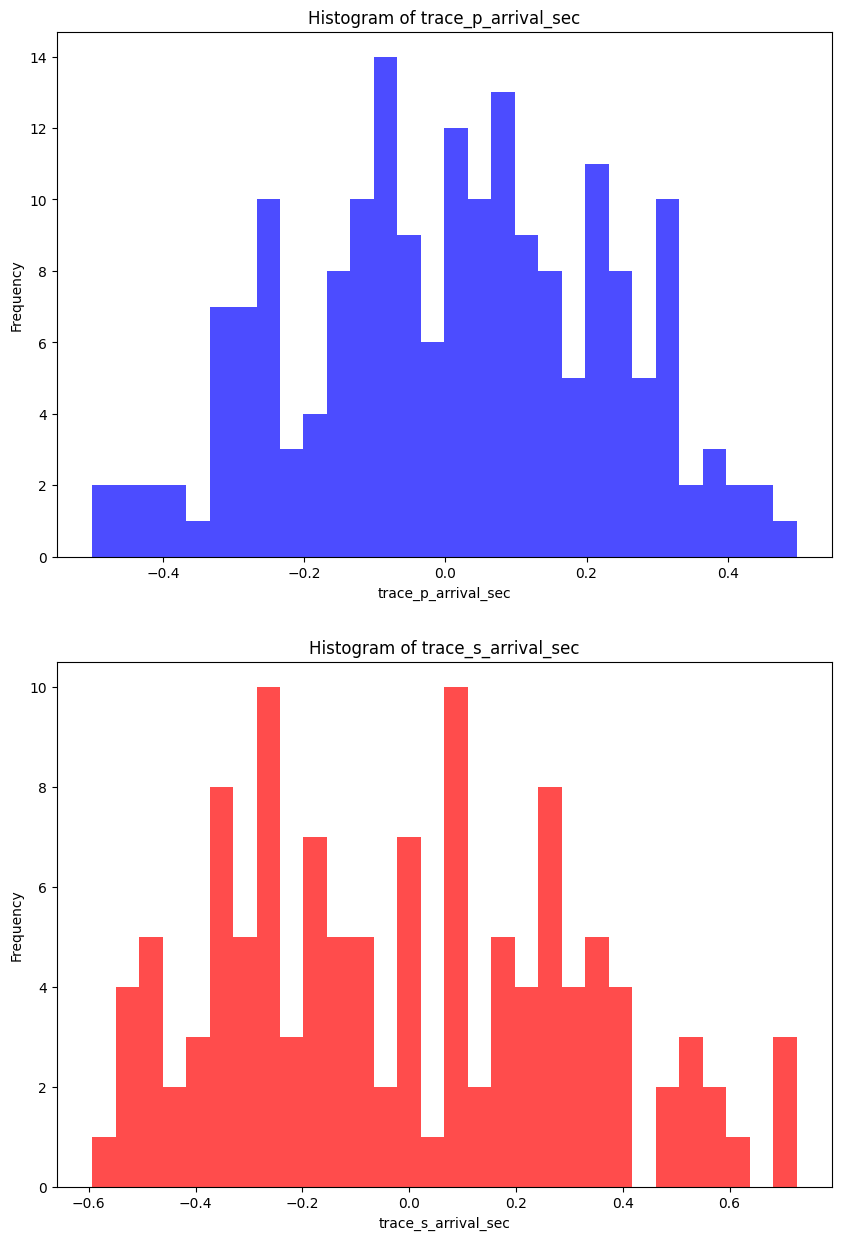

In [700]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(p_dataset['trace_p_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(s_dataset['trace_s_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')

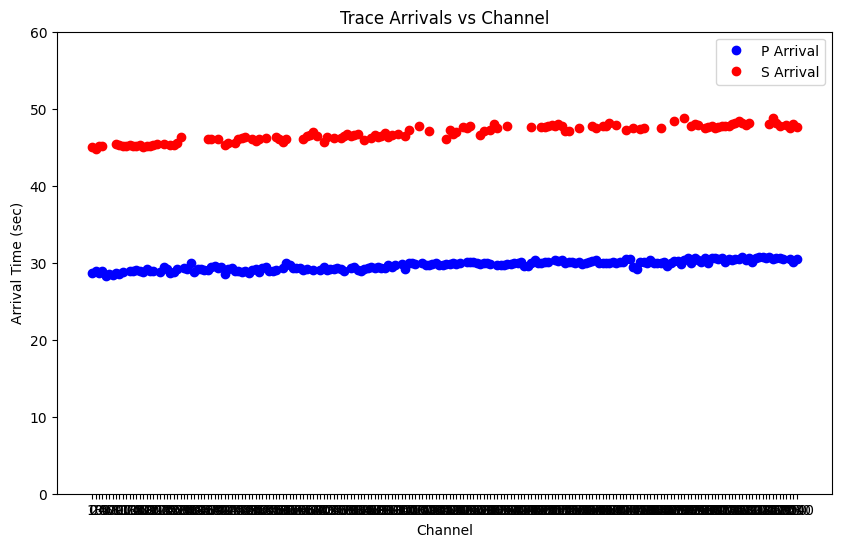

In [701]:
#original
plt.figure(figsize=(10, 6))


plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

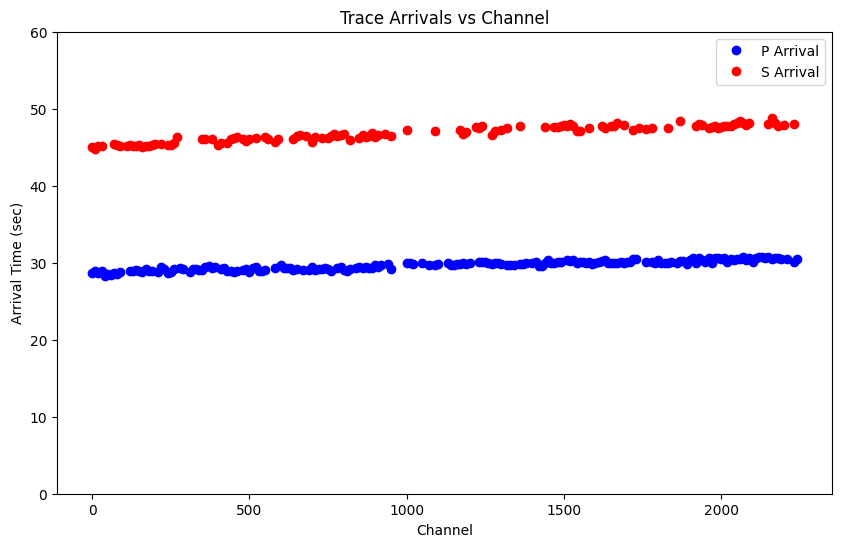

In [702]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

In [703]:
#interpolate the missing values from the p_outliers and s_outliers dataframes using the interpolate function
p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()

s_dataset


C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\3394753993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\3394753993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()


trace_s_arrival_sec  das_number  trace_s_arrival_sec_detrended  \
1                44.980000         0.0                      -0.311748   
96               44.810001        10.0                      -0.495546   
191              45.189999        20.0                      -0.129347   
286              45.180000        30.0                      -0.153145   
666              45.459999        70.0                       0.071656   
...                    ...         ...                            ...   
20711            47.779999      2180.0                      -0.519982   
20901            47.860001      2200.0                      -0.467579   
20996                  NaN      2210.0                            NaN   
21186            48.000000      2230.0                      -0.368977   
21281                  NaN      2240.0                            NaN   

       trace_s_arrival_sec_interpolated  
1                             44.980000  
96                            44.810001  
191                           45.189999  
286                           45.180000  
666                           45.459999  
...                                 ...  
20711                         47.779999  
20901                         47.860001  
20996                         47.930000  
21186                         48.000000  
21281                         48.000000  

[128 rows x 4 columns]

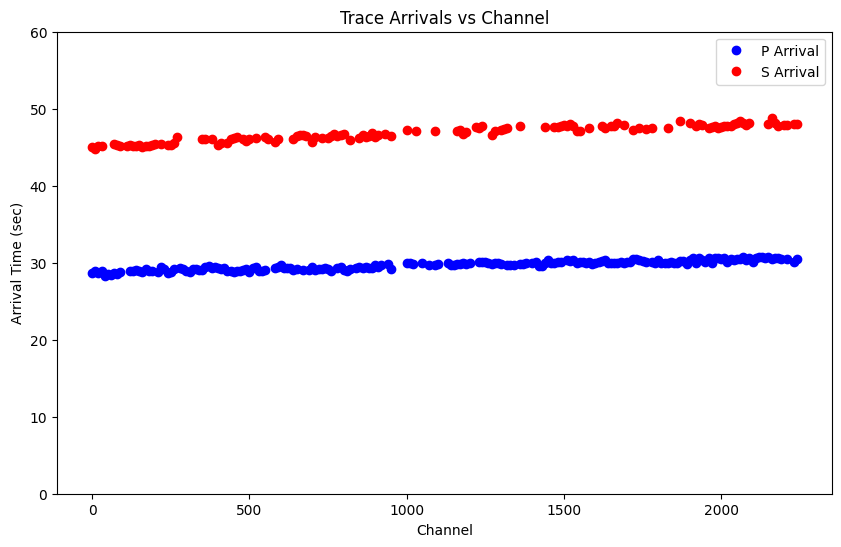

In [704]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

#### Interpolation 2

In [705]:
#find min and max das_number for p_dataset and s_dataset
p_dataset_min = p_dataset['das_number'].min()
p_dataset_max = p_dataset['das_number'].max()
s_dataset_min = s_dataset['das_number'].min()
s_dataset_max = s_dataset['das_number'].max()

print(f"p_dataset das_number min: {p_dataset_min}, max: {p_dataset_max}")
print(f"s_dataset das_number min: {s_dataset_min}, max: {s_dataset_max}")

p_dataset das_number min: 0.0, max: 2240.0
s_dataset das_number min: 0.0, max: 2240.0


In [706]:
from numpy import arange

new_array = arange(0, 2240, 1)
new_array


array([   0,    1,    2, ..., 2237, 2238, 2239])

In [707]:
# Create a DataFrame with all possible das_number values from new_array
full_range_df = pd.DataFrame({'das_number': new_array})

# Merge with p_dataset and s_dataset to include missing values
p_dataset = full_range_df.merge(p_dataset, on='das_number', how='left')
s_dataset = full_range_df.merge(s_dataset, on='das_number', how='left')

#interpolate again to fill the missing values based on trace_p_arrivaL_sec_interpolated
p_dataset['trace_p_arrival_sec_interpolated2'] = p_dataset['trace_p_arrival_sec_interpolated'].interpolate()
p_dataset

#interpolate again to fill the missing values based on trace_s_arrivaL_sec_interpolated
s_dataset['trace_s_arrival_sec_interpolated2'] = s_dataset['trace_s_arrival_sec_interpolated'].interpolate()
#s_dataset


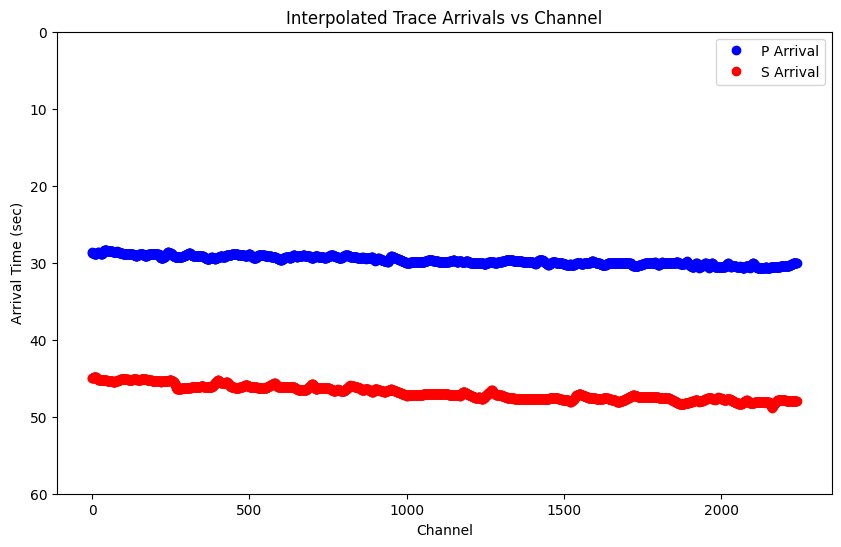

In [708]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated2'], 'o', color='blue', label='P Arrival')
ax.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated2'], 'o', color='red', label='S Arrival')

ax.set_title('Interpolated Trace Arrivals vs Channel')
ax.set_xlabel('Channel')
ax.set_ylabel('Arrival Time (sec)')
ax.set_ylim(0, 60)
ax.legend()
# Invert y-axis if needed
ax.invert_yaxis()


#### File Creation

In [709]:
#create a 2D numpy array of zeros with dimensions (1500, 8530)
# Create a 2D numpy array of zeros with dimensions (1500, 8530)
#p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25
zeros = np.zeros((1500, 8530))

#convert the trace_p_arrival_sec_interpolated2 column to a numpy array and multiply by 25
p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25

#drop Nan values
p_dataset.dropna(subset=['Sample#', 'das_number'], inplace=True)

#match the sample# column and das_number columns to the zeros array with it (sample#, das_number) and assign 1 values to those points
for index, row in p_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        zeros[sample_number, das_number] = 1

#add 1 values each sample for 250 samples after the sample number for the s-wave 
for index, row in p_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        for i in range(1, 25 * p_arrival_mask + 1):
            if sample_number + i < 1500:
                zeros[sample_number + i, das_number] = 1

#save zeroes
np.save('F:/DAS/'+str(p_arrival_mask)+'/p/p-wave_2023-12-30_22.35.57_UTC_'+str(p_arrival_mask)+'sec_filled.npy', zeros)

#save zeros as a csv file
#np.savetxt('F:/DAS/p-wave_2023-12-30_22.35.57_UTC.np', zeros, delimiter=',')


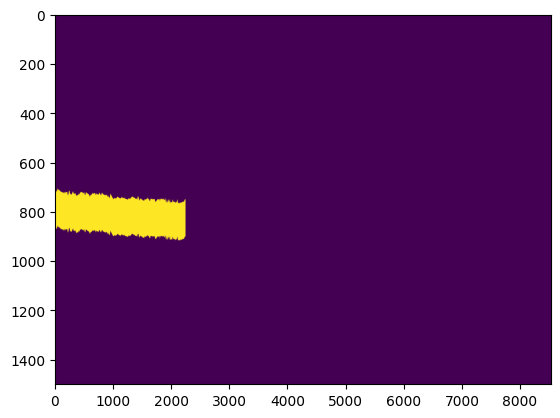

In [710]:
plt.imshow(zeros, aspect='auto')

In [711]:
#create a 2D numpy array of zeros with dimensions (1500, 8530)
# Create a 2D numpy array of zeros with dimensions (1500, 8530)
#p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25
zeros = np.zeros((1500, 8530))

#convert the trace_p_arrival_sec_interpolated2 column to a numpy array and multiply by 25
s_dataset["Sample#"] = s_dataset['trace_s_arrival_sec_interpolated2']*25

#drop Nan values
s_dataset.dropna(subset=['Sample#', 'das_number'], inplace=True)

#match the sample# column and das_number columns to the zeros array with it (sample#, das_number) and assign 1 values to those points
for index, row in s_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        zeros[sample_number, das_number] = 1

#add 1 values each sample for 250 samples after the sample number for the s-wave 

for index, row in s_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        for i in range(1, 25 * s_arrival_mask + 1):
            if sample_number + i < 1500:
                zeros[sample_number + i, das_number] = 1

#save zeroes
np.save('F:/DAS/'+str(s_arrival_mask)+'/s/s-wave_2023-12-30_22.35.57_UTC_'+str(s_arrival_mask)+'sec_filled.npy', zeros)

#save zeros as a csv file
#np.savetxt('F:/DAS/p-wave_2023-12-30_22.35.57_UTC.np', zeros, delimiter=',')


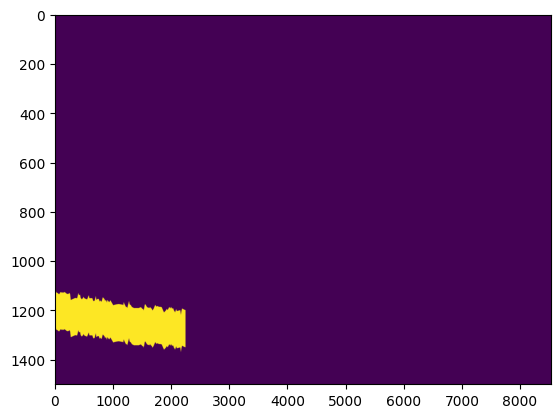

In [712]:
plt.imshow(zeros, aspect='auto')

In [713]:
# #turn previous section into a for loop to iterate through all the unique trace_start_times

# for i in unique_trace_start_times_dropped:
#     if i.strip() == '':
#         print(f"Skipping invalid trace_start_time: '{i}'")
#         continue
    
#     # Define directory and filename
#     # Convert i into a string with format YYYYMMDD_HHMMSS
#     name = str(i).replace(" ", "_").replace(":", "_").replace("-", "_").replace(".", "_")
    
#     directory = "F:/DAS/pick_plots_interpolated_20250401"
#     filename = str(name) + ".png"

#     # Combine directory and filename
#     filepath = os.path.join(directory, filename)

#     # Select the specific row based on the index
#     data = grouped_df_dropped.loc[i]

#     # Select specific columns from the row
#     dropped_dataset = data[['trace_p_arrival_sec', 'trace_s_arrival_sec', 'das_number']]
#     p_dataset = dropped_dataset[['trace_p_arrival_sec','das_number']]
#     s_dataset = dropped_dataset[['trace_s_arrival_sec','das_number']]

#     #drop Nans
#     p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
#     s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)
    
#     #convert das_number column to int
#     p_dataset['das_number'] = p_dataset['das_number'].astype(float)
#     s_dataset['das_number'] = s_dataset['das_number'].astype(float)
#     p_dataset['trace_p_arrival_sec'] = p_dataset['trace_p_arrival_sec'].astype(float)
#     s_dataset['trace_s_arrival_sec'] = s_dataset['trace_s_arrival_sec'].astype(float)

#     # Fit individual polynomials for p_dataset and s_dataset
#     p_coeffs_individual = np.polyfit(p_dataset['das_number'].values, p_dataset['trace_p_arrival_sec'].values, deg=1)
#     s_coeffs_individual = np.polyfit(s_dataset['das_number'].values, s_dataset['trace_s_arrival_sec'].values, deg=1)

#     # # Calculate the trends
#     p_trend_individual = np.polyval(p_coeffs_individual, pd.to_numeric(p_dataset['das_number']))
#     s_trend_individual = np.polyval(s_coeffs_individual, pd.to_numeric(s_dataset['das_number']))

#     #Detrend by subtracting the individual trends
#     p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
#     s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual

#     #calculate 2 standard deviations from the mean for the trace_p_arrival_sec and trace_s_arrival_sec columns
#     p_dataset_mean = p_dataset['trace_p_arrival_sec_detrended'].mean()
#     p_dataset_std = p_dataset['trace_p_arrival_sec_detrended'].std()
#     p_dataset_2std = 2 * p_dataset_std

#     # do it for s_dataset
#     s_dataset_mean = s_dataset['trace_s_arrival_sec_detrended'].mean()
#     s_dataset_std = s_dataset['trace_s_arrival_sec_detrended'].std()
#     s_dataset_2std = 2 * s_dataset_std
    
#     #save values for index which are greater than 2 standard deviations from the mean for the trace_p_arrival_sec column
#     p_dataset_outliers = p_dataset[(p_dataset['trace_p_arrival_sec_detrended'].values > p_dataset_2std) | 
#                                    (p_dataset['trace_p_arrival_sec_detrended'].values < -p_dataset_2std)]

#     #replace p_dataset trace_p_arrival_sec and trace_p_arrival_sec_detrended with Nans for the das_number values that occur in p_dataset_outliers
#     p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec'] = np.nan
#     p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec_detrended'] = np.nan

#     # Save values for index which are greater than 2 standard deviations from the mean for the trace_s_arrival_sec column
#     s_dataset_outliers = s_dataset[(s_dataset['trace_s_arrival_sec_detrended'].values > s_dataset_2std) | 
#                                    (s_dataset['trace_s_arrival_sec_detrended'].values < -s_dataset_2std)]

#     # Replace s_dataset trace_s_arrival_sec and trace_s_arrival_sec_detrended with NaNs for the das_number values that occur in s_dataset_outliers
#     s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec'] = np.nan
#     s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec_detrended'] = np.nan

#     #interpolate the missing values from the p_outliers and s_outliers dataframes using the interpolate function
#     p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
#     s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()

#     new_array = arange(1, 10000, 1)

#     # Create a DataFrame with all possible das_number values from new_array
#     full_range_df = pd.DataFrame({'das_number': new_array})

#     # Merge with p_dataset and s_dataset to include missing values
#     p_dataset = full_range_df.merge(p_dataset, on='das_number', how='left')
#     s_dataset = full_range_df.merge(s_dataset, on='das_number', how='left')

#     #interpolate again to fill the missing values based on trace_p_arrivaL_sec_interpolated
#     p_dataset['trace_p_arrival_sec_interpolated2'] = p_dataset['trace_p_arrival_sec_interpolated'].interpolate()

#     #interpolate again to fill the missing values based on trace_s_arrivaL_sec_interpolated
#     s_dataset['trace_s_arrival_sec_interpolated2'] = s_dataset['trace_s_arrival_sec_interpolated'].interpolate()

#     # Plot the interpolated values
#     plt.figure(figsize=(10, 6))
  
#     plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated2'], 'o', color='blue', label='P Arrival')
#     plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated2'], 'o', color='red', label='S Arrival')

#     plt.title(f'Interpolated Trace Arrivals vs Channel for {i}')
#     plt.xlabel('Channel')
#     plt.ylabel('Arrival Time (sec)')
#     plt.ylim(0, 60)
#     plt.legend()

#     # Set the number of ticks to 5
#     plt.gca().xaxis.set_major_locator(MaxNLocator(5))
#     plt.savefig(filepath)
#     plt.close()

### 2023-12-03T07:29:56.880000Z

#### Background

In [714]:
# Select the specific row based on the index
data_2023_12_30 = grouped_df_dropped.loc['2023-12-03T07:29:56.880000Z']

# Select specific columns from the row
dropped_dataset = data_2023_12_30[['trace_p_arrival_sec', 'trace_s_arrival_sec', 'das_number']]
p_dataset = dropped_dataset[['trace_p_arrival_sec','das_number']]
s_dataset = dropped_dataset[['trace_s_arrival_sec','das_number']]


In [715]:
p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)

C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\751016926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\751016926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)


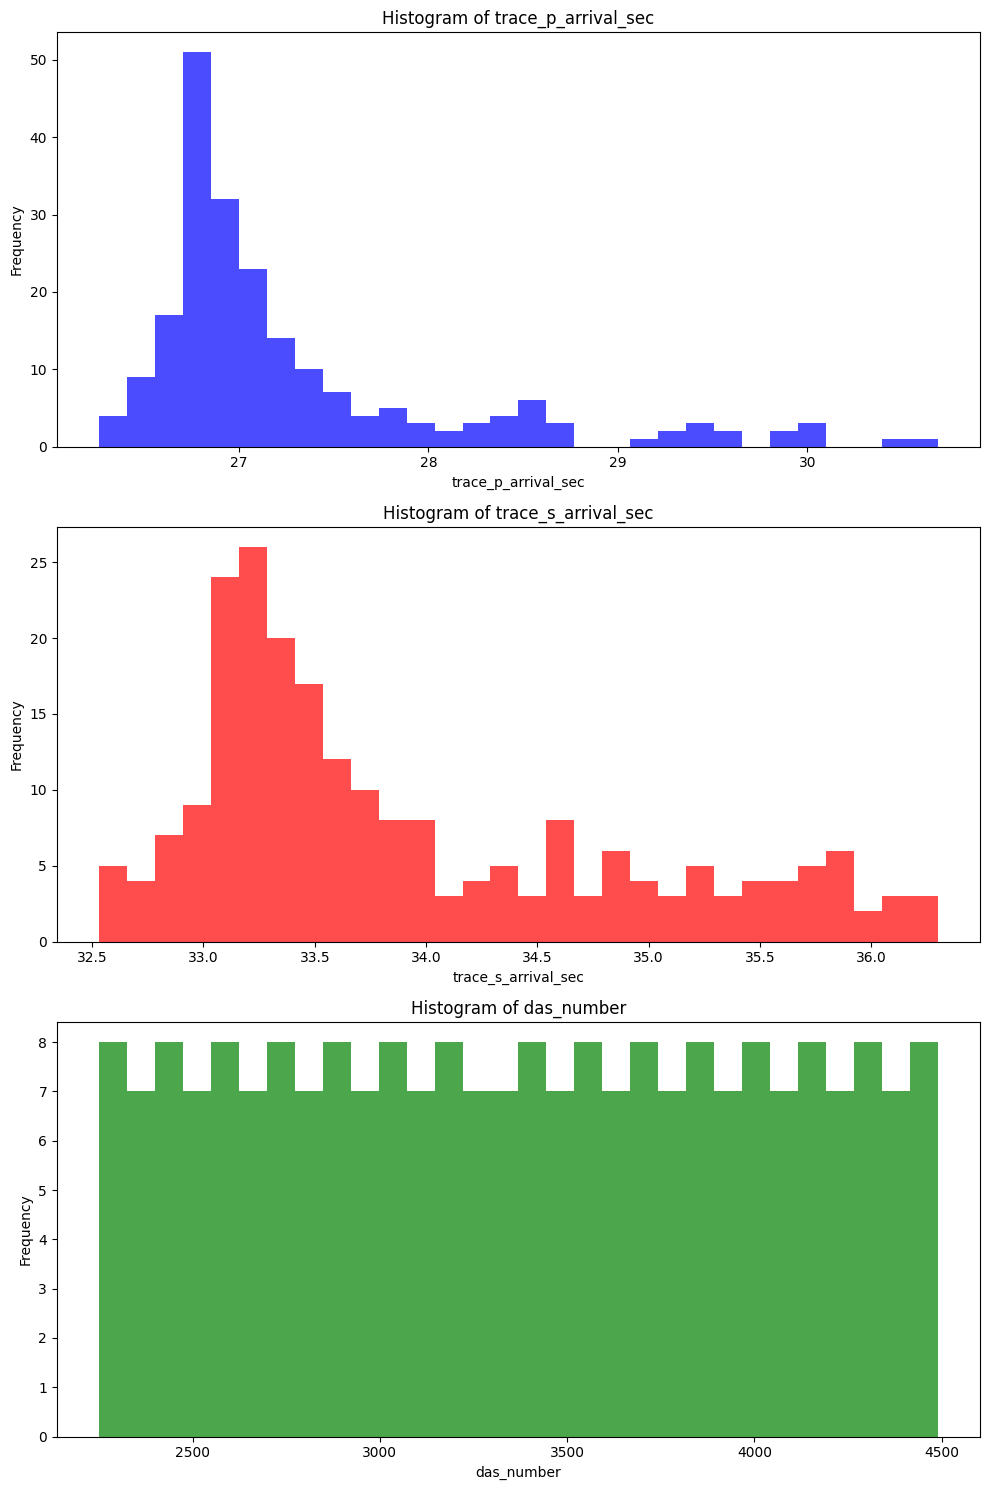

In [716]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(dropped_dataset['trace_p_arrival_sec'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(dropped_dataset['trace_s_arrival_sec'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')

# Histogram for das_number
axes[2].hist(pd.to_numeric(dropped_dataset['das_number'], errors='coerce').dropna(), bins=30, color='green', alpha=0.7)
axes[2].set_title('Histogram of das_number')
axes[2].set_xlabel('das_number')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

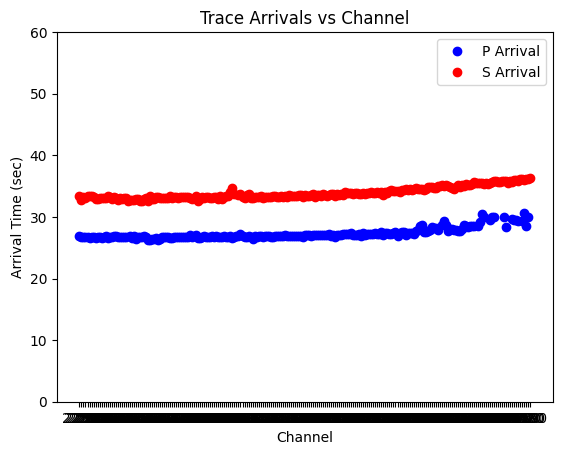

In [717]:
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

In [718]:
p_dataset
#convert das_number column to int
p_dataset['das_number'] = p_dataset['das_number'].astype(float)
s_dataset['das_number'] = s_dataset['das_number'].astype(float)
p_dataset['trace_p_arrival_sec'] = p_dataset['trace_p_arrival_sec'].astype(float)
s_dataset['trace_s_arrival_sec'] = s_dataset['trace_s_arrival_sec'].astype(float)



C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['das_number'] = p_dataset['das_number'].astype(float)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['das_number'] = s_dataset['das_number'].astype(float)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [719]:

#is there nans in p_dataset["trace_[arrival_sec"]"]
p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
print(p_dataset["trace_p_arrival_sec"].isna())


21461    False
21556    False
21651    False
21746    False
21841    False
         ...  
42171    False
42361    False
42456    False
42551    False
42646    False
Name: trace_p_arrival_sec, Length: 212, dtype: bool


C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\620326073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)


In [720]:
print(p_dataset["das_number"].dtype)
print(p_dataset["trace_p_arrival_sec"].dtype)
print(s_dataset["das_number"].dtype)
print(s_dataset["trace_s_arrival_sec"].dtype)


float64
float64
float64
float64


In [721]:
print(p_dataset["das_number"].values)
print(p_dataset["trace_p_arrival_sec"].values)
print(s_dataset["das_number"].values)
print(s_dataset["trace_s_arrival_sec"].values)


[2250. 2260. 2270. 2280. 2290. 2300. 2310. 2320. 2330. 2340. 2350. 2360.
 2370. 2380. 2390. 2400. 2410. 2420. 2430. 2440. 2450. 2460. 2470. 2480.
 2500. 2510. 2520. 2530. 2540. 2550. 2560. 2570. 2580. 2590. 2600. 2610.
 2620. 2630. 2640. 2650. 2660. 2670. 2680. 2690. 2700. 2710. 2720. 2730.
 2740. 2750. 2760. 2770. 2780. 2790. 2800. 2810. 2820. 2830. 2840. 2850.
 2860. 2870. 2880. 2890. 2900. 2910. 2920. 2930. 2940. 2950. 2960. 2970.
 2980. 2990. 3000. 3010. 3020. 3030. 3040. 3050. 3060. 3070. 3080. 3090.
 3100. 3110. 3120. 3130. 3140. 3150. 3160. 3170. 3180. 3190. 3200. 3210.
 3220. 3230. 3240. 3250. 3260. 3270. 3280. 3290. 3300. 3310. 3320. 3330.
 3340. 3350. 3360. 3370. 3380. 3390. 3400. 3410. 3420. 3430. 3440. 3450.
 3460. 3470. 3480. 3490. 3500. 3510. 3520. 3530. 3540. 3550. 3560. 3570.
 3580. 3590. 3600. 3610. 3620. 3630. 3640. 3650. 3660. 3670. 3680. 3690.
 3700. 3710. 3720. 3730. 3740. 3750. 3760. 3770. 3780. 3790. 3800. 3810.
 3820. 3830. 3840. 3850. 3860. 3870. 3880. 3890. 39

In [722]:
import numpy as np
import matplotlib.pyplot as plt

# Fit individual polynomials for p_dataset and s_dataset
p_coeffs_individual = np.polyfit(p_dataset['das_number'].values, p_dataset['trace_p_arrival_sec'].values, deg=1)
s_coeffs_individual = np.polyfit(s_dataset['das_number'].values, s_dataset['trace_s_arrival_sec'].values, deg=1)

# # Calculate the trends
p_trend_individual = np.polyval(p_coeffs_individual, pd.to_numeric(p_dataset['das_number']))
s_trend_individual = np.polyval(s_coeffs_individual, pd.to_numeric(s_dataset['das_number']))

# # Detrend by subtracting the individual trends
p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual



C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\25613787.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\25613787.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual


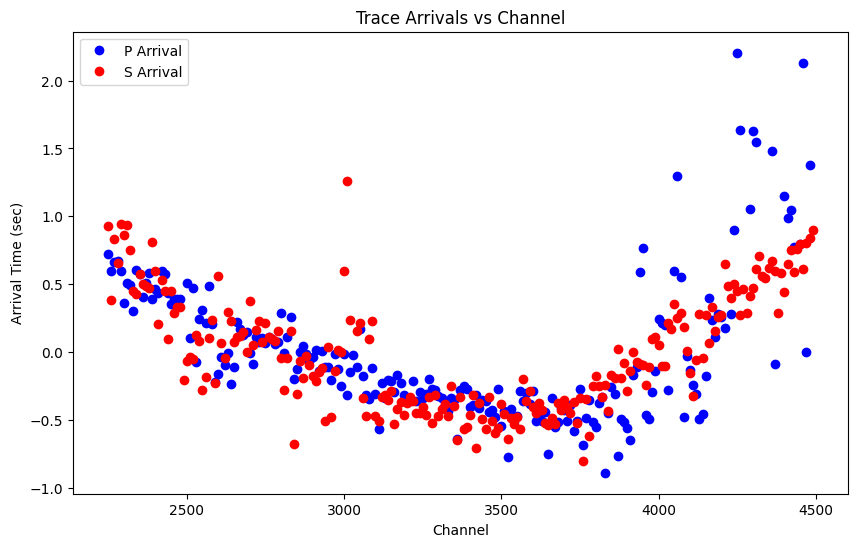

In [723]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_detrended'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_detrended'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.legend()
# Set the number of ticks to 5
plt.gca().xaxis.set_major_locator(MaxNLocator(5))

Text(0, 0.5, 'Frequency')

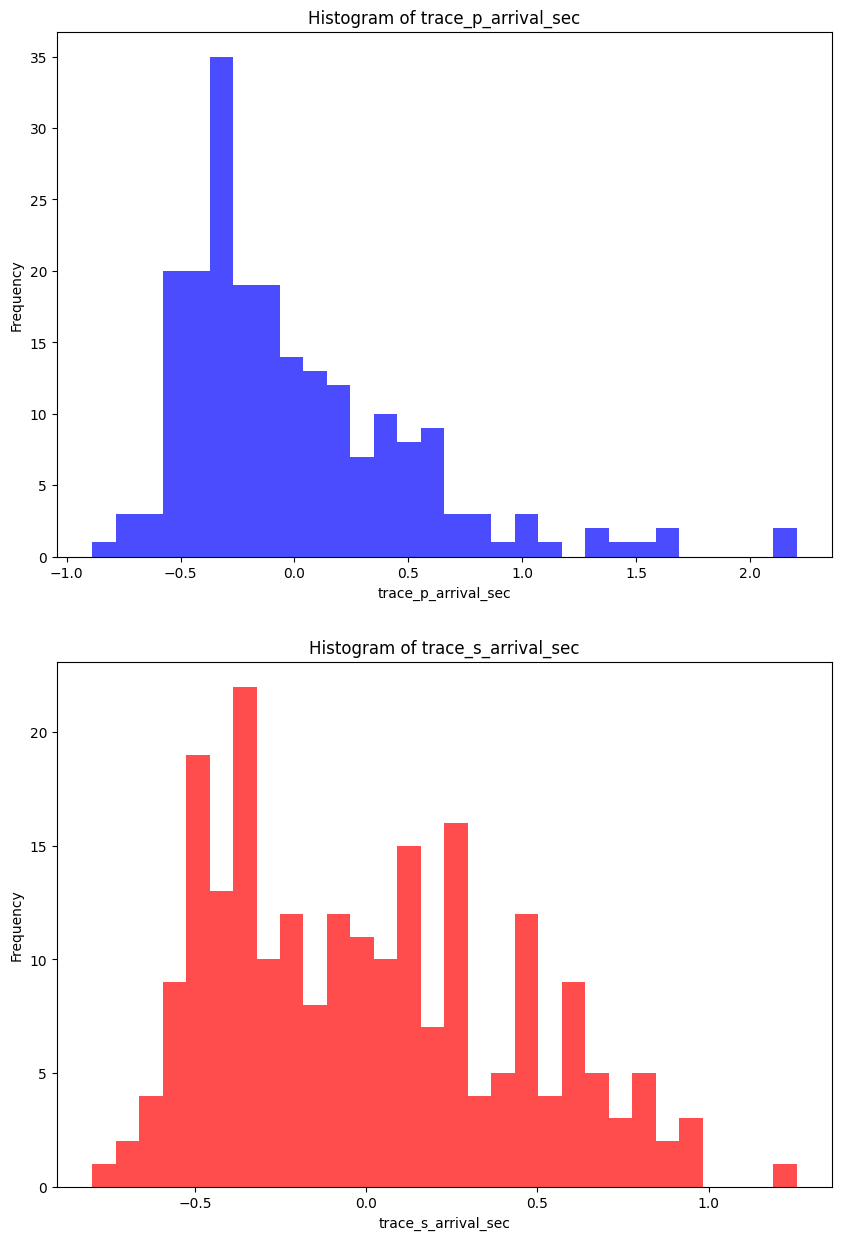

In [724]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(p_dataset['trace_p_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(s_dataset['trace_s_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')


In [725]:
#calculate 2 standard deviations from the mean for the trace_p_arrival_sec and trace_s_arrival_sec columns
p_dataset_mean = p_dataset['trace_p_arrival_sec_detrended'].mean()
p_dataset_std = p_dataset['trace_p_arrival_sec_detrended'].std()
p_dataset_2std = 2 * p_dataset_std

print(p_dataset_mean)
print(p_dataset_std)
print(p_dataset_2std)



8.060638110863401e-15
0.5197068802952175
1.039413760590435


In [726]:
# do it for s_dataset
s_dataset_mean = s_dataset['trace_s_arrival_sec_detrended'].mean()
s_dataset_std = s_dataset['trace_s_arrival_sec_detrended'].std()
s_dataset_2std = 2 * s_dataset_std

print(s_dataset_mean)
print(s_dataset_std)
print(s_dataset_2std)

5.83660104374368e-15
0.42454969387097663
0.8490993877419533


In [727]:
#save values for index which are greater than 2 standard deviations from the mean for the trace_p_arrival_sec column
p_dataset_outliers = p_dataset[(p_dataset['trace_p_arrival_sec_detrended'].values > p_dataset_2std) | 
                               (p_dataset['trace_p_arrival_sec_detrended'].values < -p_dataset_2std)]

p_dataset_outliers

#replace p_dataset trace_p_arrival_sec and trace_p_arrival_sec_detrended with Nans for the das_number values that occur in p_dataset_outliers
p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec'] = np.nan
p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec_detrended'] = np.nan


#find the columns that are Nans
p_dataset[p_dataset['trace_p_arrival_sec'].isna()]

trace_p_arrival_sec  das_number  trace_p_arrival_sec_detrended
38656                  NaN      4060.0                            NaN
40461                  NaN      4250.0                            NaN
40556                  NaN      4260.0                            NaN
40841                  NaN      4290.0                            NaN
40936                  NaN      4300.0                            NaN
41031                  NaN      4310.0                            NaN
41506                  NaN      4360.0                            NaN
41886                  NaN      4400.0                            NaN
42076                  NaN      4420.0                            NaN
42456                  NaN      4460.0                            NaN
42646                  NaN      4480.0                            NaN

In [728]:
# Save values for index which are greater than 2 standard deviations from the mean for the trace_s_arrival_sec column
s_dataset_outliers = s_dataset[(s_dataset['trace_s_arrival_sec_detrended'].values > s_dataset_2std) | 
                               (s_dataset['trace_s_arrival_sec_detrended'].values < -s_dataset_2std)]

s_dataset_outliers

# Replace s_dataset trace_s_arrival_sec and trace_s_arrival_sec_detrended with NaNs for the das_number values that occur in s_dataset_outliers
s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec'] = np.nan
s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec_detrended'] = np.nan

# Find the columns that are NaNs
s_dataset[s_dataset['trace_s_arrival_sec'].isna()]


trace_s_arrival_sec  das_number  trace_s_arrival_sec_detrended
21461                  NaN      2250.0                            NaN
21841                  NaN      2290.0                            NaN
21936                  NaN      2300.0                            NaN
22031                  NaN      2310.0                            NaN
28681                  NaN      3010.0                            NaN
42741                  NaN      4490.0                            NaN

Text(0, 0.5, 'Frequency')

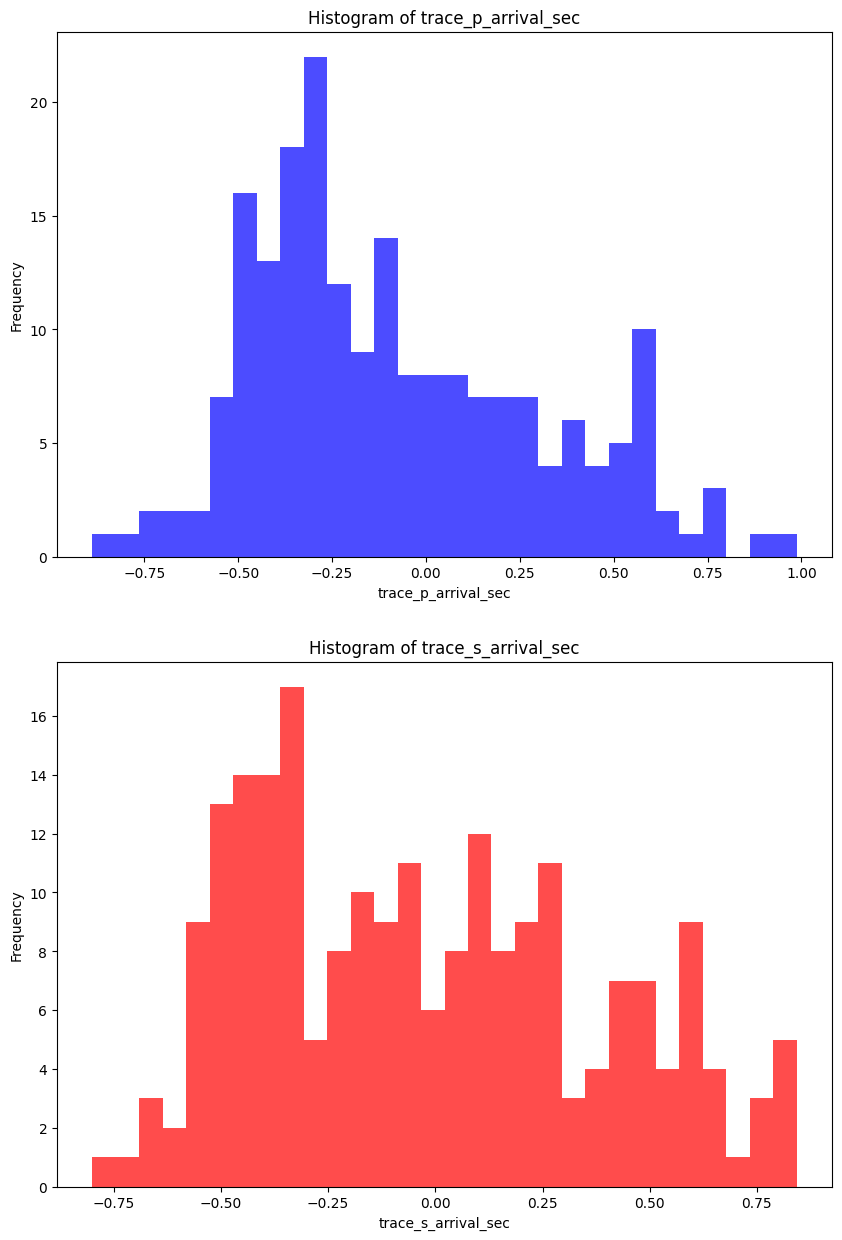

In [729]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(p_dataset['trace_p_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(s_dataset['trace_s_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')

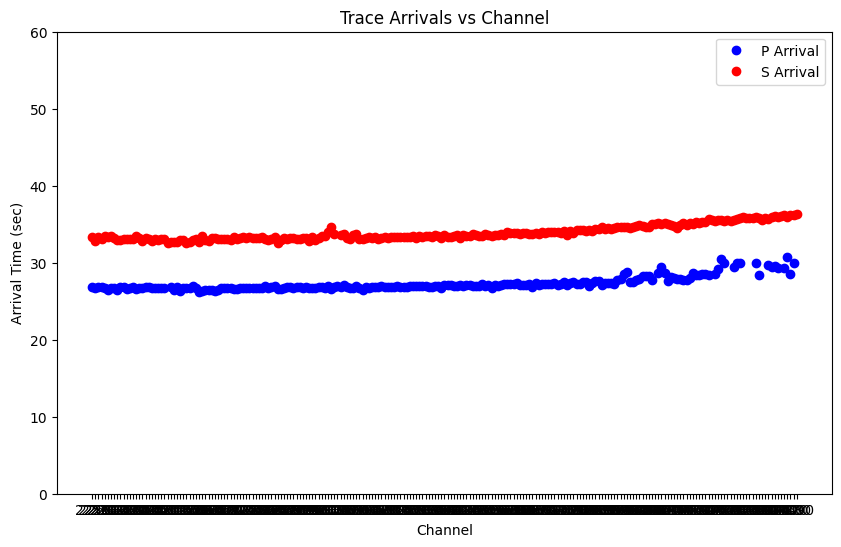

In [730]:
#original
plt.figure(figsize=(10, 6))


plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

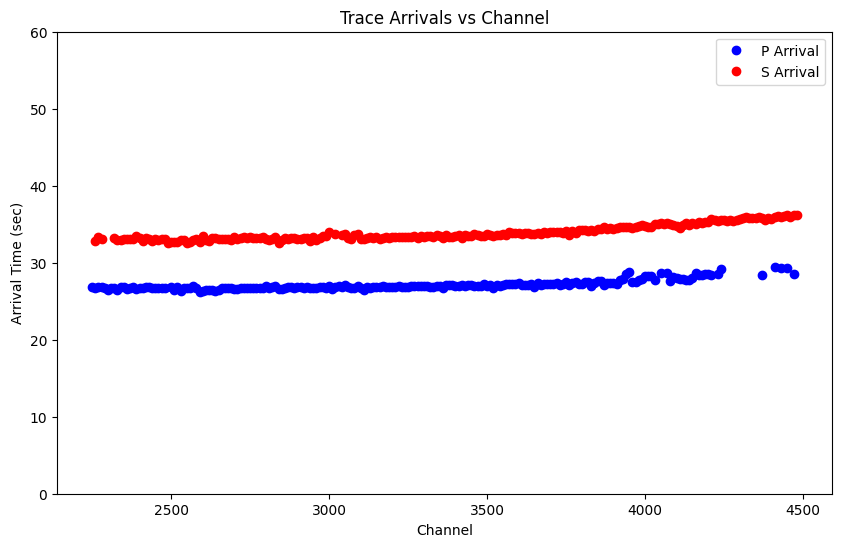

In [731]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

In [732]:
#interpolate the missing values from the p_outliers and s_outliers dataframes using the interpolate function
p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()

s_dataset


C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\3394753993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\3394753993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()


trace_s_arrival_sec  das_number  trace_s_arrival_sec_detrended  \
21461                  NaN      2250.0                            NaN   
21556            32.820000      2260.0                       0.383381   
21651            33.279999      2270.0                       0.830090   
21746            33.119999      2280.0                       0.656800   
21841                  NaN      2290.0                            NaN   
...                    ...         ...                            ...   
42361            36.139999      4450.0                       0.792933   
42456            35.970001      4460.0                       0.609645   
42551            36.180000      4470.0                       0.806354   
42646            36.230000      4480.0                       0.843065   
42741                  NaN      4490.0                            NaN   

       trace_s_arrival_sec_interpolated  
21461                               NaN  
21556                         32.820000  
21651                         33.279999  
21746                         33.119999  
21841                         33.157499  
...                                 ...  
42361                         36.139999  
42456                         35.970001  
42551                         36.180000  
42646                         36.230000  
42741                         36.230000  

[224 rows x 4 columns]

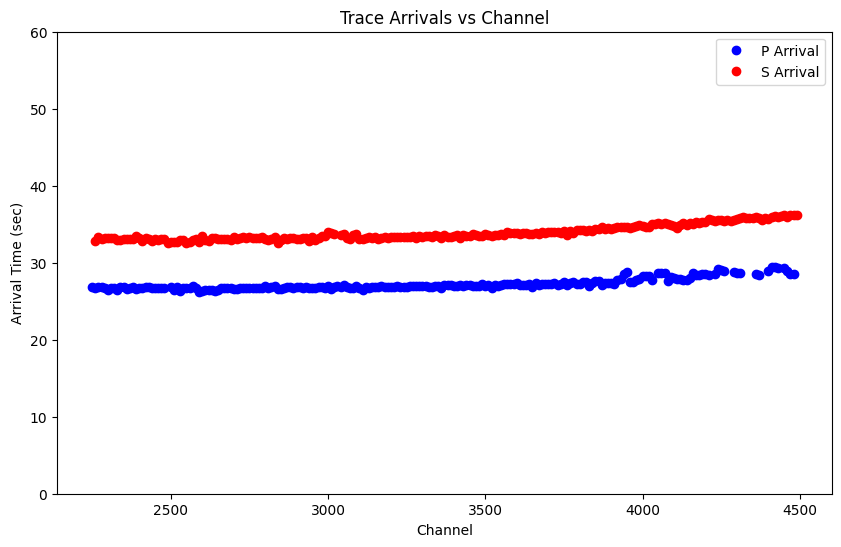

In [733]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

#### Interpolation 2

In [734]:
#find min and max das_number for p_dataset and s_dataset
p_dataset_min = p_dataset['das_number'].min()
p_dataset_max = p_dataset['das_number'].max()
s_dataset_min = s_dataset['das_number'].min()
s_dataset_max = s_dataset['das_number'].max()

print(f"p_dataset das_number min: {p_dataset_min}, max: {p_dataset_max}")
print(f"s_dataset das_number min: {s_dataset_min}, max: {s_dataset_max}")

p_dataset das_number min: 2250.0, max: 4480.0
s_dataset das_number min: 2250.0, max: 4490.0


In [735]:
from numpy import arange

new_array = arange(2250, 4490, 1)
new_array


array([2250, 2251, 2252, ..., 4487, 4488, 4489])

In [736]:
# Create a DataFrame with all possible das_number values from new_array
full_range_df = pd.DataFrame({'das_number': new_array})

# Merge with p_dataset and s_dataset to include missing values
p_dataset = full_range_df.merge(p_dataset, on='das_number', how='left')
s_dataset = full_range_df.merge(s_dataset, on='das_number', how='left')

#interpolate again to fill the missing values based on trace_p_arrivaL_sec_interpolated
p_dataset['trace_p_arrival_sec_interpolated2'] = p_dataset['trace_p_arrival_sec_interpolated'].interpolate()
p_dataset

#interpolate again to fill the missing values based on trace_s_arrivaL_sec_interpolated
s_dataset['trace_s_arrival_sec_interpolated2'] = s_dataset['trace_s_arrival_sec_interpolated'].interpolate()
#s_dataset


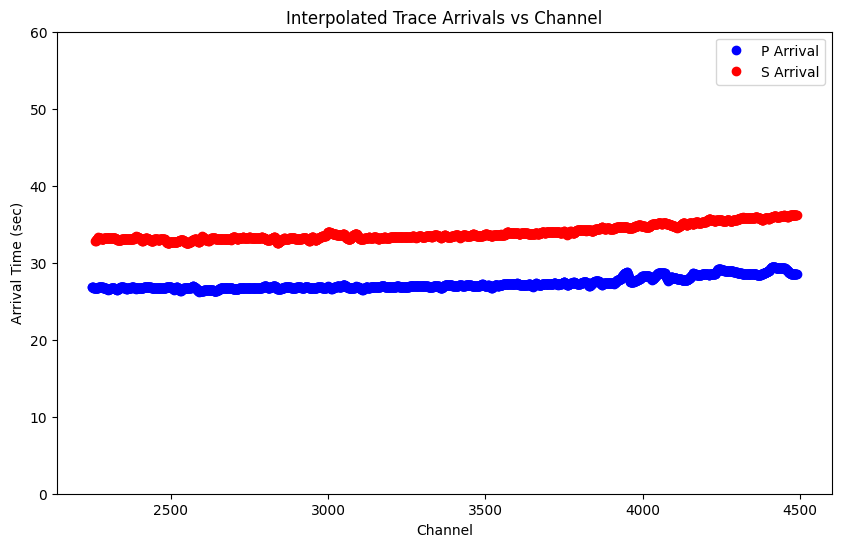

In [737]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated2'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated2'], 'o', color='red', label='S Arrival')

plt.title(f'Interpolated Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

#### File Creation

In [738]:
#create a 2D numpy array of zeros with dimensions (1500, 8530)
# Create a 2D numpy array of zeros with dimensions (1500, 8530)
#p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25
zeros = np.zeros((1500, 8530))

#convert the trace_p_arrival_sec_interpolated2 column to a numpy array and multiply by 25
p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25

#drop Nan values
p_dataset.dropna(subset=['Sample#', 'das_number'], inplace=True)

#match the sample# column and das_number columns to the zeros array with it (sample#, das_number) and assign 1 values to those points
for index, row in p_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        zeros[sample_number, das_number] = 1

#add 1 values each sample for 250 samples after the sample number for the s-wave 
for index, row in p_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        for i in range(1, 25 * p_arrival_mask + 1):
            if sample_number + i < 1500:
                zeros[sample_number + i, das_number] = 1

#save zeroes
np.save('F:/DAS/'+str(p_arrival_mask)+'/p/p-wave_2023-12-03T07.29.56.880000_'+str(p_arrival_mask)+'sec_filled.npy', zeros)

#save zeros as a csv file
#np.savetxt('F:/DAS/p-wave_2023-12-30_22.35.57_UTC.np', zeros, delimiter=',')


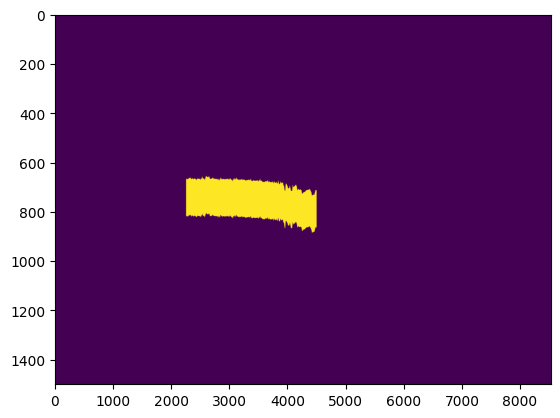

In [739]:
plt.imshow(zeros, aspect='auto')

In [740]:
#create a 2D numpy array of zeros with dimensions (1500, 8530)
# Create a 2D numpy array of zeros with dimensions (1500, 8530)
#p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25
zeros = np.zeros((1500, 8530))

#convert the trace_p_arrival_sec_interpolated2 column to a numpy array and multiply by 25
s_dataset["Sample#"] = s_dataset['trace_s_arrival_sec_interpolated2']*25

#drop Nan values
s_dataset.dropna(subset=['Sample#', 'das_number'], inplace=True)

#match the sample# column and das_number columns to the zeros array with it (sample#, das_number) and assign 1 values to those points
for index, row in s_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        zeros[sample_number, das_number] = 1

#add 1 values each sample for 250 samples after the sample number for the s-wave 
for index, row in s_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        for i in range(1, 25 * s_arrival_mask + 1):
            if sample_number + i < 1500:
                zeros[sample_number + i, das_number] = 1

#save zeroes
np.save('F:/DAS/'+str(s_arrival_mask)+'/s/s-wave_2023-12-03T07.29.56.880000Z_'+str(s_arrival_mask)+'sec_filled.npy', zeros)

#save zeros as a csv file
#np.savetxt('F:/DAS/p-wave_2023-12-30_22.35.57_UTC.np', zeros, delimiter=',')


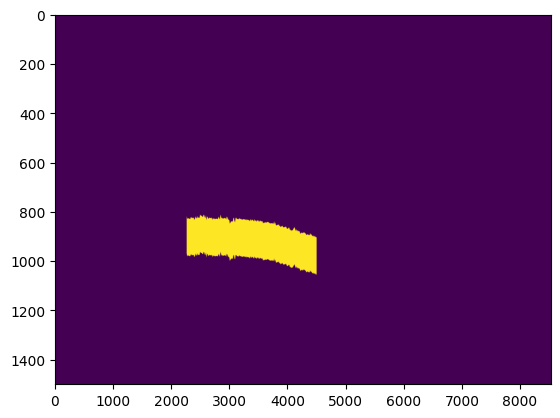

In [741]:
plt.imshow(zeros, aspect='auto')

In [742]:
# #turn previous section into a for loop to iterate through all the unique trace_start_times

# for i in unique_trace_start_times_dropped:
#     if i.strip() == '':
#         print(f"Skipping invalid trace_start_time: '{i}'")
#         continue
    
#     # Define directory and filename
#     # Convert i into a string with format YYYYMMDD_HHMMSS
#     name = str(i).replace(" ", "_").replace(":", "_").replace("-", "_").replace(".", "_")
    
#     directory = "F:/DAS/pick_plots_interpolated_20250401"
#     filename = str(name) + ".png"

#     # Combine directory and filename
#     filepath = os.path.join(directory, filename)

#     # Select the specific row based on the index
#     data = grouped_df_dropped.loc[i]

#     # Select specific columns from the row
#     dropped_dataset = data[['trace_p_arrival_sec', 'trace_s_arrival_sec', 'das_number']]
#     p_dataset = dropped_dataset[['trace_p_arrival_sec','das_number']]
#     s_dataset = dropped_dataset[['trace_s_arrival_sec','das_number']]

#     #drop Nans
#     p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
#     s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)
    
#     #convert das_number column to int
#     p_dataset['das_number'] = p_dataset['das_number'].astype(float)
#     s_dataset['das_number'] = s_dataset['das_number'].astype(float)
#     p_dataset['trace_p_arrival_sec'] = p_dataset['trace_p_arrival_sec'].astype(float)
#     s_dataset['trace_s_arrival_sec'] = s_dataset['trace_s_arrival_sec'].astype(float)

#     # Fit individual polynomials for p_dataset and s_dataset
#     p_coeffs_individual = np.polyfit(p_dataset['das_number'].values, p_dataset['trace_p_arrival_sec'].values, deg=1)
#     s_coeffs_individual = np.polyfit(s_dataset['das_number'].values, s_dataset['trace_s_arrival_sec'].values, deg=1)

#     # # Calculate the trends
#     p_trend_individual = np.polyval(p_coeffs_individual, pd.to_numeric(p_dataset['das_number']))
#     s_trend_individual = np.polyval(s_coeffs_individual, pd.to_numeric(s_dataset['das_number']))

#     #Detrend by subtracting the individual trends
#     p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
#     s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual

#     #calculate 2 standard deviations from the mean for the trace_p_arrival_sec and trace_s_arrival_sec columns
#     p_dataset_mean = p_dataset['trace_p_arrival_sec_detrended'].mean()
#     p_dataset_std = p_dataset['trace_p_arrival_sec_detrended'].std()
#     p_dataset_2std = 2 * p_dataset_std

#     # do it for s_dataset
#     s_dataset_mean = s_dataset['trace_s_arrival_sec_detrended'].mean()
#     s_dataset_std = s_dataset['trace_s_arrival_sec_detrended'].std()
#     s_dataset_2std = 2 * s_dataset_std
    
#     #save values for index which are greater than 2 standard deviations from the mean for the trace_p_arrival_sec column
#     p_dataset_outliers = p_dataset[(p_dataset['trace_p_arrival_sec_detrended'].values > p_dataset_2std) | 
#                                    (p_dataset['trace_p_arrival_sec_detrended'].values < -p_dataset_2std)]

#     #replace p_dataset trace_p_arrival_sec and trace_p_arrival_sec_detrended with Nans for the das_number values that occur in p_dataset_outliers
#     p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec'] = np.nan
#     p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec_detrended'] = np.nan

#     # Save values for index which are greater than 2 standard deviations from the mean for the trace_s_arrival_sec column
#     s_dataset_outliers = s_dataset[(s_dataset['trace_s_arrival_sec_detrended'].values > s_dataset_2std) | 
#                                    (s_dataset['trace_s_arrival_sec_detrended'].values < -s_dataset_2std)]

#     # Replace s_dataset trace_s_arrival_sec and trace_s_arrival_sec_detrended with NaNs for the das_number values that occur in s_dataset_outliers
#     s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec'] = np.nan
#     s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec_detrended'] = np.nan

#     #interpolate the missing values from the p_outliers and s_outliers dataframes using the interpolate function
#     p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
#     s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()

#     new_array = arange(1, 10000, 1)

#     # Create a DataFrame with all possible das_number values from new_array
#     full_range_df = pd.DataFrame({'das_number': new_array})

#     # Merge with p_dataset and s_dataset to include missing values
#     p_dataset = full_range_df.merge(p_dataset, on='das_number', how='left')
#     s_dataset = full_range_df.merge(s_dataset, on='das_number', how='left')

#     #interpolate again to fill the missing values based on trace_p_arrivaL_sec_interpolated
#     p_dataset['trace_p_arrival_sec_interpolated2'] = p_dataset['trace_p_arrival_sec_interpolated'].interpolate()

#     #interpolate again to fill the missing values based on trace_s_arrivaL_sec_interpolated
#     s_dataset['trace_s_arrival_sec_interpolated2'] = s_dataset['trace_s_arrival_sec_interpolated'].interpolate()

#     # Plot the interpolated values
#     plt.figure(figsize=(10, 6))
  
#     plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated2'], 'o', color='blue', label='P Arrival')
#     plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated2'], 'o', color='red', label='S Arrival')

#     plt.title(f'Interpolated Trace Arrivals vs Channel for {i}')
#     plt.xlabel('Channel')
#     plt.ylabel('Arrival Time (sec)')
#     plt.ylim(0, 60)
#     plt.legend()

#     # Set the number of ticks to 5
#     plt.gca().xaxis.set_major_locator(MaxNLocator(5))
#     plt.savefig(filepath)
#     plt.close()

### 2023-12-03T07:29:57.200000Z

#### Background

In [743]:
# Select the specific row based on the index
data_2023_12_30 = grouped_df_dropped.loc['2023-12-03T07:29:57.200000Z']

# Select specific columns from the row
dropped_dataset = data_2023_12_30[['trace_p_arrival_sec', 'trace_s_arrival_sec', 'das_number']]
p_dataset = dropped_dataset[['trace_p_arrival_sec','das_number']]
s_dataset = dropped_dataset[['trace_s_arrival_sec','das_number']]


In [744]:
p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)

C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\751016926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\751016926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)


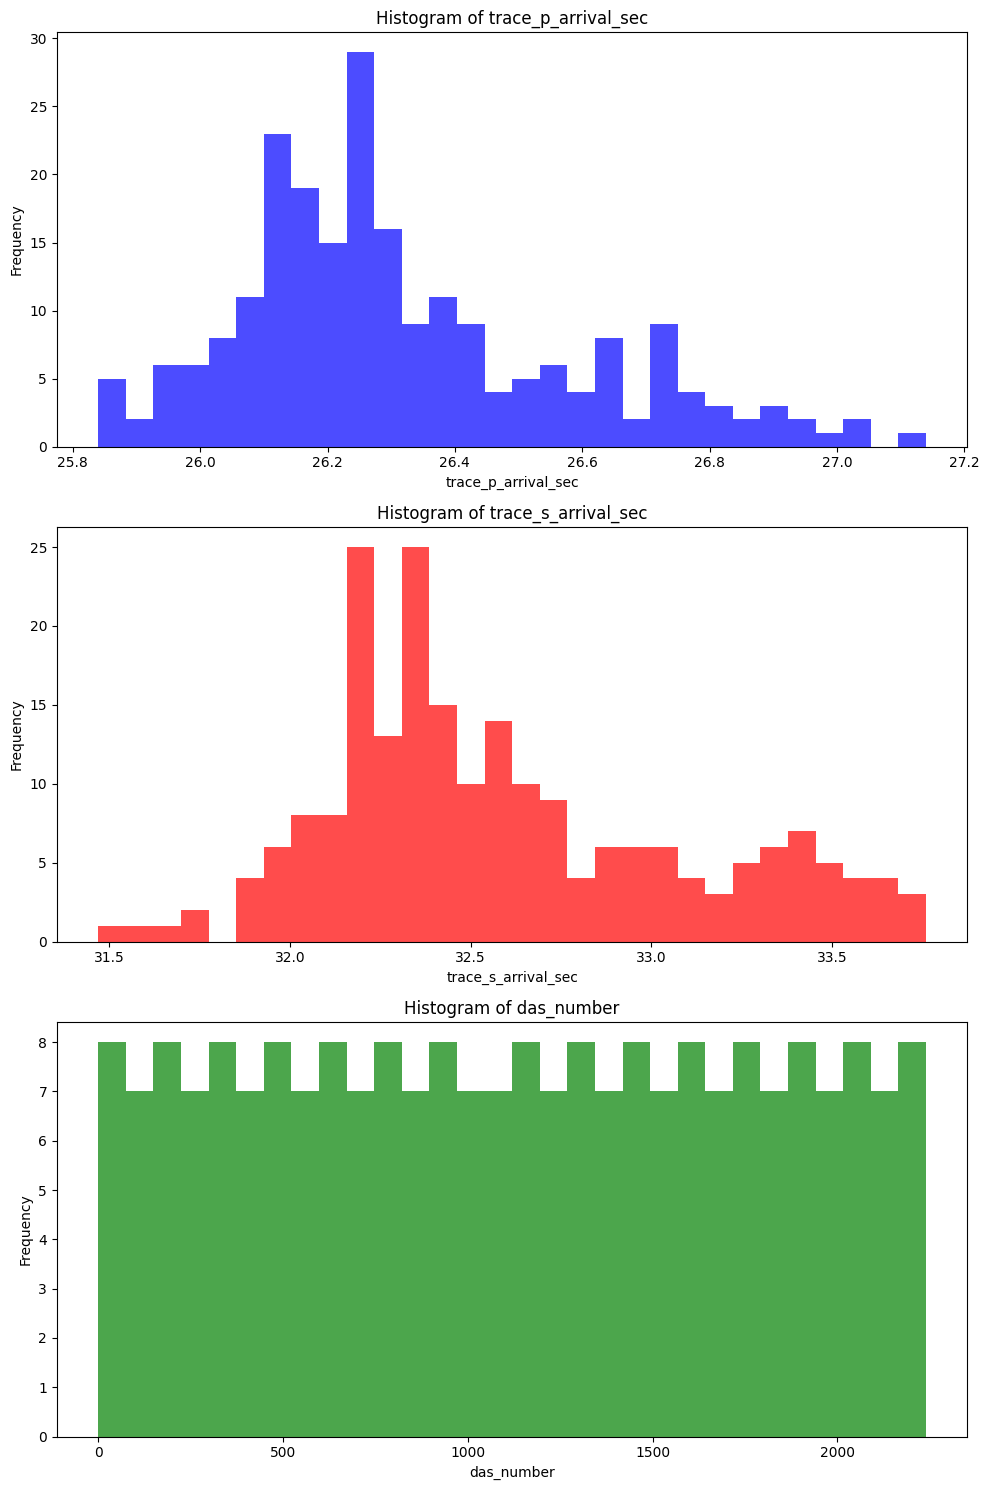

In [745]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(dropped_dataset['trace_p_arrival_sec'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(dropped_dataset['trace_s_arrival_sec'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')

# Histogram for das_number
axes[2].hist(pd.to_numeric(dropped_dataset['das_number'], errors='coerce').dropna(), bins=30, color='green', alpha=0.7)
axes[2].set_title('Histogram of das_number')
axes[2].set_xlabel('das_number')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

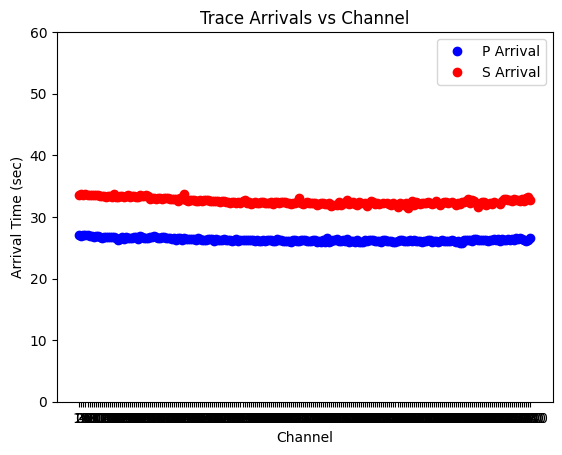

In [746]:
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

In [747]:
p_dataset
#convert das_number column to int
p_dataset['das_number'] = p_dataset['das_number'].astype(float)
s_dataset['das_number'] = s_dataset['das_number'].astype(float)
p_dataset['trace_p_arrival_sec'] = p_dataset['trace_p_arrival_sec'].astype(float)
s_dataset['trace_s_arrival_sec'] = s_dataset['trace_s_arrival_sec'].astype(float)



C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['das_number'] = p_dataset['das_number'].astype(float)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['das_number'] = s_dataset['das_number'].astype(float)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [748]:

#is there nans in p_dataset["trace_[arrival_sec"]"]
p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
print(p_dataset["trace_p_arrival_sec"].isna())


86       False
181      False
276      False
371      False
466      False
         ...  
20986    False
21081    False
21176    False
21271    False
21366    False
Name: trace_p_arrival_sec, Length: 225, dtype: bool


C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\620326073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)


In [749]:
print(p_dataset["das_number"].dtype)
print(p_dataset["trace_p_arrival_sec"].dtype)
print(s_dataset["das_number"].dtype)
print(s_dataset["trace_s_arrival_sec"].dtype)


float64
float64
float64
float64


In [750]:
print(p_dataset["das_number"].values)
print(p_dataset["trace_p_arrival_sec"].values)
print(s_dataset["das_number"].values)
print(s_dataset["trace_s_arrival_sec"].values)


[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.
  120.  130.  140.  150.  160.  170.  180.  190.  200.  210.  220.  230.
  240.  250.  260.  270.  280.  290.  300.  310.  320.  330.  340.  350.
  360.  370.  380.  390.  400.  410.  420.  430.  440.  450.  460.  470.
  480.  490.  500.  510.  520.  530.  540.  550.  560.  570.  580.  590.
  600.  610.  620.  630.  640.  650.  660.  670.  680.  690.  700.  710.
  720.  730.  740.  750.  760.  770.  780.  790.  800.  810.  820.  830.
  840.  850.  860.  870.  880.  890.  900.  910.  920.  930.  940.  950.
  960.  970.  980.  990. 1000. 1010. 1020. 1030. 1040. 1050. 1060. 1070.
 1080. 1090. 1100. 1110. 1120. 1130. 1140. 1150. 1160. 1170. 1180. 1190.
 1200. 1210. 1220. 1230. 1240. 1250. 1260. 1270. 1280. 1290. 1300. 1310.
 1320. 1330. 1340. 1350. 1360. 1370. 1380. 1390. 1400. 1410. 1420. 1430.
 1440. 1450. 1460. 1470. 1480. 1490. 1500. 1510. 1520. 1530. 1540. 1550.
 1560. 1570. 1580. 1590. 1600. 1610. 1620. 1630. 16

In [751]:
import numpy as np
import matplotlib.pyplot as plt

# Fit individual polynomials for p_dataset and s_dataset
p_coeffs_individual = np.polyfit(p_dataset['das_number'].values, p_dataset['trace_p_arrival_sec'].values, deg=1)
s_coeffs_individual = np.polyfit(s_dataset['das_number'].values, s_dataset['trace_s_arrival_sec'].values, deg=1)

# # Calculate the trends
p_trend_individual = np.polyval(p_coeffs_individual, pd.to_numeric(p_dataset['das_number']))
s_trend_individual = np.polyval(s_coeffs_individual, pd.to_numeric(s_dataset['das_number']))

# # Detrend by subtracting the individual trends
p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual



C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\25613787.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual


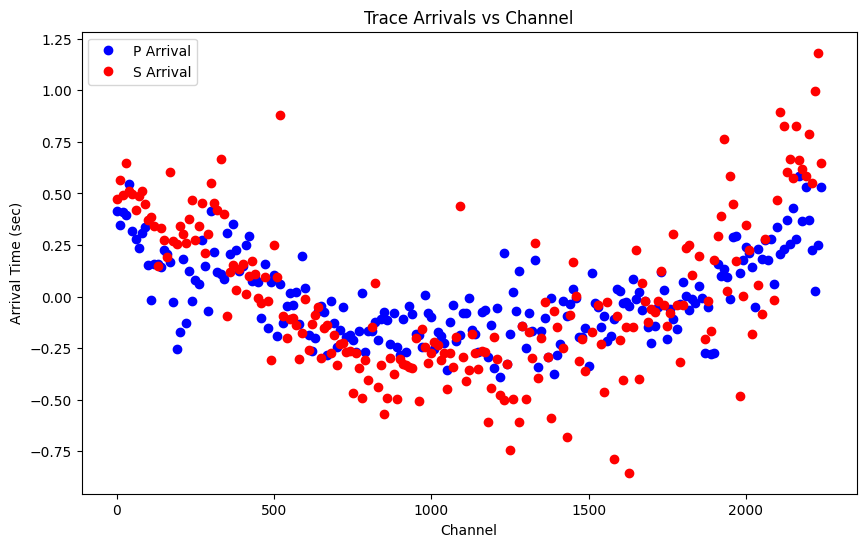

In [752]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_detrended'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_detrended'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.legend()
# Set the number of ticks to 5
plt.gca().xaxis.set_major_locator(MaxNLocator(5))

Text(0, 0.5, 'Frequency')

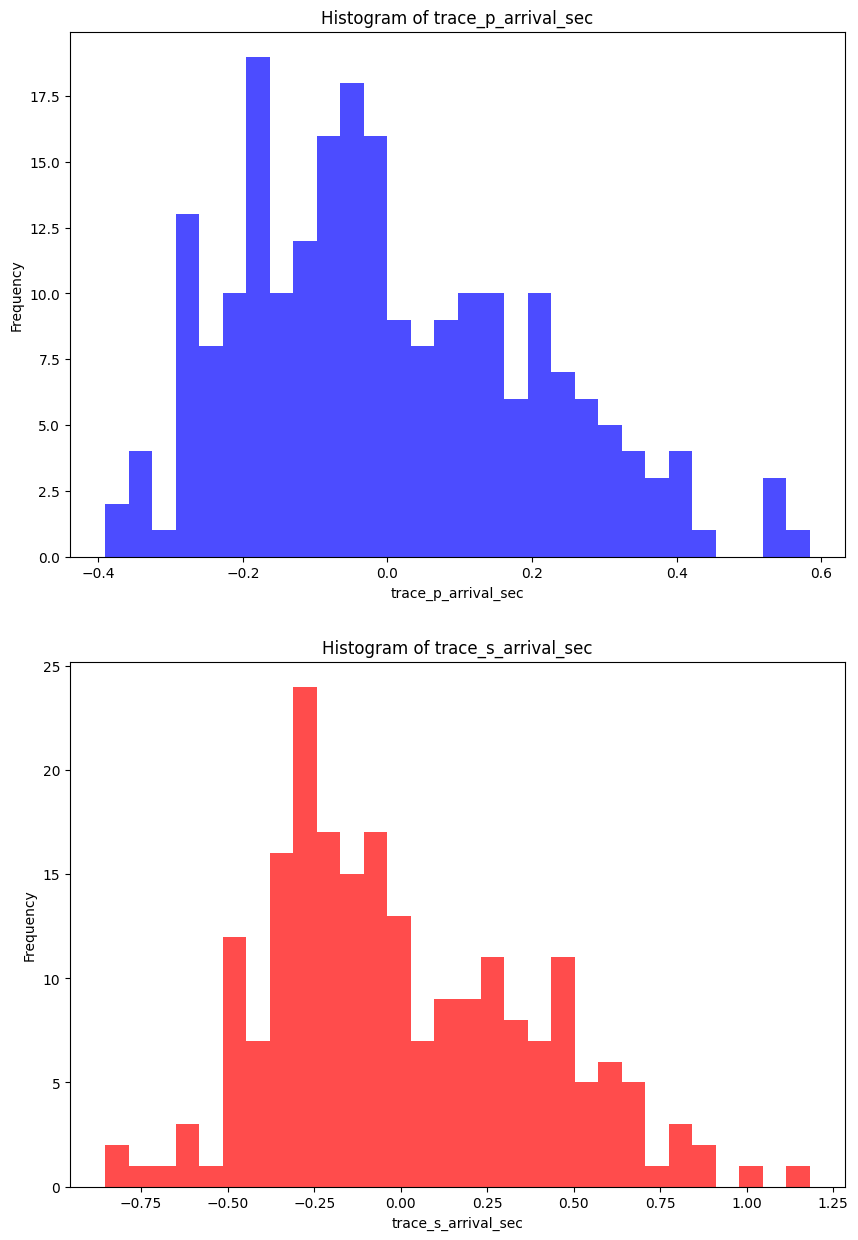

In [753]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(p_dataset['trace_p_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(s_dataset['trace_s_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')


In [754]:
#calculate 2 standard deviations from the mean for the trace_p_arrival_sec and trace_s_arrival_sec columns
p_dataset_mean = p_dataset['trace_p_arrival_sec_detrended'].mean()
p_dataset_std = p_dataset['trace_p_arrival_sec_detrended'].std()
p_dataset_2std = 2 * p_dataset_std

print(p_dataset_mean)
print(p_dataset_std)
print(p_dataset_2std)



-3.0158591673373142e-15
0.20375721494662766
0.4075144298932553


In [755]:
# do it for s_dataset
s_dataset_mean = s_dataset['trace_s_arrival_sec_detrended'].mean()
s_dataset_std = s_dataset['trace_s_arrival_sec_detrended'].std()
s_dataset_2std = 2 * s_dataset_std

print(s_dataset_mean)
print(s_dataset_std)
print(s_dataset_2std)

-1.3847321222487534e-14
0.37829751389399924
0.7565950277879985


In [756]:
#save values for index which are greater than 2 standard deviations from the mean for the trace_p_arrival_sec column
p_dataset_outliers = p_dataset[(p_dataset['trace_p_arrival_sec_detrended'].values > p_dataset_2std) | 
                               (p_dataset['trace_p_arrival_sec_detrended'].values < -p_dataset_2std)]

p_dataset_outliers

#replace p_dataset trace_p_arrival_sec and trace_p_arrival_sec_detrended with Nans for the das_number values that occur in p_dataset_outliers
p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec'] = np.nan
p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec_detrended'] = np.nan


#find the columns that are Nans
p_dataset[p_dataset['trace_p_arrival_sec'].isna()]

trace_p_arrival_sec  das_number  trace_p_arrival_sec_detrended
86                     NaN         0.0                            NaN
276                    NaN        20.0                            NaN
466                    NaN        40.0                            NaN
2936                   NaN       300.0                            NaN
20511                  NaN      2150.0                            NaN
20701                  NaN      2170.0                            NaN
20891                  NaN      2190.0                            NaN
21366                  NaN      2240.0                            NaN

In [757]:
# Save values for index which are greater than 2 standard deviations from the mean for the trace_s_arrival_sec column
s_dataset_outliers = s_dataset[(s_dataset['trace_s_arrival_sec_detrended'].values > s_dataset_2std) | 
                               (s_dataset['trace_s_arrival_sec_detrended'].values < -s_dataset_2std)]

s_dataset_outliers

# Replace s_dataset trace_s_arrival_sec and trace_s_arrival_sec_detrended with NaNs for the das_number values that occur in s_dataset_outliers
s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec'] = np.nan
s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec_detrended'] = np.nan

# Find the columns that are NaNs
s_dataset[s_dataset['trace_s_arrival_sec'].isna()]


trace_s_arrival_sec  das_number  trace_s_arrival_sec_detrended
5026                   NaN       520.0                            NaN
15096                  NaN      1580.0                            NaN
15571                  NaN      1630.0                            NaN
18421                  NaN      1930.0                            NaN
20131                  NaN      2110.0                            NaN
20226                  NaN      2120.0                            NaN
20606                  NaN      2160.0                            NaN
20986                  NaN      2200.0                            NaN
21176                  NaN      2220.0                            NaN
21271                  NaN      2230.0                            NaN

Text(0, 0.5, 'Frequency')

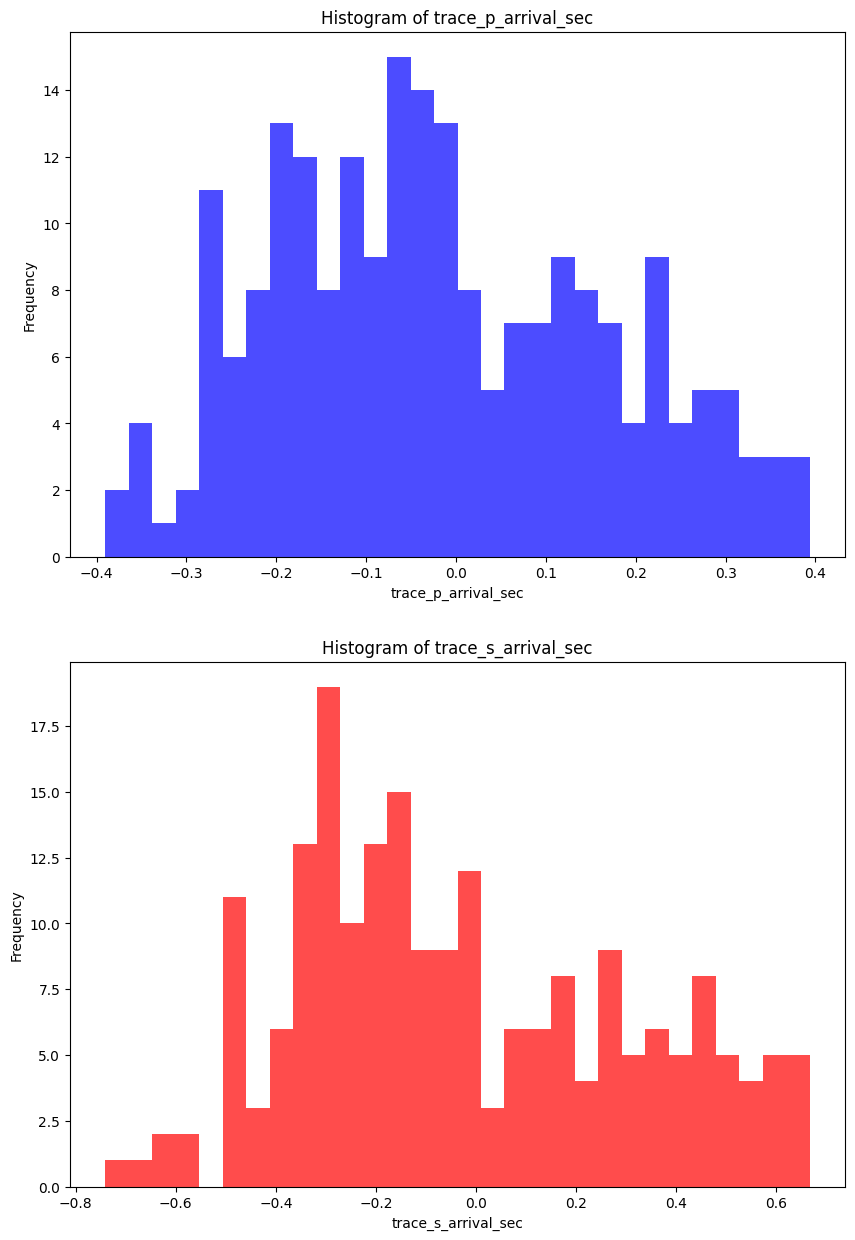

In [758]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(p_dataset['trace_p_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(s_dataset['trace_s_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')

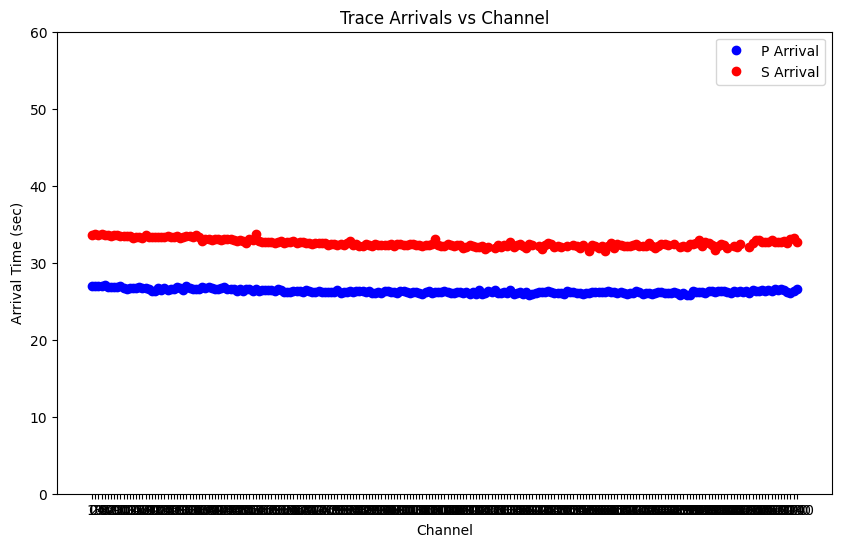

In [759]:
#original
plt.figure(figsize=(10, 6))


plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

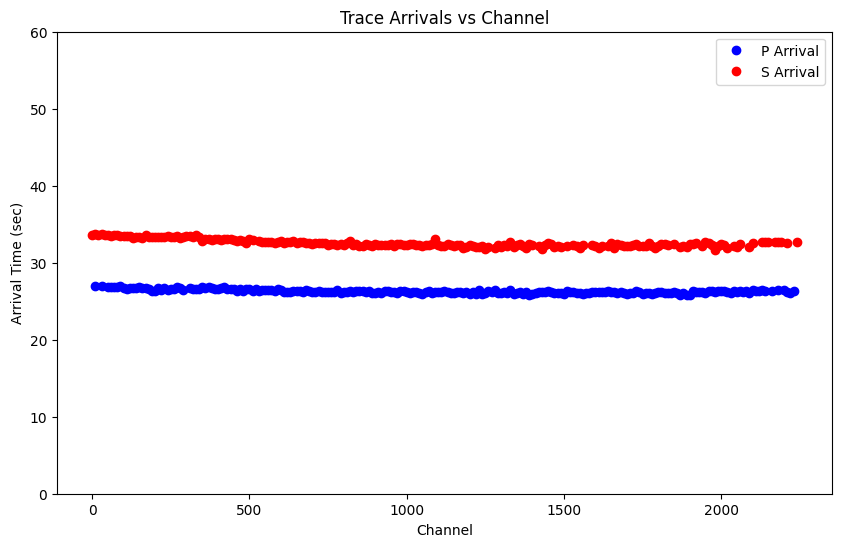

In [760]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

In [761]:
#interpolate the missing values from the p_outliers and s_outliers dataframes using the interpolate function
p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()

s_dataset


C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\3394753993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()


trace_s_arrival_sec  das_number  trace_s_arrival_sec_detrended  \
86               33.599998         0.0                       0.472236   
181              33.689999        10.0                       0.567170   
276              33.610001        20.0                       0.492104   
371              33.759998        30.0                       0.647034   
466              33.619999        40.0                       0.511968   
...                    ...         ...                            ...   
20986                  NaN      2200.0                            NaN   
21081            32.590000      2210.0                       0.552406   
21176                  NaN      2220.0                            NaN   
21271                  NaN      2230.0                            NaN   
21366            32.669998      2240.0                       0.647203   

       trace_s_arrival_sec_interpolated  
86                            33.599998  
181                           33.689999  
276                           33.610001  
371                           33.759998  
466                           33.619999  
...                                 ...  
20986                         32.610000  
21081                         32.590000  
21176                         32.616666  
21271                         32.643332  
21366                         32.669998  

[215 rows x 4 columns]

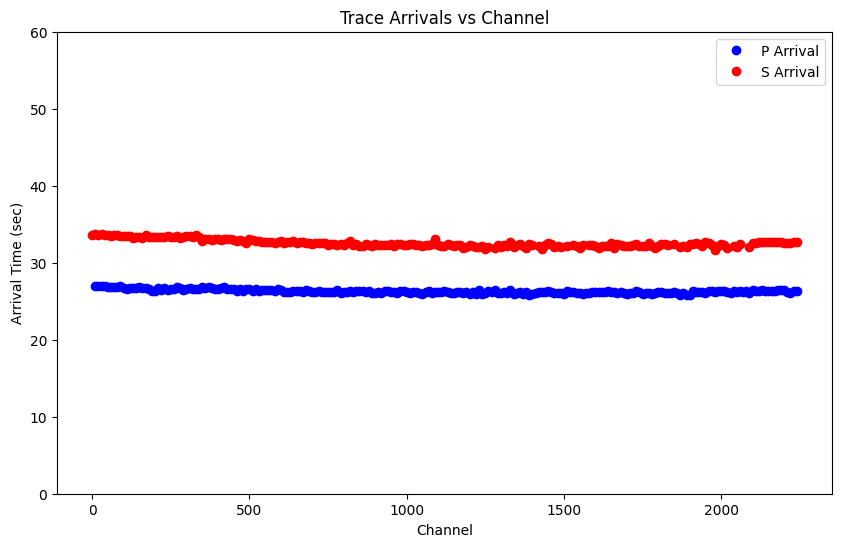

In [762]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

#### Interpolation 2

In [763]:
#find min and max das_number for p_dataset and s_dataset
p_dataset_min = p_dataset['das_number'].min()
p_dataset_max = p_dataset['das_number'].max()
s_dataset_min = s_dataset['das_number'].min()
s_dataset_max = s_dataset['das_number'].max()

print(f"p_dataset das_number min: {p_dataset_min}, max: {p_dataset_max}")
print(f"s_dataset das_number min: {s_dataset_min}, max: {s_dataset_max}")

p_dataset das_number min: 0.0, max: 2240.0
s_dataset das_number min: 0.0, max: 2240.0


In [764]:
from numpy import arange

new_array = arange(0, 2241, 1)
new_array


array([   0,    1,    2, ..., 2238, 2239, 2240])

In [765]:
# Create a DataFrame with all possible das_number values from new_array
full_range_df = pd.DataFrame({'das_number': new_array})

# Merge with p_dataset and s_dataset to include missing values
p_dataset = full_range_df.merge(p_dataset, on='das_number', how='left')
s_dataset = full_range_df.merge(s_dataset, on='das_number', how='left')

#interpolate again to fill the missing values based on trace_p_arrivaL_sec_interpolated
p_dataset['trace_p_arrival_sec_interpolated2'] = p_dataset['trace_p_arrival_sec_interpolated'].interpolate()
p_dataset

#interpolate again to fill the missing values based on trace_s_arrivaL_sec_interpolated
s_dataset['trace_s_arrival_sec_interpolated2'] = s_dataset['trace_s_arrival_sec_interpolated'].interpolate()
#s_dataset


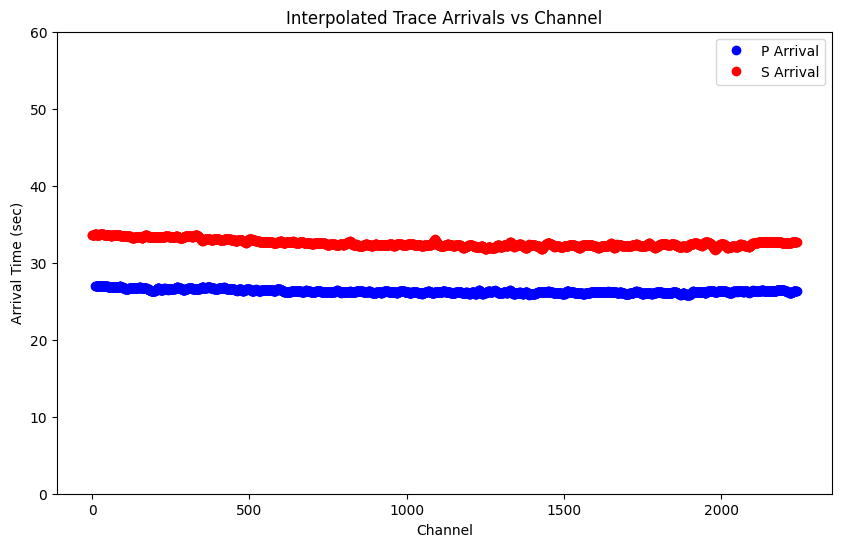

In [766]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated2'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated2'], 'o', color='red', label='S Arrival')

plt.title(f'Interpolated Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

#### File Creation:

In [767]:
#create a 2D numpy array of zeros with dimensions (1500, 8530)
# Create a 2D numpy array of zeros with dimensions (1500, 8530)
#p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25
zeros = np.zeros((1500, 8530))

#convert the trace_p_arrival_sec_interpolated2 column to a numpy array and multiply by 25
p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25

#drop Nan values
p_dataset.dropna(subset=['Sample#', 'das_number'], inplace=True)

#match the sample# column and das_number columns to the zeros array with it (sample#, das_number) and assign 1 values to those points
for index, row in p_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        zeros[sample_number, das_number] = 1

#add 1 values each sample for 250 samples after the sample number for the s-wave 
for index, row in p_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        for i in range(1, 25 * p_arrival_mask + 1):
            if sample_number + i < 1500:
                zeros[sample_number + i, das_number] = 1

#save zeroes
np.save('F:/DAS/'+str(p_arrival_mask)+'/p/p-wave_2023_12_03T07_29_57_200000Z_'+str(p_arrival_mask)+'sec_filled.npy', zeros)

#save zeros as a csv file
#np.savetxt('F:/DAS/p-wave_2023-12-30_22.35.57_UTC.np', zeros, delimiter=',')


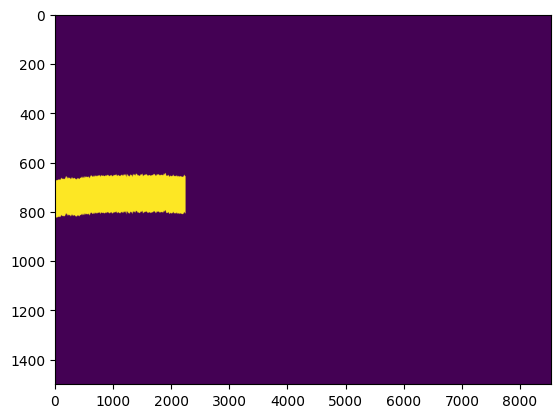

In [768]:
plt.imshow(zeros, aspect='auto')

In [769]:
#create a 2D numpy array of zeros with dimensions (1500, 8530)
# Create a 2D numpy array of zeros with dimensions (1500, 8530)
#p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25
zeros = np.zeros((1500, 8530))

#convert the trace_p_arrival_sec_interpolated2 column to a numpy array and multiply by 25
s_dataset["Sample#"] = s_dataset['trace_s_arrival_sec_interpolated2']*25

#drop Nan values
s_dataset.dropna(subset=['Sample#', 'das_number'], inplace=True)

#match the sample# column and das_number columns to the zeros array with it (sample#, das_number) and assign 1 values to those points
for index, row in s_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        zeros[sample_number, das_number] = 1

#add 1 values each sample for 250 samples after the sample number for the s-wave 
for index, row in p_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        for i in range(1, 25 * s_arrival_mask + 1):
            if sample_number + i < 1500:
                zeros[sample_number + i, das_number] = 1

#save zeroes
np.save('F:/DAS/'+str(s_arrival_mask)+'/s/s-wave_2023_12_03T07_29_57_200000Z_'+str(s_arrival_mask)+'sec_filled.npy', zeros)

#save zeros as a csv file
#np.savetxt('F:/DAS/p-wave_2023-12-30_22.35.57_UTC.np', zeros, delimiter=',')


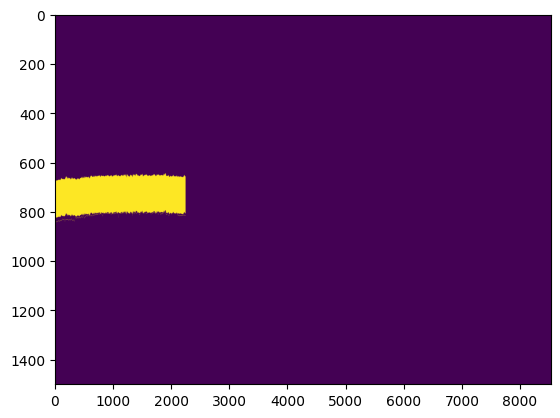

In [770]:
plt.imshow(zeros, aspect='auto')

In [771]:
# #turn previous section into a for loop to iterate through all the unique trace_start_times

# for i in unique_trace_start_times_dropped:
#     if i.strip() == '':
#         print(f"Skipping invalid trace_start_time: '{i}'")
#         continue
    
#     # Define directory and filename
#     # Convert i into a string with format YYYYMMDD_HHMMSS
#     name = str(i).replace(" ", "_").replace(":", "_").replace("-", "_").replace(".", "_")
    
#     directory = "F:/DAS/pick_plots_interpolated_20250401"
#     filename = str(name) + ".png"

#     # Combine directory and filename
#     filepath = os.path.join(directory, filename)

#     # Select the specific row based on the index
#     data = grouped_df_dropped.loc[i]

#     # Select specific columns from the row
#     dropped_dataset = data[['trace_p_arrival_sec', 'trace_s_arrival_sec', 'das_number']]
#     p_dataset = dropped_dataset[['trace_p_arrival_sec','das_number']]
#     s_dataset = dropped_dataset[['trace_s_arrival_sec','das_number']]

#     #drop Nans
#     p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
#     s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)
    
#     #convert das_number column to int
#     p_dataset['das_number'] = p_dataset['das_number'].astype(float)
#     s_dataset['das_number'] = s_dataset['das_number'].astype(float)
#     p_dataset['trace_p_arrival_sec'] = p_dataset['trace_p_arrival_sec'].astype(float)
#     s_dataset['trace_s_arrival_sec'] = s_dataset['trace_s_arrival_sec'].astype(float)

#     # Fit individual polynomials for p_dataset and s_dataset
#     p_coeffs_individual = np.polyfit(p_dataset['das_number'].values, p_dataset['trace_p_arrival_sec'].values, deg=1)
#     s_coeffs_individual = np.polyfit(s_dataset['das_number'].values, s_dataset['trace_s_arrival_sec'].values, deg=1)

#     # # Calculate the trends
#     p_trend_individual = np.polyval(p_coeffs_individual, pd.to_numeric(p_dataset['das_number']))
#     s_trend_individual = np.polyval(s_coeffs_individual, pd.to_numeric(s_dataset['das_number']))

#     #Detrend by subtracting the individual trends
#     p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
#     s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual

#     #calculate 2 standard deviations from the mean for the trace_p_arrival_sec and trace_s_arrival_sec columns
#     p_dataset_mean = p_dataset['trace_p_arrival_sec_detrended'].mean()
#     p_dataset_std = p_dataset['trace_p_arrival_sec_detrended'].std()
#     p_dataset_2std = 2 * p_dataset_std

#     # do it for s_dataset
#     s_dataset_mean = s_dataset['trace_s_arrival_sec_detrended'].mean()
#     s_dataset_std = s_dataset['trace_s_arrival_sec_detrended'].std()
#     s_dataset_2std = 2 * s_dataset_std
    
#     #save values for index which are greater than 2 standard deviations from the mean for the trace_p_arrival_sec column
#     p_dataset_outliers = p_dataset[(p_dataset['trace_p_arrival_sec_detrended'].values > p_dataset_2std) | 
#                                    (p_dataset['trace_p_arrival_sec_detrended'].values < -p_dataset_2std)]

#     #replace p_dataset trace_p_arrival_sec and trace_p_arrival_sec_detrended with Nans for the das_number values that occur in p_dataset_outliers
#     p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec'] = np.nan
#     p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec_detrended'] = np.nan

#     # Save values for index which are greater than 2 standard deviations from the mean for the trace_s_arrival_sec column
#     s_dataset_outliers = s_dataset[(s_dataset['trace_s_arrival_sec_detrended'].values > s_dataset_2std) | 
#                                    (s_dataset['trace_s_arrival_sec_detrended'].values < -s_dataset_2std)]

#     # Replace s_dataset trace_s_arrival_sec and trace_s_arrival_sec_detrended with NaNs for the das_number values that occur in s_dataset_outliers
#     s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec'] = np.nan
#     s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec_detrended'] = np.nan

#     #interpolate the missing values from the p_outliers and s_outliers dataframes using the interpolate function
#     p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
#     s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()

#     new_array = arange(1, 10000, 1)

#     # Create a DataFrame with all possible das_number values from new_array
#     full_range_df = pd.DataFrame({'das_number': new_array})

#     # Merge with p_dataset and s_dataset to include missing values
#     p_dataset = full_range_df.merge(p_dataset, on='das_number', how='left')
#     s_dataset = full_range_df.merge(s_dataset, on='das_number', how='left')

#     #interpolate again to fill the missing values based on trace_p_arrivaL_sec_interpolated
#     p_dataset['trace_p_arrival_sec_interpolated2'] = p_dataset['trace_p_arrival_sec_interpolated'].interpolate()

#     #interpolate again to fill the missing values based on trace_s_arrivaL_sec_interpolated
#     s_dataset['trace_s_arrival_sec_interpolated2'] = s_dataset['trace_s_arrival_sec_interpolated'].interpolate()

#     # Plot the interpolated values
#     plt.figure(figsize=(10, 6))
  
#     plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated2'], 'o', color='blue', label='P Arrival')
#     plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated2'], 'o', color='red', label='S Arrival')

#     plt.title(f'Interpolated Trace Arrivals vs Channel for {i}')
#     plt.xlabel('Channel')
#     plt.ylabel('Arrival Time (sec)')
#     plt.ylim(0, 60)
#     plt.legend()

#     # Set the number of ticks to 5
#     plt.gca().xaxis.set_major_locator(MaxNLocator(5))
#     plt.savefig(filepath)
#     plt.close()

### 2023_12_14T13_41_57_200000Z

#### Background

In [772]:
# Select the specific row based on the index
data_2023_12_30 = grouped_df_dropped.loc['2023-12-14T13:41:57.200000Z']

# Select specific columns from the row
dropped_dataset = data_2023_12_30[['trace_p_arrival_sec', 'trace_s_arrival_sec', 'das_number']]
p_dataset = dropped_dataset[['trace_p_arrival_sec','das_number']]
s_dataset = dropped_dataset[['trace_s_arrival_sec','das_number']]


In [773]:
p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)

C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\751016926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\751016926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)


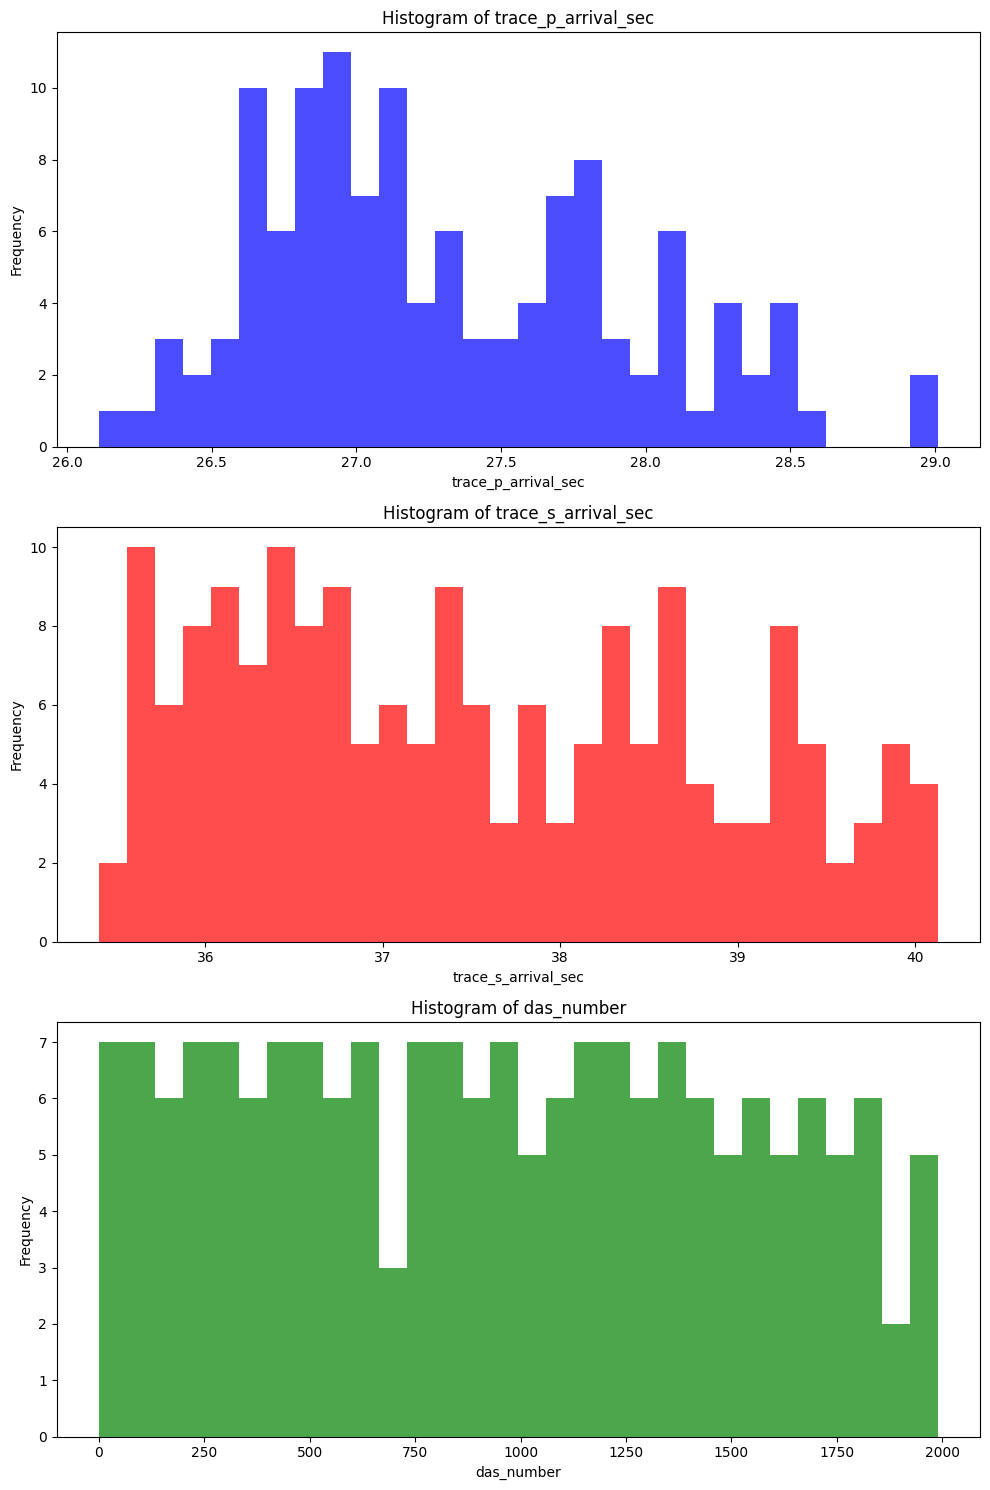

In [774]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(dropped_dataset['trace_p_arrival_sec'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(dropped_dataset['trace_s_arrival_sec'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')

# Histogram for das_number
axes[2].hist(pd.to_numeric(dropped_dataset['das_number'], errors='coerce').dropna(), bins=30, color='green', alpha=0.7)
axes[2].set_title('Histogram of das_number')
axes[2].set_xlabel('das_number')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

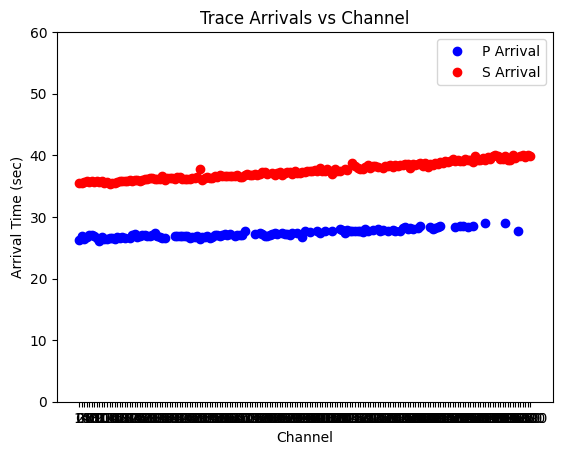

In [775]:
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

In [776]:
p_dataset
#convert das_number column to int
p_dataset['das_number'] = p_dataset['das_number'].astype(float)
s_dataset['das_number'] = s_dataset['das_number'].astype(float)
p_dataset['trace_p_arrival_sec'] = p_dataset['trace_p_arrival_sec'].astype(float)
s_dataset['trace_s_arrival_sec'] = s_dataset['trace_s_arrival_sec'].astype(float)



C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['das_number'] = p_dataset['das_number'].astype(float)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['das_number'] = s_dataset['das_number'].astype(float)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [777]:

#is there nans in p_dataset["trace_[arrival_sec"]"]
p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
print(p_dataset["trace_p_arrival_sec"].isna())


44       False
139      False
234      False
329      False
424      False
         ...  
15624    False
15814    False
16384    False
17334    False
17809    False
Name: trace_p_arrival_sec, Length: 124, dtype: bool


C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\620326073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)


In [778]:
print(p_dataset["das_number"].dtype)
print(p_dataset["trace_p_arrival_sec"].dtype)
print(s_dataset["das_number"].dtype)
print(s_dataset["trace_s_arrival_sec"].dtype)


float64
float64
float64
float64


In [779]:
print(p_dataset["das_number"].values)
print(p_dataset["trace_p_arrival_sec"].values)
print(s_dataset["das_number"].values)
print(s_dataset["trace_s_arrival_sec"].values)


[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.
  120.  130.  140.  150.  160.  170.  180.  200.  210.  220.  230.  240.
  250.  260.  270.  280.  290.  300.  310.  320.  330.  340.  380.  390.
  400.  410.  420.  430.  440.  450.  460.  470.  480.  490.  500.  510.
  520.  530.  540.  550.  560.  570.  580.  590.  600.  620.  630.  640.
  650.  660.  730.  750.  760.  770.  780.  790.  800.  810.  820.  840.
  850.  860.  870.  880.  900.  920.  930.  950.  980.  990. 1010. 1060.
 1090. 1100. 1110. 1120. 1130. 1140. 1150. 1160. 1170. 1180. 1190. 1200.
 1220. 1240. 1250. 1260. 1280. 1300. 1310. 1330. 1340. 1350. 1360. 1370.
 1380. 1400. 1410. 1450. 1460. 1480. 1490. 1510. 1580. 1600. 1620. 1640.
 1660. 1720. 1820. 1870.]
[26.25999999 26.87000084 26.44000101 26.75       27.07999992 27.049999
 26.88999891 26.61000085 26.11000085 26.65999985 26.37999892 26.39999986
 26.50999999 26.51999998 26.43000007 26.68000007 26.64999986 26.79000092
 26.64999986 26.64999986 27

In [780]:
import numpy as np
import matplotlib.pyplot as plt

# Fit individual polynomials for p_dataset and s_dataset
p_coeffs_individual = np.polyfit(p_dataset['das_number'].values, p_dataset['trace_p_arrival_sec'].values, deg=1)
s_coeffs_individual = np.polyfit(s_dataset['das_number'].values, s_dataset['trace_s_arrival_sec'].values, deg=1)

# # Calculate the trends
p_trend_individual = np.polyval(p_coeffs_individual, pd.to_numeric(p_dataset['das_number']))
s_trend_individual = np.polyval(s_coeffs_individual, pd.to_numeric(s_dataset['das_number']))

# # Detrend by subtracting the individual trends
p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual



C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\25613787.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\25613787.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual


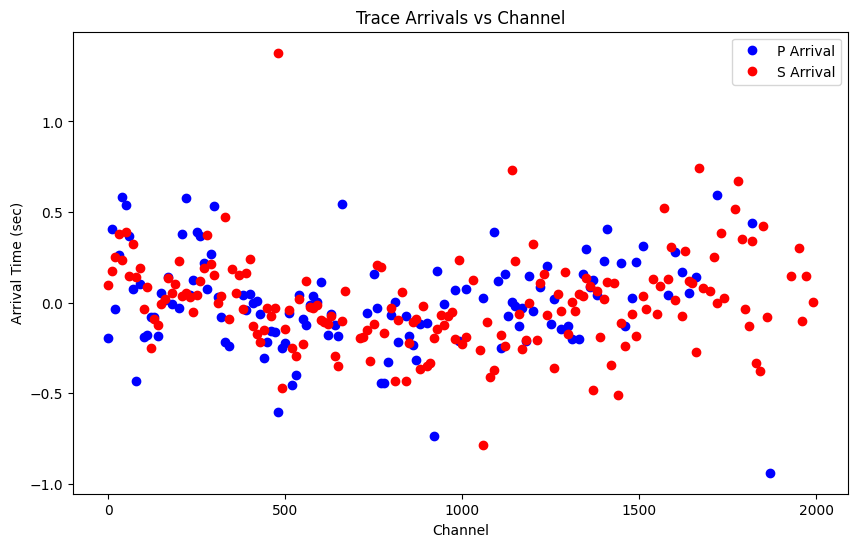

In [781]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_detrended'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_detrended'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.legend()
# Set the number of ticks to 5
plt.gca().xaxis.set_major_locator(MaxNLocator(5))

Text(0, 0.5, 'Frequency')

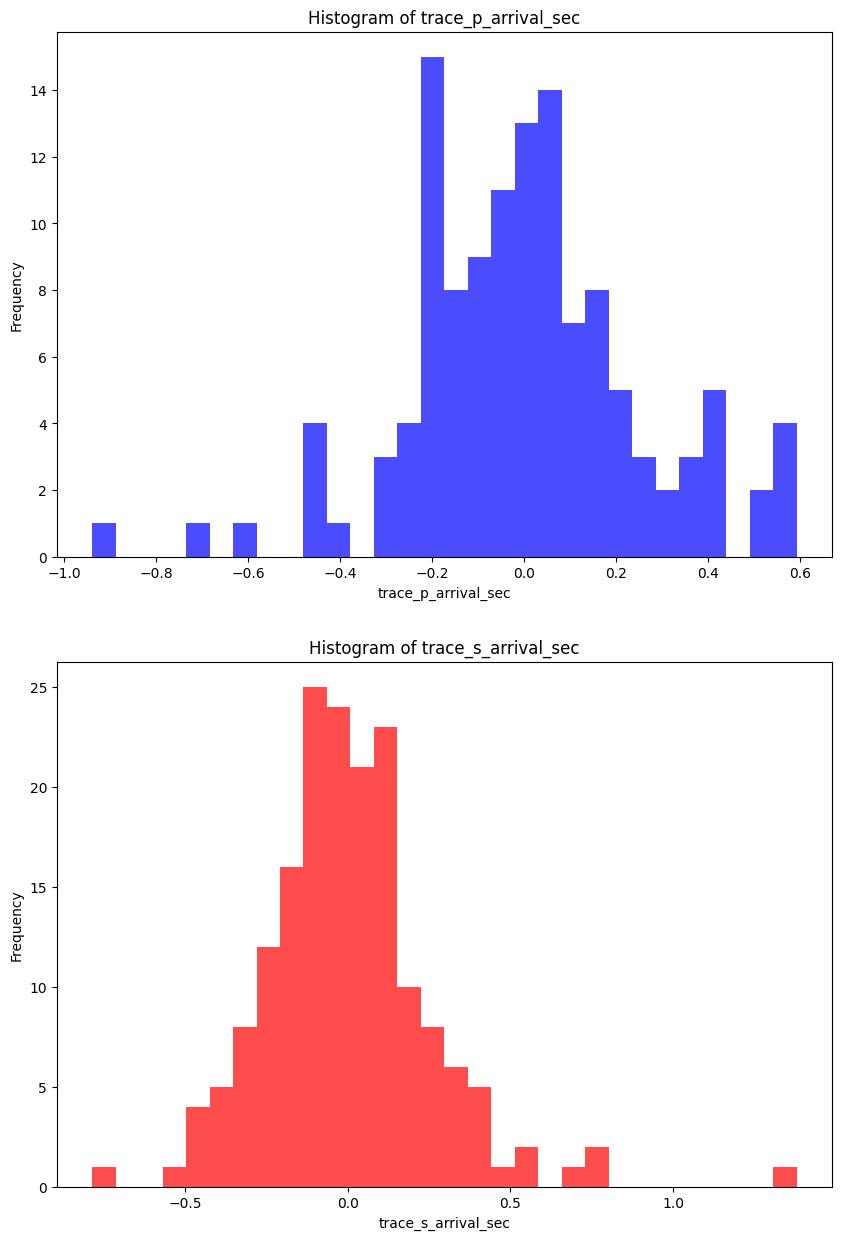

In [782]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(p_dataset['trace_p_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(s_dataset['trace_s_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')


In [783]:
#calculate 2 standard deviations from the mean for the trace_p_arrival_sec and trace_s_arrival_sec columns
p_dataset_mean = p_dataset['trace_p_arrival_sec_detrended'].mean()
p_dataset_std = p_dataset['trace_p_arrival_sec_detrended'].std()
p_dataset_2std = 2 * p_dataset_std

print(p_dataset_mean)
print(p_dataset_std)
print(p_dataset_2std)



4.211684764384465e-15
0.2586732200401014
0.5173464400802028


In [784]:
# do it for s_dataset
s_dataset_mean = s_dataset['trace_s_arrival_sec_detrended'].mean()
s_dataset_std = s_dataset['trace_s_arrival_sec_detrended'].std()
s_dataset_2std = 2 * s_dataset_std

print(s_dataset_mean)
print(s_dataset_std)
print(s_dataset_2std)

-9.325873406851315e-15
0.2573287514481611
0.5146575028963222


In [785]:
#save values for index which are greater than 2 standard deviations from the mean for the trace_p_arrival_sec column
p_dataset_outliers = p_dataset[(p_dataset['trace_p_arrival_sec_detrended'].values > p_dataset_2std) | 
                               (p_dataset['trace_p_arrival_sec_detrended'].values < -p_dataset_2std)]

p_dataset_outliers

#replace p_dataset trace_p_arrival_sec and trace_p_arrival_sec_detrended with Nans for the das_number values that occur in p_dataset_outliers
p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec'] = np.nan
p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec_detrended'] = np.nan


#find the columns that are Nans
p_dataset[p_dataset['trace_p_arrival_sec'].isna()]

trace_p_arrival_sec  das_number  trace_p_arrival_sec_detrended
424                    NaN        40.0                            NaN
519                    NaN        50.0                            NaN
2134                   NaN       220.0                            NaN
2894                   NaN       300.0                            NaN
4604                   NaN       480.0                            NaN
6314                   NaN       660.0                            NaN
8784                   NaN       920.0                            NaN
16384                  NaN      1720.0                            NaN
17809                  NaN      1870.0                            NaN

In [786]:
# Save values for index which are greater than 2 standard deviations from the mean for the trace_s_arrival_sec column
s_dataset_outliers = s_dataset[(s_dataset['trace_s_arrival_sec_detrended'].values > s_dataset_2std) | 
                               (s_dataset['trace_s_arrival_sec_detrended'].values < -s_dataset_2std)]

s_dataset_outliers

# Replace s_dataset trace_s_arrival_sec and trace_s_arrival_sec_detrended with NaNs for the das_number values that occur in s_dataset_outliers
s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec'] = np.nan
s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec_detrended'] = np.nan

# Find the columns that are NaNs
s_dataset[s_dataset['trace_s_arrival_sec'].isna()]


trace_s_arrival_sec  das_number  trace_s_arrival_sec_detrended
4604                   NaN       480.0                            NaN
10114                  NaN      1060.0                            NaN
10874                  NaN      1140.0                            NaN
14959                  NaN      1570.0                            NaN
15909                  NaN      1670.0                            NaN
16954                  NaN      1780.0                            NaN

Text(0, 0.5, 'Frequency')

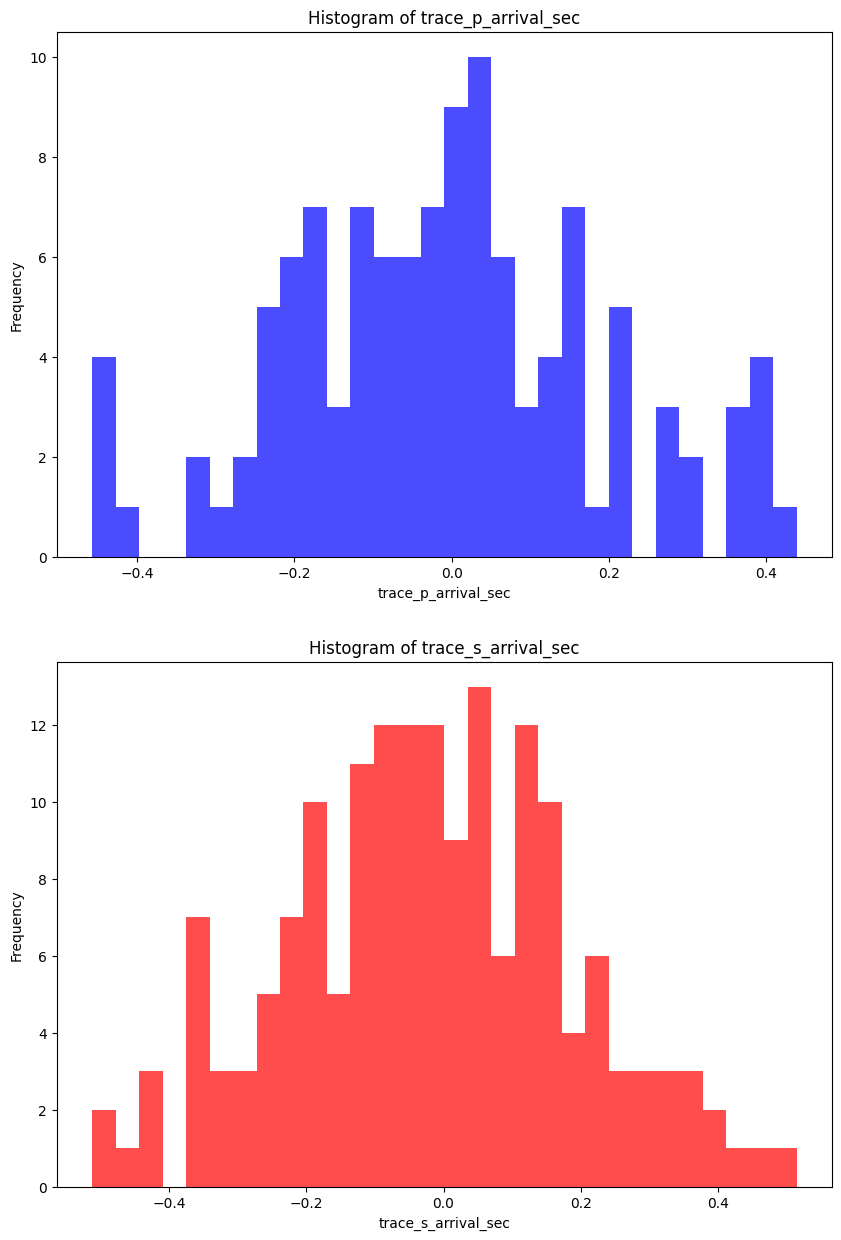

In [787]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(p_dataset['trace_p_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(s_dataset['trace_s_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')

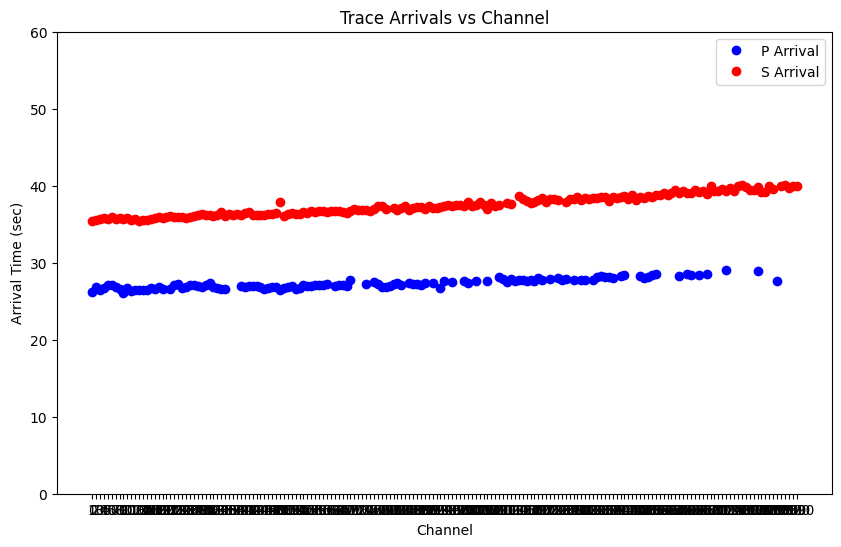

In [788]:
#original
plt.figure(figsize=(10, 6))


plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

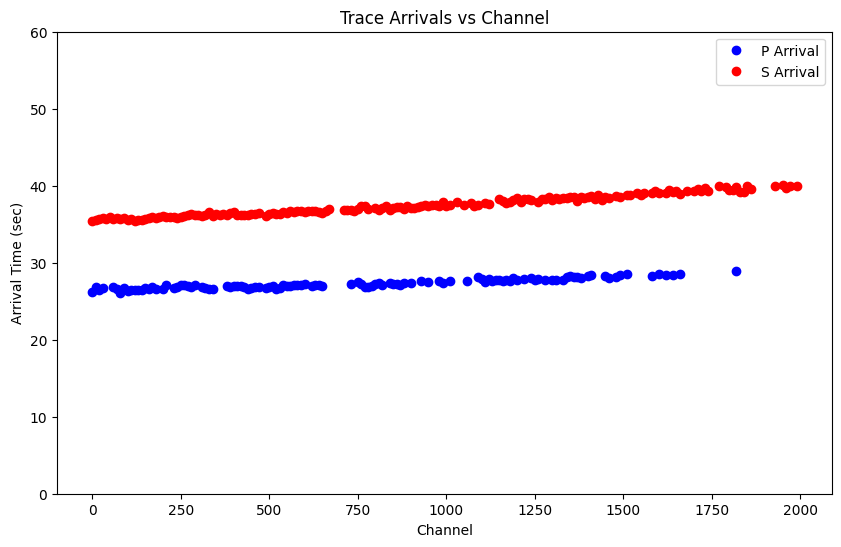

In [789]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

In [790]:
#interpolate the missing values from the p_outliers and s_outliers dataframes using the interpolate function
p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()

s_dataset


C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\3394753993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\3394753993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()


trace_s_arrival_sec  das_number  trace_s_arrival_sec_detrended  \
44               35.470001         0.0                       0.094918   
139              35.570000        10.0                       0.172090   
234              35.669998        20.0                       0.249262   
329              35.820000        30.0                       0.376437   
424              35.700001        40.0                       0.233612   
...                    ...         ...                            ...   
18379            39.930000      1930.0                       0.149393   
18569            40.130001      1950.0                       0.303741   
18664            39.750000      1960.0                      -0.099086   
18759            40.020000      1970.0                       0.148087   
18949            39.919998      1990.0                       0.002432   

       trace_s_arrival_sec_interpolated  
44                            35.470001  
139                           35.570000  
234                           35.669998  
329                           35.820000  
424                           35.700001  
...                                 ...  
18379                         39.930000  
18569                         40.130001  
18664                         39.750000  
18759                         40.020000  
18949                         39.919998  

[176 rows x 4 columns]

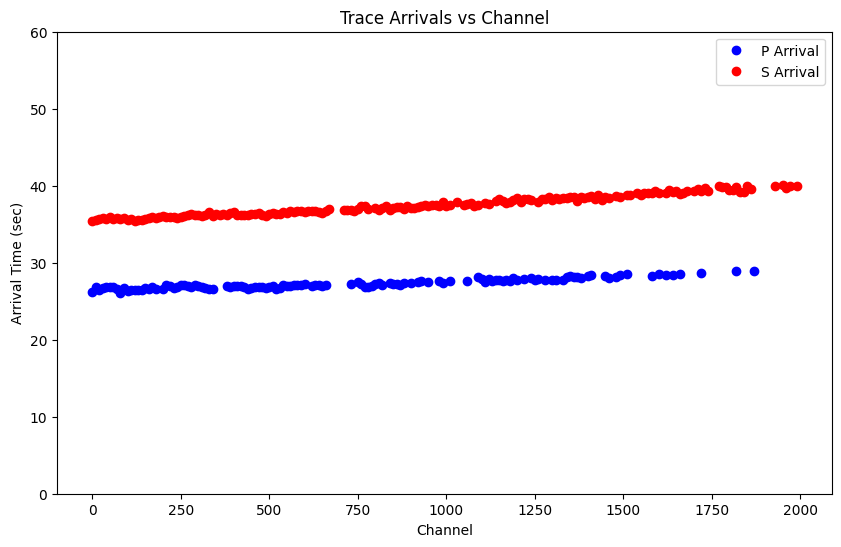

In [791]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

In [792]:
#find min and max das_number for p_dataset and s_dataset
p_dataset_min = p_dataset['das_number'].min()
p_dataset_max = p_dataset['das_number'].max()
s_dataset_min = s_dataset['das_number'].min()
s_dataset_max = s_dataset['das_number'].max()

print(f"p_dataset das_number min: {p_dataset_min}, max: {p_dataset_max}")
print(f"s_dataset das_number min: {s_dataset_min}, max: {s_dataset_max}")

p_dataset das_number min: 0.0, max: 1870.0
s_dataset das_number min: 0.0, max: 1990.0


#### Interpolation 2

In [793]:
#find min and max das_number for p_dataset and s_dataset
p_dataset_min = p_dataset['das_number'].min()
p_dataset_max = p_dataset['das_number'].max()
s_dataset_min = s_dataset['das_number'].min()
s_dataset_max = s_dataset['das_number'].max()

print(f"p_dataset das_number min: {p_dataset_min}, max: {p_dataset_max}")
print(f"s_dataset das_number min: {s_dataset_min}, max: {s_dataset_max}")

p_dataset das_number min: 0.0, max: 1870.0
s_dataset das_number min: 0.0, max: 1990.0


In [794]:
from numpy import arange

new_array = arange(0, 1991, 1)
new_array


array([   0,    1,    2, ..., 1988, 1989, 1990])

In [795]:
# Create a DataFrame with all possible das_number values from new_array
full_range_df = pd.DataFrame({'das_number': new_array})

# Merge with p_dataset and s_dataset to include missing values
p_dataset = full_range_df.merge(p_dataset, on='das_number', how='left')
s_dataset = full_range_df.merge(s_dataset, on='das_number', how='left')

#interpolate again to fill the missing values based on trace_p_arrivaL_sec_interpolated
p_dataset['trace_p_arrival_sec_interpolated2'] = p_dataset['trace_p_arrival_sec_interpolated'].interpolate()
p_dataset

#interpolate again to fill the missing values based on trace_s_arrivaL_sec_interpolated
s_dataset['trace_s_arrival_sec_interpolated2'] = s_dataset['trace_s_arrival_sec_interpolated'].interpolate()
#s_dataset


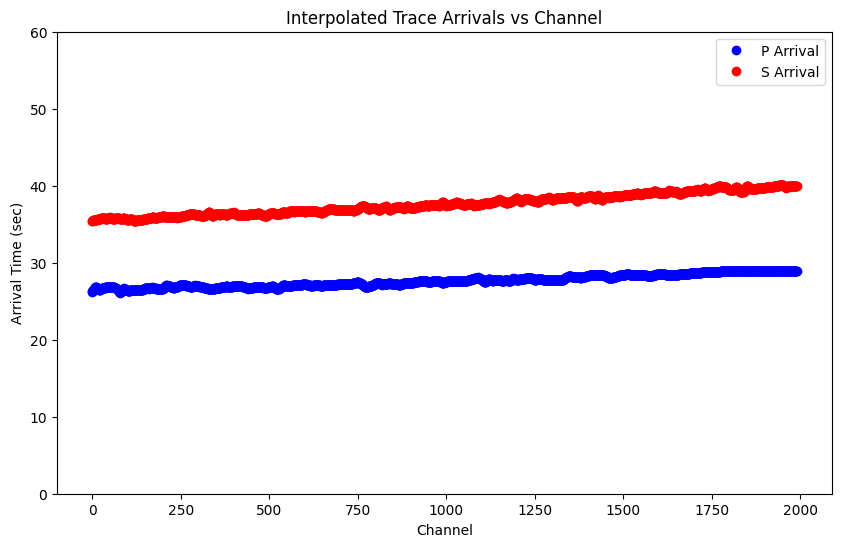

In [796]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated2'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated2'], 'o', color='red', label='S Arrival')

plt.title(f'Interpolated Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

#### File Creation

In [ ]:
#create a 2D numpy array of zeros with dimensions (1500, 8530)
# Create a 2D numpy array of zeros with dimensions (1500, 8530)
#p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25
zeros = np.zeros((1500, 8530))

#convert the trace_p_arrival_sec_interpolated2 column to a numpy array and multiply by 25
p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25

#drop Nan values
p_dataset.dropna(subset=['Sample#', 'das_number'], inplace=True)

#match the sample# column and das_number columns to the zeros array with it (sample#, das_number) and assign 1 values to those points
for index, row in p_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        zeros[sample_number, das_number] = 1

#add 1 values each sample for 250 samples after the sample number for the s-wave 
for index, row in p_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        for i in range(1, 25 * p_arrival_mask + 1):
            if sample_number + i < 1500:
                zeros[sample_number + i, das_number] = 1

#save zeroes
np.save('F:/DAS/'+str(p_arrival_mask)+'/p/p-wave_2023_12_14T13_41_57_200000Z_'+str(p_arrival_mask)+'sec_filled.npy', zeros)

#save zeros as a csv file
#np.savetxt('F:/DAS/p-wave_2023-12-30_22.35.57_UTC.np', zeros, delimiter=',')


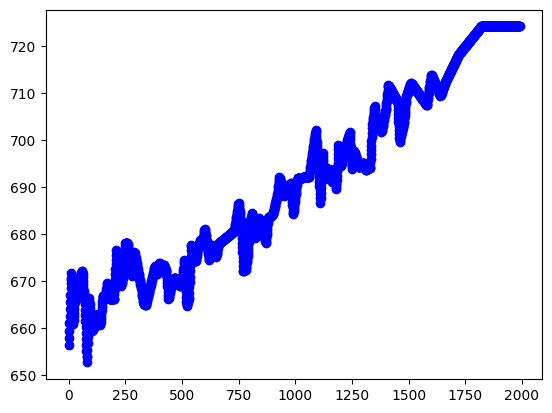

In [798]:
plt.plot(p_dataset['das_number'], p_dataset["Sample#"], 'o', color='blue', label='P Arrival')

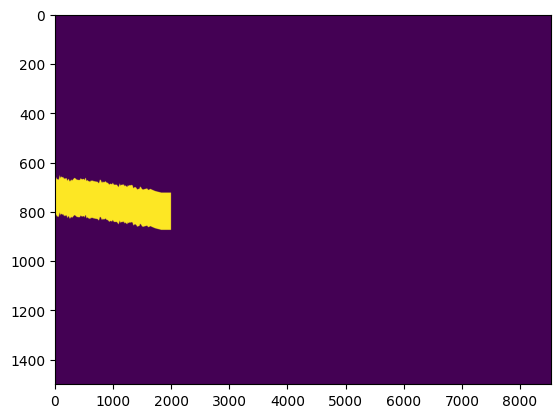

In [799]:
plt.imshow(zeros, aspect='auto')

In [ ]:
#create a 2D numpy array of zeros with dimensions (1500, 8530)
# Create a 2D numpy array of zeros with dimensions (1500, 8530)
#p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25
zeros = np.zeros((1500, 8530))

#convert the trace_p_arrival_sec_interpolated2 column to a numpy array and multiply by 25
s_dataset["Sample#"] = s_dataset['trace_s_arrival_sec_interpolated2']*25

#drop Nan values
s_dataset.dropna(subset=['Sample#', 'das_number'], inplace=True)

#match the sample# column and das_number columns to the zeros array with it (sample#, das_number) and assign 1 values to those points
for index, row in s_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        zeros[sample_number, das_number] = 1

#add 1 values each sample for 250 samples after the sample number for the s-wave 
for index, row in s_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        for i in range(1, 25 * s_arrival_mask + 1):
            if sample_number + i < 1500:
                zeros[sample_number + i, das_number] = 1

#save zeroes
np.save('F:/DAS/'+str(s_arrival_mask)+'/s/s-wave_2023_12_14T13_41_57_200000Z_'+str(s_arrival_mask)+'sec_filled.npy', zeros)

#save zeros as a csv file
#np.savetxt('F:/DAS/p-wave_2023-12-30_22.35.57_UTC.np', zeros, delimiter=',')


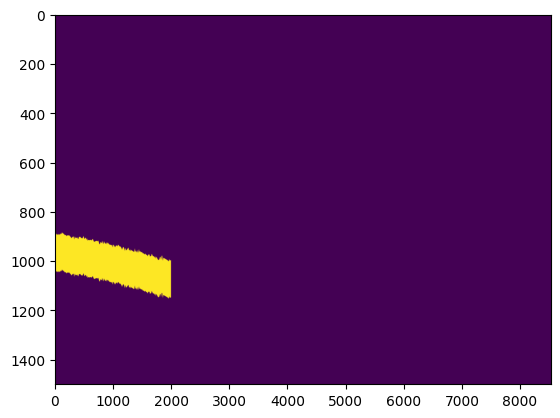

In [801]:
plt.imshow(zeros, aspect='auto')

In [802]:
# #turn previous section into a for loop to iterate through all the unique trace_start_times

# for i in unique_trace_start_times_dropped:
#     if i.strip() == '':
#         print(f"Skipping invalid trace_start_time: '{i}'")
#         continue
    
#     # Define directory and filename
#     # Convert i into a string with format YYYYMMDD_HHMMSS
#     name = str(i).replace(" ", "_").replace(":", "_").replace("-", "_").replace(".", "_")
    
#     directory = "F:/DAS/pick_plots_interpolated_20250401"
#     filename = str(name) + ".png"

#     # Combine directory and filename
#     filepath = os.path.join(directory, filename)

#     # Select the specific row based on the index
#     data = grouped_df_dropped.loc[i]

#     # Select specific columns from the row
#     dropped_dataset = data[['trace_p_arrival_sec', 'trace_s_arrival_sec', 'das_number']]
#     p_dataset = dropped_dataset[['trace_p_arrival_sec','das_number']]
#     s_dataset = dropped_dataset[['trace_s_arrival_sec','das_number']]

#     #drop Nans
#     p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
#     s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)
    
#     #convert das_number column to int
#     p_dataset['das_number'] = p_dataset['das_number'].astype(float)
#     s_dataset['das_number'] = s_dataset['das_number'].astype(float)
#     p_dataset['trace_p_arrival_sec'] = p_dataset['trace_p_arrival_sec'].astype(float)
#     s_dataset['trace_s_arrival_sec'] = s_dataset['trace_s_arrival_sec'].astype(float)

#     # Fit individual polynomials for p_dataset and s_dataset
#     p_coeffs_individual = np.polyfit(p_dataset['das_number'].values, p_dataset['trace_p_arrival_sec'].values, deg=1)
#     s_coeffs_individual = np.polyfit(s_dataset['das_number'].values, s_dataset['trace_s_arrival_sec'].values, deg=1)

#     # # Calculate the trends
#     p_trend_individual = np.polyval(p_coeffs_individual, pd.to_numeric(p_dataset['das_number']))
#     s_trend_individual = np.polyval(s_coeffs_individual, pd.to_numeric(s_dataset['das_number']))

#     #Detrend by subtracting the individual trends
#     p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
#     s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual

#     #calculate 2 standard deviations from the mean for the trace_p_arrival_sec and trace_s_arrival_sec columns
#     p_dataset_mean = p_dataset['trace_p_arrival_sec_detrended'].mean()
#     p_dataset_std = p_dataset['trace_p_arrival_sec_detrended'].std()
#     p_dataset_2std = 2 * p_dataset_std

#     # do it for s_dataset
#     s_dataset_mean = s_dataset['trace_s_arrival_sec_detrended'].mean()
#     s_dataset_std = s_dataset['trace_s_arrival_sec_detrended'].std()
#     s_dataset_2std = 2 * s_dataset_std
    
#     #save values for index which are greater than 2 standard deviations from the mean for the trace_p_arrival_sec column
#     p_dataset_outliers = p_dataset[(p_dataset['trace_p_arrival_sec_detrended'].values > p_dataset_2std) | 
#                                    (p_dataset['trace_p_arrival_sec_detrended'].values < -p_dataset_2std)]

#     #replace p_dataset trace_p_arrival_sec and trace_p_arrival_sec_detrended with Nans for the das_number values that occur in p_dataset_outliers
#     p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec'] = np.nan
#     p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec_detrended'] = np.nan

#     # Save values for index which are greater than 2 standard deviations from the mean for the trace_s_arrival_sec column
#     s_dataset_outliers = s_dataset[(s_dataset['trace_s_arrival_sec_detrended'].values > s_dataset_2std) | 
#                                    (s_dataset['trace_s_arrival_sec_detrended'].values < -s_dataset_2std)]

#     # Replace s_dataset trace_s_arrival_sec and trace_s_arrival_sec_detrended with NaNs for the das_number values that occur in s_dataset_outliers
#     s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec'] = np.nan
#     s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec_detrended'] = np.nan

#     #interpolate the missing values from the p_outliers and s_outliers dataframes using the interpolate function
#     p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
#     s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()

#     new_array = arange(1, 10000, 1)

#     # Create a DataFrame with all possible das_number values from new_array
#     full_range_df = pd.DataFrame({'das_number': new_array})

#     # Merge with p_dataset and s_dataset to include missing values
#     p_dataset = full_range_df.merge(p_dataset, on='das_number', how='left')
#     s_dataset = full_range_df.merge(s_dataset, on='das_number', how='left')

#     #interpolate again to fill the missing values based on trace_p_arrivaL_sec_interpolated
#     p_dataset['trace_p_arrival_sec_interpolated2'] = p_dataset['trace_p_arrival_sec_interpolated'].interpolate()

#     #interpolate again to fill the missing values based on trace_s_arrivaL_sec_interpolated
#     s_dataset['trace_s_arrival_sec_interpolated2'] = s_dataset['trace_s_arrival_sec_interpolated'].interpolate()

#     # Plot the interpolated values
#     plt.figure(figsize=(10, 6))
  
#     plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated2'], 'o', color='blue', label='P Arrival')
#     plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated2'], 'o', color='red', label='S Arrival')

#     plt.title(f'Interpolated Trace Arrivals vs Channel for {i}')
#     plt.xlabel('Channel')
#     plt.ylabel('Arrival Time (sec)')
#     plt.ylim(0, 60)
#     plt.legend()

#     # Set the number of ticks to 5
#     plt.gca().xaxis.set_major_locator(MaxNLocator(5))
#     plt.savefig(filepath)
#     plt.close()

### 2023_12_15T09_53_57_200000Z

#### Background

In [803]:
# Select the specific row based on the index
data_2023_12_30 = grouped_df_dropped.loc['2023-12-15T09:53:57.200000Z']

# Select specific columns from the row
dropped_dataset = data_2023_12_30[['trace_p_arrival_sec', 'trace_s_arrival_sec', 'das_number']]
p_dataset = dropped_dataset[['trace_p_arrival_sec','das_number']]
s_dataset = dropped_dataset[['trace_s_arrival_sec','das_number']]


In [804]:
p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)

C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\751016926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\751016926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)


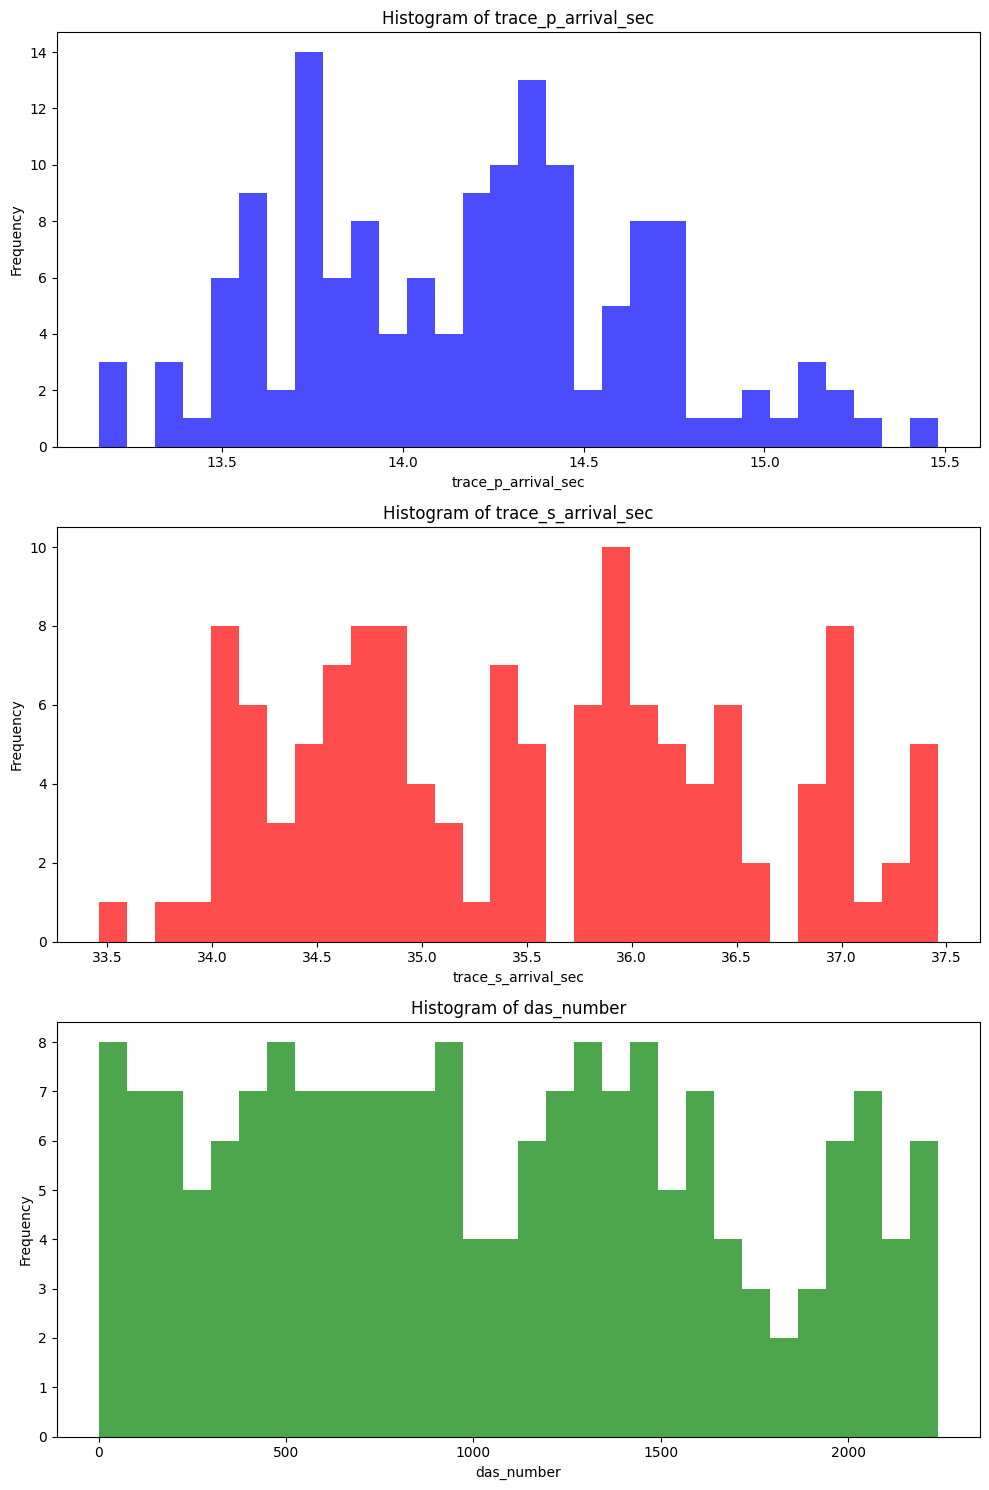

In [805]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(dropped_dataset['trace_p_arrival_sec'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(dropped_dataset['trace_s_arrival_sec'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')

# Histogram for das_number
axes[2].hist(pd.to_numeric(dropped_dataset['das_number'], errors='coerce').dropna(), bins=30, color='green', alpha=0.7)
axes[2].set_title('Histogram of das_number')
axes[2].set_xlabel('das_number')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

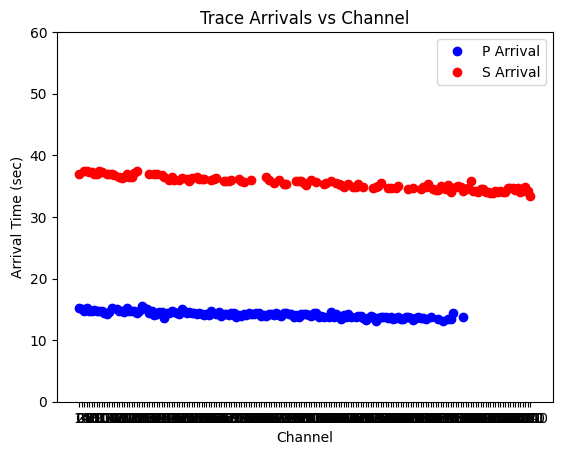

In [806]:
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

In [807]:
p_dataset
#convert das_number column to int
p_dataset['das_number'] = p_dataset['das_number'].astype(float)
s_dataset['das_number'] = s_dataset['das_number'].astype(float)
p_dataset['trace_p_arrival_sec'] = p_dataset['trace_p_arrival_sec'].astype(float)
s_dataset['trace_s_arrival_sec'] = s_dataset['trace_s_arrival_sec'].astype(float)



C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['das_number'] = p_dataset['das_number'].astype(float)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['das_number'] = s_dataset['das_number'].astype(float)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [808]:

#is there nans in p_dataset["trace_[arrival_sec"]"]
p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
print(p_dataset["trace_p_arrival_sec"].isna())


42       False
137      False
232      False
327      False
422      False
         ...  
15622    False
16097    False
16192    False
16287    False
17142    False
Name: trace_p_arrival_sec, Length: 143, dtype: bool


C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\620326073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)


In [809]:
print(p_dataset["das_number"].dtype)
print(p_dataset["trace_p_arrival_sec"].dtype)
print(s_dataset["das_number"].dtype)
print(s_dataset["trace_s_arrival_sec"].dtype)


float64
float64
float64
float64


In [810]:
print(p_dataset["das_number"].values)
print(p_dataset["trace_p_arrival_sec"].values)
print(s_dataset["das_number"].values)
print(s_dataset["trace_s_arrival_sec"].values)


[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.
  120.  130.  160.  170.  180.  190.  200.  210.  220.  230.  240.  250.
  280.  290.  300.  310.  320.  350.  360.  370.  380.  390.  400.  410.
  420.  430.  440.  450.  460.  470.  480.  490.  500.  510.  520.  530.
  540.  550.  560.  570.  580.  600.  620.  630.  640.  650.  660.  670.
  680.  690.  700.  710.  720.  730.  740.  760.  770.  780.  790.  800.
  810.  820.  830.  840.  850.  860.  870.  880.  890.  900.  910.  920.
  930.  940.  950.  960.  970.  980.  990. 1000. 1020. 1080. 1090. 1100.
 1110. 1150. 1160. 1170. 1180. 1190. 1200. 1210. 1220. 1230. 1240. 1260.
 1270. 1280. 1290. 1300. 1310. 1320. 1330. 1340. 1350. 1360. 1370. 1380.
 1390. 1400. 1410. 1420. 1430. 1440. 1450. 1460. 1470. 1480. 1490. 1500.
 1510. 1530. 1540. 1560. 1590. 1620. 1640. 1690. 1700. 1710. 1800.]
[15.28999996 15.04999995 14.69000006 15.13999987 14.65999985 14.77999997
 14.90999985 14.77999997 14.64999986 14.79999995 14.4099

In [811]:
import numpy as np
import matplotlib.pyplot as plt

# Fit individual polynomials for p_dataset and s_dataset
p_coeffs_individual = np.polyfit(p_dataset['das_number'].values, p_dataset['trace_p_arrival_sec'].values, deg=1)
s_coeffs_individual = np.polyfit(s_dataset['das_number'].values, s_dataset['trace_s_arrival_sec'].values, deg=1)

# # Calculate the trends
p_trend_individual = np.polyval(p_coeffs_individual, pd.to_numeric(p_dataset['das_number']))
s_trend_individual = np.polyval(s_coeffs_individual, pd.to_numeric(s_dataset['das_number']))

# # Detrend by subtracting the individual trends
p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual



C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\25613787.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\25613787.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual


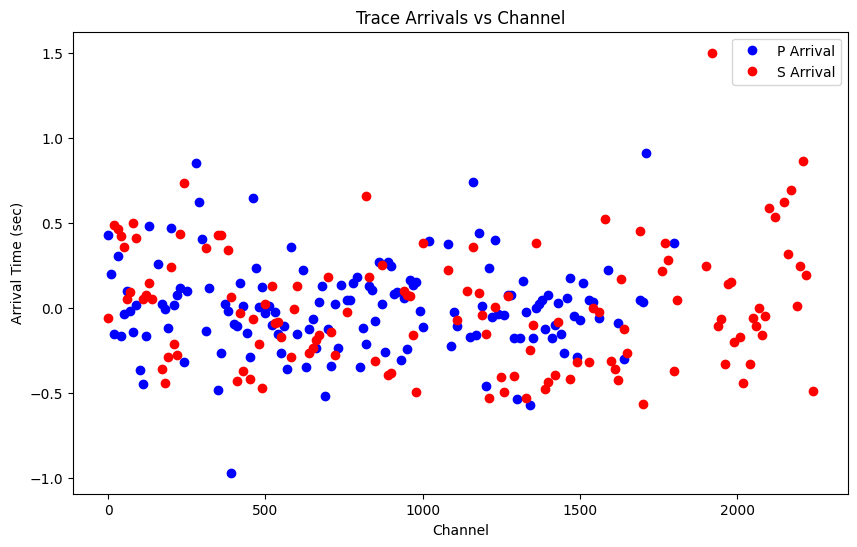

In [812]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_detrended'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_detrended'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.legend()
# Set the number of ticks to 5
plt.gca().xaxis.set_major_locator(MaxNLocator(5))

Text(0, 0.5, 'Frequency')

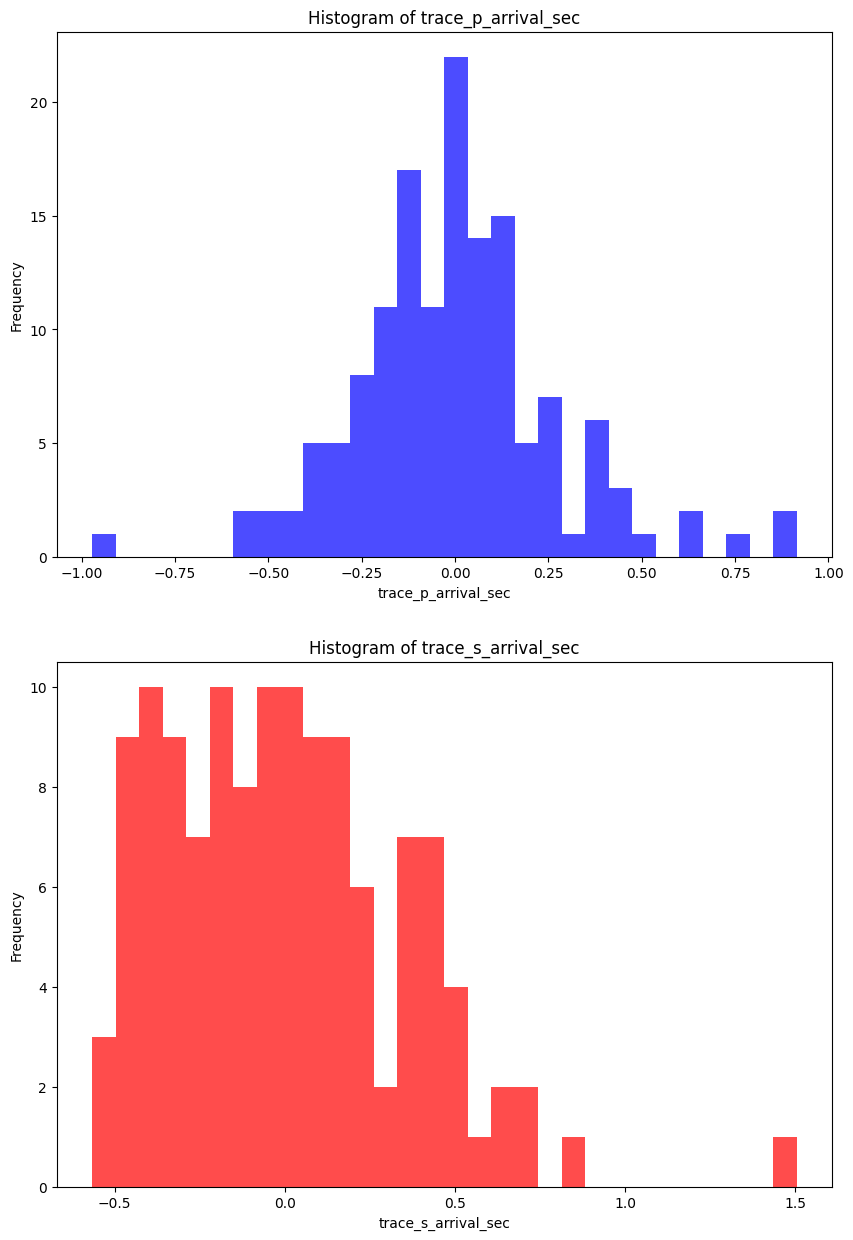

In [813]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(p_dataset['trace_p_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(s_dataset['trace_s_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')


In [814]:
#calculate 2 standard deviations from the mean for the trace_p_arrival_sec and trace_s_arrival_sec columns
p_dataset_mean = p_dataset['trace_p_arrival_sec_detrended'].mean()
p_dataset_std = p_dataset['trace_p_arrival_sec_detrended'].std()
p_dataset_2std = 2 * p_dataset_std

print(p_dataset_mean)
print(p_dataset_std)
print(p_dataset_2std)



7.353868873601037e-15
0.2703689617582735
0.540737923516547


In [815]:
# do it for s_dataset
s_dataset_mean = s_dataset['trace_s_arrival_sec_detrended'].mean()
s_dataset_std = s_dataset['trace_s_arrival_sec_detrended'].std()
s_dataset_2std = 2 * s_dataset_std

print(s_dataset_mean)
print(s_dataset_std)
print(s_dataset_2std)

2.2938781233200083e-15
0.35267310916495526
0.7053462183299105


In [816]:
#save values for index which are greater than 2 standard deviations from the mean for the trace_p_arrival_sec column
p_dataset_outliers = p_dataset[(p_dataset['trace_p_arrival_sec_detrended'].values > p_dataset_2std) | 
                               (p_dataset['trace_p_arrival_sec_detrended'].values < -p_dataset_2std)]

p_dataset_outliers

#replace p_dataset trace_p_arrival_sec and trace_p_arrival_sec_detrended with Nans for the das_number values that occur in p_dataset_outliers
p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec'] = np.nan
p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec_detrended'] = np.nan


#find the columns that are Nans
p_dataset[p_dataset['trace_p_arrival_sec'].isna()]

trace_p_arrival_sec  das_number  trace_p_arrival_sec_detrended
2702                   NaN       280.0                            NaN
2797                   NaN       290.0                            NaN
3747                   NaN       390.0                            NaN
4412                   NaN       460.0                            NaN
11062                  NaN      1160.0                            NaN
12772                  NaN      1340.0                            NaN
16287                  NaN      1710.0                            NaN

In [817]:
# Save values for index which are greater than 2 standard deviations from the mean for the trace_s_arrival_sec column
s_dataset_outliers = s_dataset[(s_dataset['trace_s_arrival_sec_detrended'].values > s_dataset_2std) | 
                               (s_dataset['trace_s_arrival_sec_detrended'].values < -s_dataset_2std)]

s_dataset_outliers

# Replace s_dataset trace_s_arrival_sec and trace_s_arrival_sec_detrended with NaNs for the das_number values that occur in s_dataset_outliers
s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec'] = np.nan
s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec_detrended'] = np.nan

# Find the columns that are NaNs
s_dataset[s_dataset['trace_s_arrival_sec'].isna()]


trace_s_arrival_sec  das_number  trace_s_arrival_sec_detrended
2322                   NaN       240.0                            NaN
18282                  NaN      1920.0                            NaN
21037                  NaN      2210.0                            NaN

Text(0, 0.5, 'Frequency')

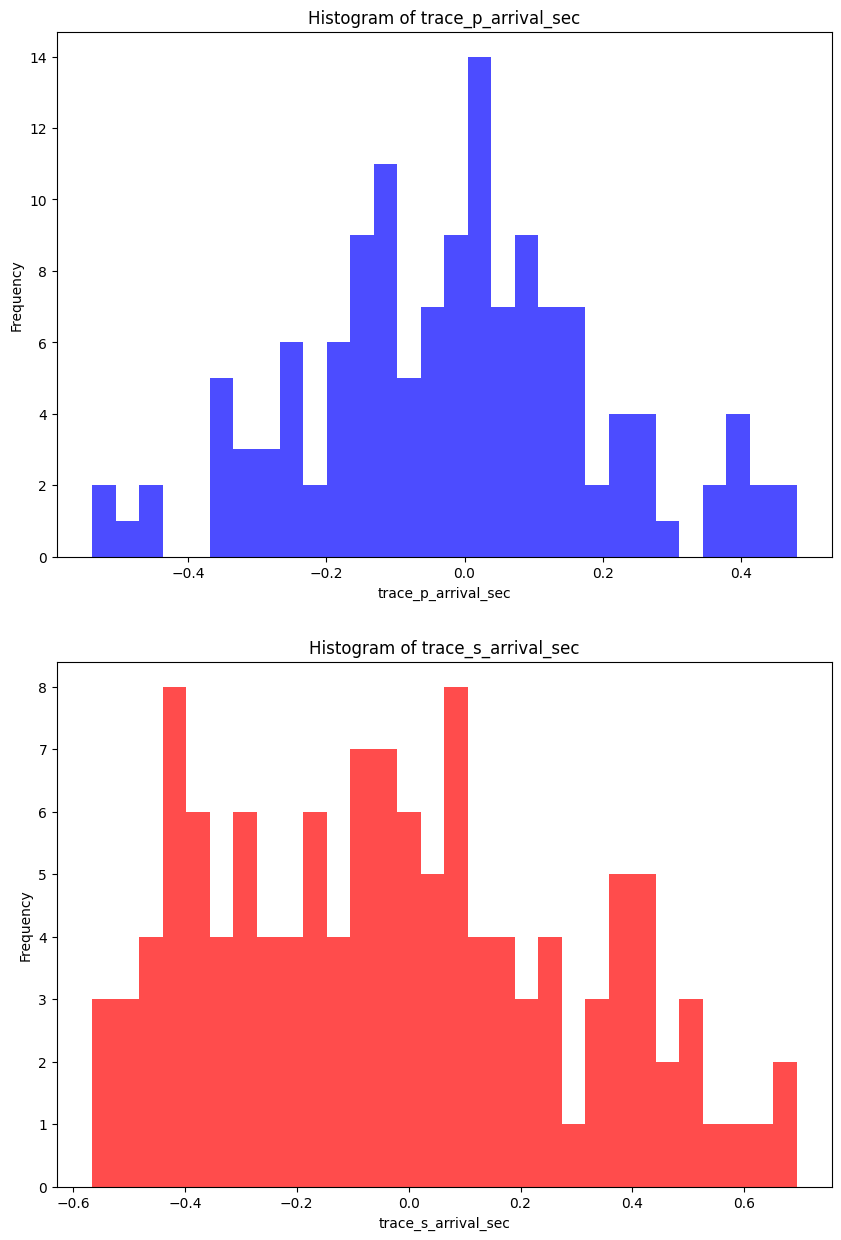

In [818]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(p_dataset['trace_p_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(s_dataset['trace_s_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')

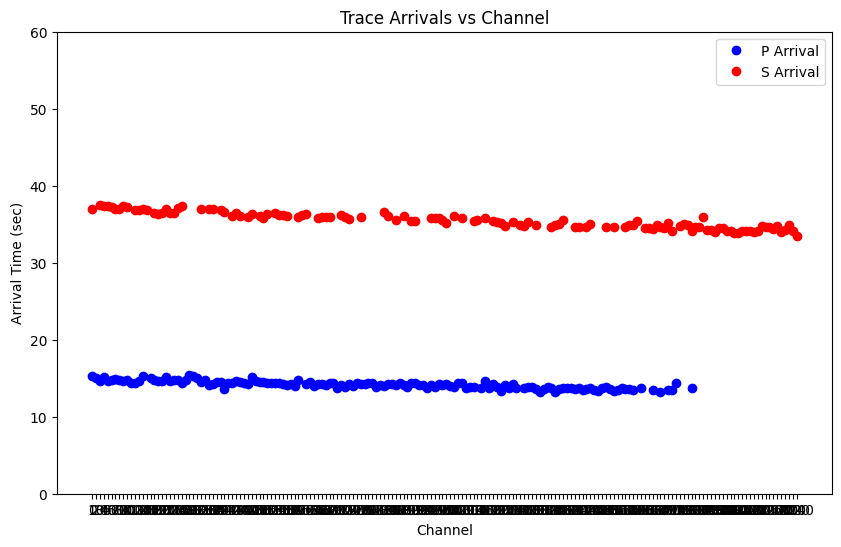

In [819]:
#original
plt.figure(figsize=(10, 6))


plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

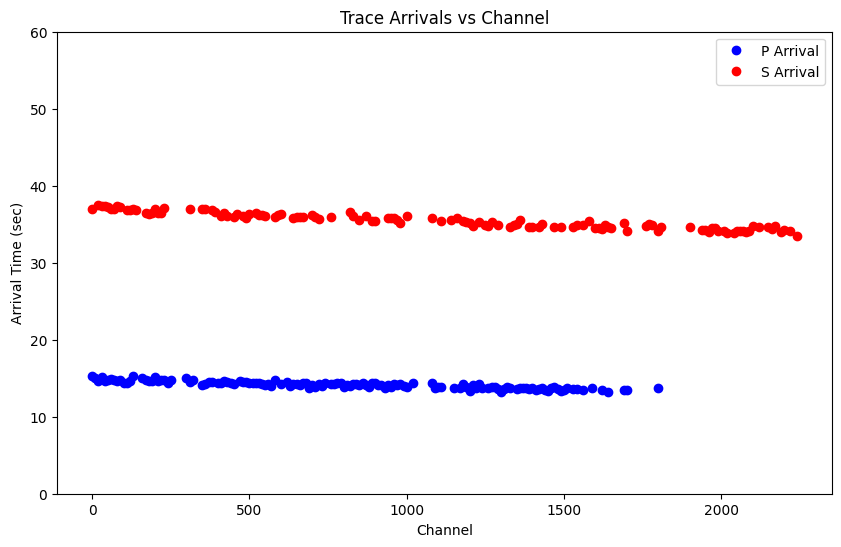

In [820]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

In [821]:
#interpolate the missing values from the p_outliers and s_outliers dataframes using the interpolate function
p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()

s_dataset


C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\3394753993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\3394753993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()


trace_s_arrival_sec  das_number  trace_s_arrival_sec_detrended  \
42               36.939999         0.0                      -0.059037   
232              37.459999        20.0                       0.488177   
327              37.419998        30.0                       0.461783   
422              37.369999        40.0                       0.425391   
517              37.290001        50.0                       0.359000   
...                    ...         ...                            ...   
20847            34.029999      2190.0                       0.010890   
20942            34.250000      2200.0                       0.244498   
21037                  NaN      2210.0                            NaN   
21132            34.169998      2220.0                       0.191709   
21322            33.459999      2240.0                      -0.491076   

       trace_s_arrival_sec_interpolated  
42                            36.939999  
232                           37.459999  
327                           37.419998  
422                           37.369999  
517                           37.290001  
...                                 ...  
20847                         34.029999  
20942                         34.250000  
21037                         34.209999  
21132                         34.169998  
21322                         33.459999  

[127 rows x 4 columns]

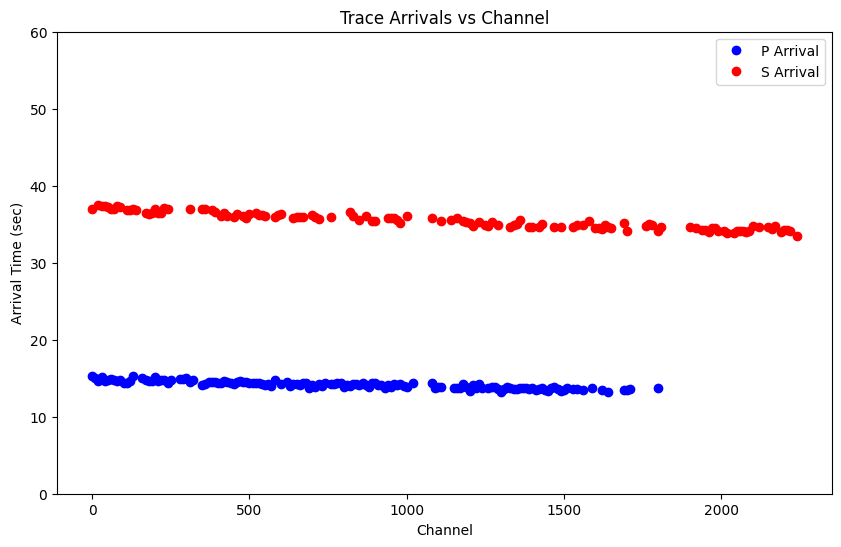

In [822]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

#### Interpolation 2

In [823]:
#find min and max das_number for p_dataset and s_dataset
p_dataset_min = p_dataset['das_number'].min()
p_dataset_max = p_dataset['das_number'].max()
s_dataset_min = s_dataset['das_number'].min()
s_dataset_max = s_dataset['das_number'].max()

print(f"p_dataset das_number min: {p_dataset_min}, max: {p_dataset_max}")
print(f"s_dataset das_number min: {s_dataset_min}, max: {s_dataset_max}")

p_dataset das_number min: 0.0, max: 1800.0
s_dataset das_number min: 0.0, max: 2240.0


In [824]:
from numpy import arange

new_array = arange(0, 1801, 1)
new_array


array([   0,    1,    2, ..., 1798, 1799, 1800])

In [825]:
# Create a DataFrame with all possible das_number values from new_array
full_range_df = pd.DataFrame({'das_number': new_array})

# Merge with p_dataset and s_dataset to include missing values
p_dataset = full_range_df.merge(p_dataset, on='das_number', how='left')
s_dataset = full_range_df.merge(s_dataset, on='das_number', how='left')

#interpolate again to fill the missing values based on trace_p_arrivaL_sec_interpolated
p_dataset['trace_p_arrival_sec_interpolated2'] = p_dataset['trace_p_arrival_sec_interpolated'].interpolate()
p_dataset

#interpolate again to fill the missing values based on trace_s_arrivaL_sec_interpolated
s_dataset['trace_s_arrival_sec_interpolated2'] = s_dataset['trace_s_arrival_sec_interpolated'].interpolate()
#s_dataset


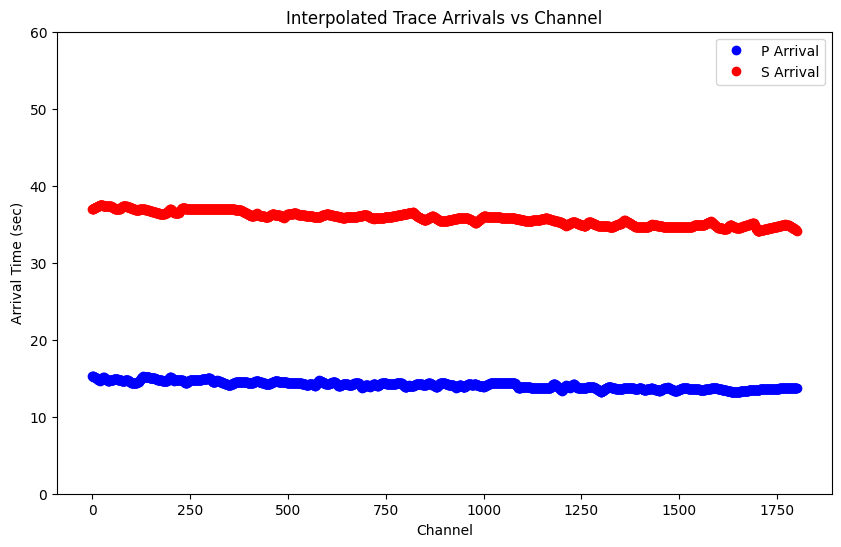

In [826]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated2'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated2'], 'o', color='red', label='S Arrival')

plt.title(f'Interpolated Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

#### File Creation:

In [827]:
#create a 2D numpy array of zeros with dimensions (1500, 8530)
# Create a 2D numpy array of zeros with dimensions (1500, 8530)
#p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25
zeros = np.zeros((1500, 8530))

#convert the trace_p_arrival_sec_interpolated2 column to a numpy array and multiply by 25
p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25

#drop Nan values
p_dataset.dropna(subset=['Sample#', 'das_number'], inplace=True)

#match the sample# column and das_number columns to the zeros array with it (sample#, das_number) and assign 1 values to those points
for index, row in p_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        zeros[sample_number, das_number] = 1

#add 1 values each sample for 250 samples after the sample number for the s-wave 
for index, row in p_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        for i in range(1, 25 * p_arrival_mask + 1):
            if sample_number + i < 1500:
                zeros[sample_number + i, das_number] = 1        

#save zeroes
np.save('F:/DAS/'+str(p_arrival_mask)+'/p/p-wave_2023_12_15T09_53_57_200000Z_'+str(p_arrival_mask)+'sec_filled.npy', zeros)

#save zeros as a csv file
#np.savetxt('F:/DAS/p-wave_2023-12-30_22.35.57_UTC.np', zeros, delimiter=',')


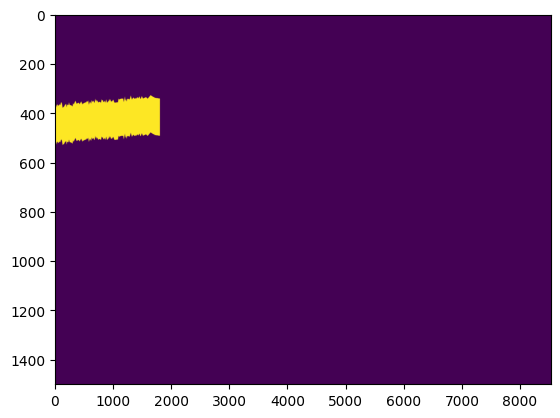

In [828]:
plt.imshow(zeros, aspect='auto')

In [829]:
#create a 2D numpy array of zeros with dimensions (1500, 8530)
# Create a 2D numpy array of zeros with dimensions (1500, 8530)
#p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25
zeros = np.zeros((1500, 8530))

#convert the trace_p_arrival_sec_interpolated2 column to a numpy array and multiply by 25
s_dataset["Sample#"] = s_dataset['trace_s_arrival_sec_interpolated2']*25

#drop Nan values
s_dataset.dropna(subset=['Sample#', 'das_number'], inplace=True)

#match the sample# column and das_number columns to the zeros array with it (sample#, das_number) and assign 1 values to those points
for index, row in s_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        zeros[sample_number, das_number] = 1

#add 1 values each sample for 250 samples after the sample number for the s-wave 
for index, row in s_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        for i in range(1, 25 * s_arrival_mask + 1):
            if sample_number + i < 1500:
                zeros[sample_number + i, das_number] = 1
#save zeroes
np.save('F:/DAS/'+str(s_arrival_mask)+'/s/s-wave_2023_12_15T09_53_57_200000Z_'+str(s_arrival_mask)+'sec_filled.npy', zeros)

#save zeros as a csv file
#np.savetxt('F:/DAS/p-wave_2023-12-30_22.35.57_UTC.np', zeros, delimiter=',')


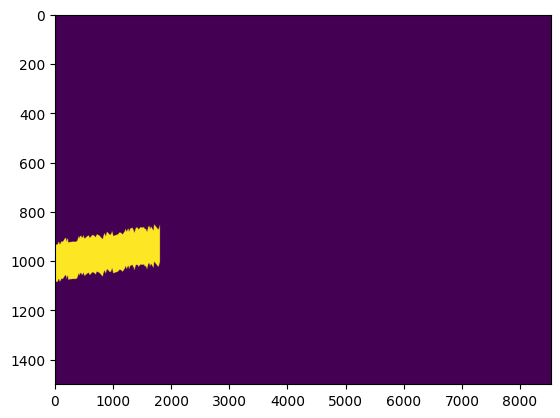

In [830]:
plt.imshow(zeros, aspect='auto')

In [831]:
# #turn previous section into a for loop to iterate through all the unique trace_start_times

# for i in unique_trace_start_times_dropped:
#     if i.strip() == '':
#         print(f"Skipping invalid trace_start_time: '{i}'")
#         continue
    
#     # Define directory and filename
#     # Convert i into a string with format YYYYMMDD_HHMMSS
#     name = str(i).replace(" ", "_").replace(":", "_").replace("-", "_").replace(".", "_")
    
#     directory = "F:/DAS/pick_plots_interpolated_20250401"
#     filename = str(name) + ".png"

#     # Combine directory and filename
#     filepath = os.path.join(directory, filename)

#     # Select the specific row based on the index
#     data = grouped_df_dropped.loc[i]

#     # Select specific columns from the row
#     dropped_dataset = data[['trace_p_arrival_sec', 'trace_s_arrival_sec', 'das_number']]
#     p_dataset = dropped_dataset[['trace_p_arrival_sec','das_number']]
#     s_dataset = dropped_dataset[['trace_s_arrival_sec','das_number']]

#     #drop Nans
#     p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
#     s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)
    
#     #convert das_number column to int
#     p_dataset['das_number'] = p_dataset['das_number'].astype(float)
#     s_dataset['das_number'] = s_dataset['das_number'].astype(float)
#     p_dataset['trace_p_arrival_sec'] = p_dataset['trace_p_arrival_sec'].astype(float)
#     s_dataset['trace_s_arrival_sec'] = s_dataset['trace_s_arrival_sec'].astype(float)

#     # Fit individual polynomials for p_dataset and s_dataset
#     p_coeffs_individual = np.polyfit(p_dataset['das_number'].values, p_dataset['trace_p_arrival_sec'].values, deg=1)
#     s_coeffs_individual = np.polyfit(s_dataset['das_number'].values, s_dataset['trace_s_arrival_sec'].values, deg=1)

#     # # Calculate the trends
#     p_trend_individual = np.polyval(p_coeffs_individual, pd.to_numeric(p_dataset['das_number']))
#     s_trend_individual = np.polyval(s_coeffs_individual, pd.to_numeric(s_dataset['das_number']))

#     #Detrend by subtracting the individual trends
#     p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
#     s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual

#     #calculate 2 standard deviations from the mean for the trace_p_arrival_sec and trace_s_arrival_sec columns
#     p_dataset_mean = p_dataset['trace_p_arrival_sec_detrended'].mean()
#     p_dataset_std = p_dataset['trace_p_arrival_sec_detrended'].std()
#     p_dataset_2std = 2 * p_dataset_std

#     # do it for s_dataset
#     s_dataset_mean = s_dataset['trace_s_arrival_sec_detrended'].mean()
#     s_dataset_std = s_dataset['trace_s_arrival_sec_detrended'].std()
#     s_dataset_2std = 2 * s_dataset_std
    
#     #save values for index which are greater than 2 standard deviations from the mean for the trace_p_arrival_sec column
#     p_dataset_outliers = p_dataset[(p_dataset['trace_p_arrival_sec_detrended'].values > p_dataset_2std) | 
#                                    (p_dataset['trace_p_arrival_sec_detrended'].values < -p_dataset_2std)]

#     #replace p_dataset trace_p_arrival_sec and trace_p_arrival_sec_detrended with Nans for the das_number values that occur in p_dataset_outliers
#     p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec'] = np.nan
#     p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec_detrended'] = np.nan

#     # Save values for index which are greater than 2 standard deviations from the mean for the trace_s_arrival_sec column
#     s_dataset_outliers = s_dataset[(s_dataset['trace_s_arrival_sec_detrended'].values > s_dataset_2std) | 
#                                    (s_dataset['trace_s_arrival_sec_detrended'].values < -s_dataset_2std)]

#     # Replace s_dataset trace_s_arrival_sec and trace_s_arrival_sec_detrended with NaNs for the das_number values that occur in s_dataset_outliers
#     s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec'] = np.nan
#     s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec_detrended'] = np.nan

#     #interpolate the missing values from the p_outliers and s_outliers dataframes using the interpolate function
#     p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
#     s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()

#     new_array = arange(1, 10000, 1)

#     # Create a DataFrame with all possible das_number values from new_array
#     full_range_df = pd.DataFrame({'das_number': new_array})

#     # Merge with p_dataset and s_dataset to include missing values
#     p_dataset = full_range_df.merge(p_dataset, on='das_number', how='left')
#     s_dataset = full_range_df.merge(s_dataset, on='das_number', how='left')

#     #interpolate again to fill the missing values based on trace_p_arrivaL_sec_interpolated
#     p_dataset['trace_p_arrival_sec_interpolated2'] = p_dataset['trace_p_arrival_sec_interpolated'].interpolate()

#     #interpolate again to fill the missing values based on trace_s_arrivaL_sec_interpolated
#     s_dataset['trace_s_arrival_sec_interpolated2'] = s_dataset['trace_s_arrival_sec_interpolated'].interpolate()

#     # Plot the interpolated values
#     plt.figure(figsize=(10, 6))
  
#     plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated2'], 'o', color='blue', label='P Arrival')
#     plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated2'], 'o', color='red', label='S Arrival')

#     plt.title(f'Interpolated Trace Arrivals vs Channel for {i}')
#     plt.xlabel('Channel')
#     plt.ylabel('Arrival Time (sec)')
#     plt.ylim(0, 60)
#     plt.legend()

#     # Set the number of ticks to 5
#     plt.gca().xaxis.set_major_locator(MaxNLocator(5))
#     plt.savefig(filepath)
#     plt.close()

### 2023_12_16T19_24_56_880000Z

#### Background

In [832]:
# Select the specific row based on the index
data_2023_12_30 = grouped_df_dropped.loc['2023-12-16T19:24:56.880000Z']

# Select specific columns from the row
dropped_dataset = data_2023_12_30[['trace_p_arrival_sec', 'trace_s_arrival_sec', 'das_number']]
p_dataset = dropped_dataset[['trace_p_arrival_sec','das_number']]
s_dataset = dropped_dataset[['trace_s_arrival_sec','das_number']]


In [833]:
p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)

C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\751016926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\751016926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)


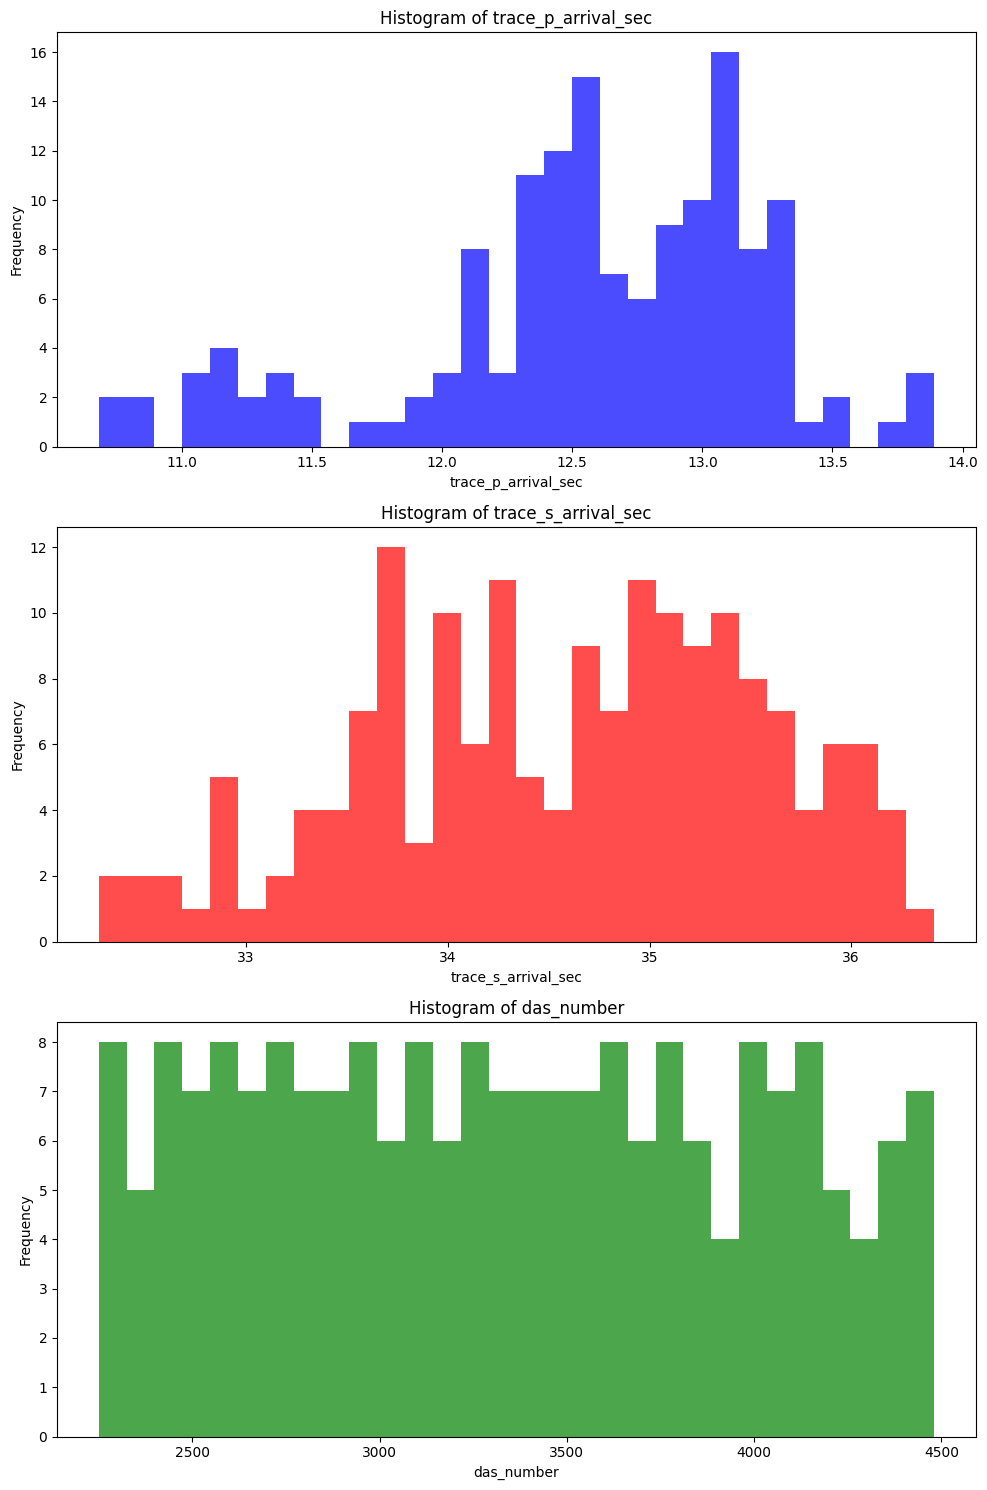

In [834]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(dropped_dataset['trace_p_arrival_sec'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(dropped_dataset['trace_s_arrival_sec'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')

# Histogram for das_number
axes[2].hist(pd.to_numeric(dropped_dataset['das_number'], errors='coerce').dropna(), bins=30, color='green', alpha=0.7)
axes[2].set_title('Histogram of das_number')
axes[2].set_xlabel('das_number')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

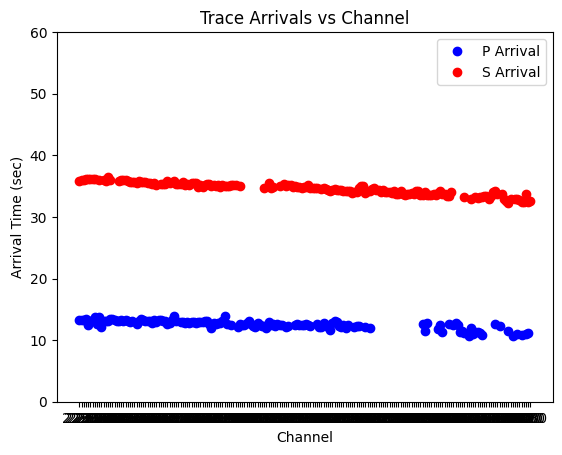

In [835]:
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

In [836]:
p_dataset
#convert das_number column to int
p_dataset['das_number'] = p_dataset['das_number'].astype(float)
s_dataset['das_number'] = s_dataset['das_number'].astype(float)
p_dataset['trace_p_arrival_sec'] = p_dataset['trace_p_arrival_sec'].astype(float)
s_dataset['trace_s_arrival_sec'] = s_dataset['trace_s_arrival_sec'].astype(float)



C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['das_number'] = p_dataset['das_number'].astype(float)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['das_number'] = s_dataset['das_number'].astype(float)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [837]:

#is there nans in p_dataset["trace_[arrival_sec"]"]
p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
print(p_dataset["trace_p_arrival_sec"].isna())


21408    False
21503    False
21598    False
21693    False
21788    False
         ...  
41643    False
41928    False
42118    False
42308    False
42498    False
Name: trace_p_arrival_sec, Length: 147, dtype: bool


C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\620326073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)


In [838]:
print(p_dataset["das_number"].dtype)
print(p_dataset["trace_p_arrival_sec"].dtype)
print(s_dataset["das_number"].dtype)
print(s_dataset["trace_s_arrival_sec"].dtype)


float64
float64
float64
float64


In [839]:
print(p_dataset["das_number"].values)
print(p_dataset["trace_p_arrival_sec"].values)
print(s_dataset["das_number"].values)
print(s_dataset["trace_s_arrival_sec"].values)


[2250. 2260. 2270. 2280. 2290. 2300. 2310. 2320. 2340. 2350. 2360. 2370.
 2380. 2400. 2410. 2420. 2430. 2440. 2450. 2460. 2470. 2480. 2490. 2500.
 2510. 2530. 2540. 2550. 2560. 2570. 2580. 2590. 2600. 2610. 2620. 2630.
 2640. 2650. 2660. 2670. 2680. 2690. 2700. 2710. 2730. 2740. 2750. 2760.
 2770. 2780. 2790. 2800. 2810. 2820. 2830. 2840. 2850. 2860. 2870. 2880.
 2890. 2900. 2910. 2920. 2930. 2940. 2960. 2990. 3000. 3010. 3020. 3030.
 3050. 3060. 3070. 3080. 3090. 3100. 3110. 3120. 3130. 3140. 3150. 3160.
 3180. 3190. 3200. 3210. 3230. 3240. 3270. 3280. 3290. 3300. 3310. 3320.
 3330. 3340. 3370. 3380. 3390. 3400. 3410. 3420. 3430. 3440. 3450. 3460.
 3480. 3490. 3500. 3510. 3520. 3550. 3560. 3570. 3600. 3620. 3880. 3890.
 3910. 3980. 3990. 4000. 4030. 4050. 4060. 4070. 4080. 4090. 4100. 4110.
 4120. 4130. 4140. 4150. 4160. 4170. 4180. 4260. 4290. 4360. 4380. 4410.
 4430. 4450. 4470.]
[13.28999996 13.19999981 13.27999997 13.44999981 12.41999984 13.13999987
 13.28999996 13.77999997 12.579

In [840]:
import numpy as np
import matplotlib.pyplot as plt

# Fit individual polynomials for p_dataset and s_dataset
p_coeffs_individual = np.polyfit(p_dataset['das_number'].values, p_dataset['trace_p_arrival_sec'].values, deg=1)
s_coeffs_individual = np.polyfit(s_dataset['das_number'].values, s_dataset['trace_s_arrival_sec'].values, deg=1)

# # Calculate the trends
p_trend_individual = np.polyval(p_coeffs_individual, pd.to_numeric(p_dataset['das_number']))
s_trend_individual = np.polyval(s_coeffs_individual, pd.to_numeric(s_dataset['das_number']))

# # Detrend by subtracting the individual trends
p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual



C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\25613787.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\25613787.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual


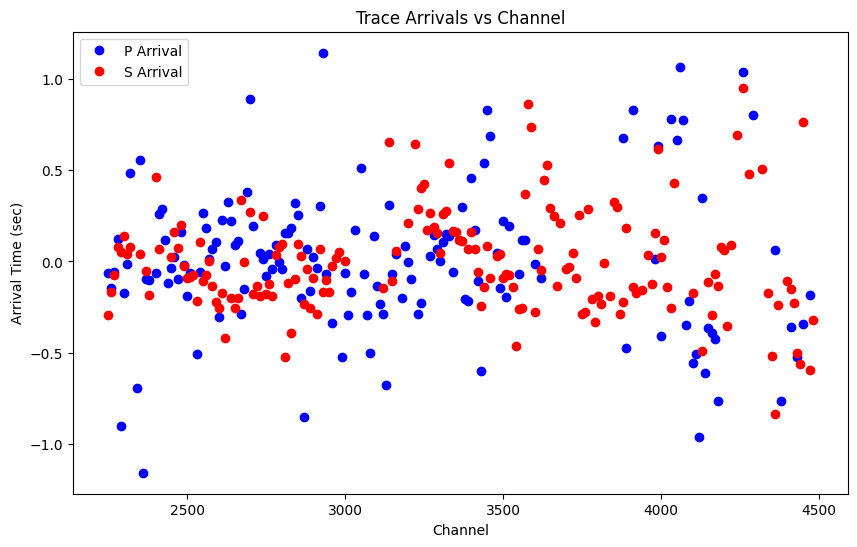

In [841]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_detrended'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_detrended'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.legend()
# Set the number of ticks to 5
plt.gca().xaxis.set_major_locator(MaxNLocator(5))

Text(0, 0.5, 'Frequency')

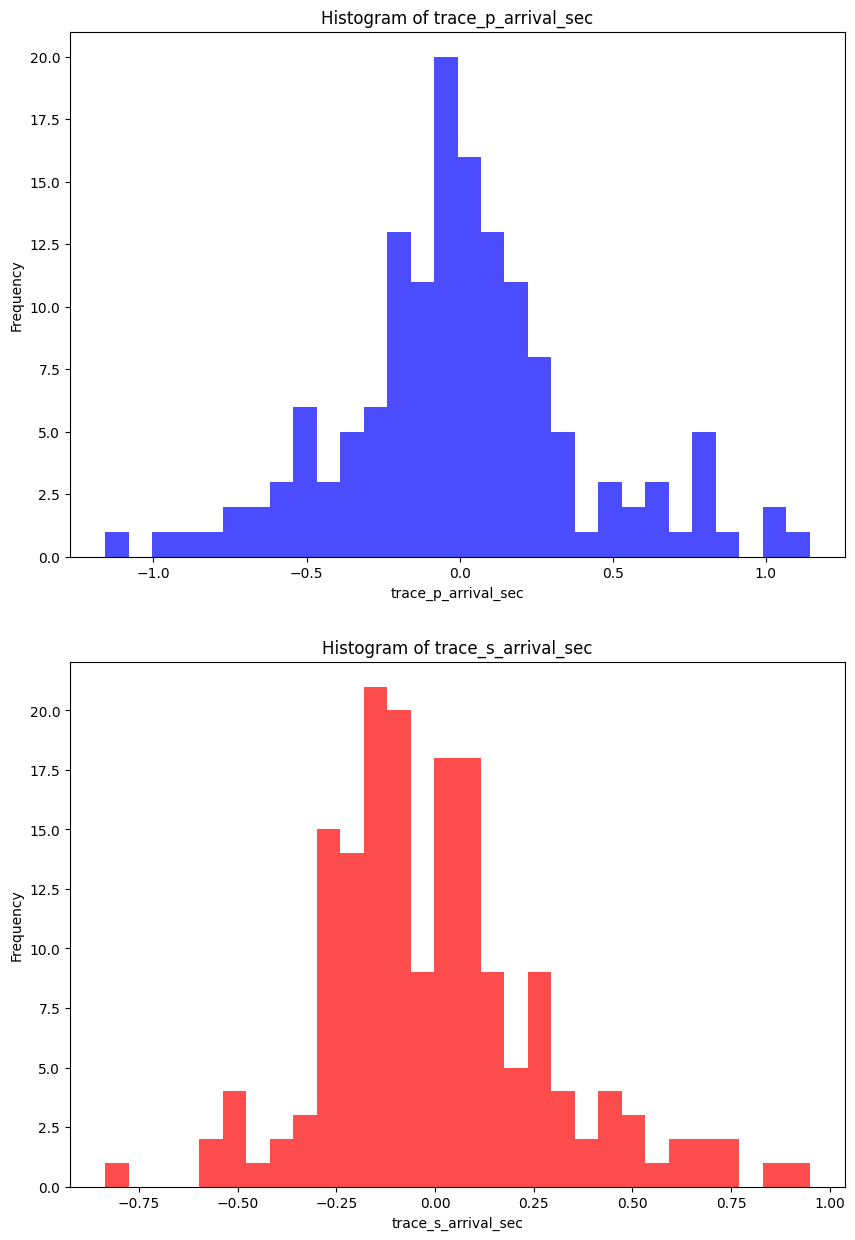

In [842]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(p_dataset['trace_p_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(s_dataset['trace_s_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')


In [843]:
#calculate 2 standard deviations from the mean for the trace_p_arrival_sec and trace_s_arrival_sec columns
p_dataset_mean = p_dataset['trace_p_arrival_sec_detrended'].mean()
p_dataset_std = p_dataset['trace_p_arrival_sec_detrended'].std()
p_dataset_2std = 2 * p_dataset_std

print(p_dataset_mean)
print(p_dataset_std)
print(p_dataset_2std)



-4.3260935272468685e-15
0.3982587031099624
0.7965174062199248


In [844]:
# do it for s_dataset
s_dataset_mean = s_dataset['trace_s_arrival_sec_detrended'].mean()
s_dataset_std = s_dataset['trace_s_arrival_sec_detrended'].std()
s_dataset_2std = 2 * s_dataset_std

print(s_dataset_mean)
print(s_dataset_std)
print(s_dataset_2std)

1.8400181827776005e-14
0.2841548986756305
0.568309797351261


In [845]:
#save values for index which are greater than 2 standard deviations from the mean for the trace_p_arrival_sec column
p_dataset_outliers = p_dataset[(p_dataset['trace_p_arrival_sec_detrended'].values > p_dataset_2std) | 
                               (p_dataset['trace_p_arrival_sec_detrended'].values < -p_dataset_2std)]

p_dataset_outliers

#replace p_dataset trace_p_arrival_sec and trace_p_arrival_sec_detrended with Nans for the das_number values that occur in p_dataset_outliers
p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec'] = np.nan
p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec_detrended'] = np.nan


#find the columns that are Nans
p_dataset[p_dataset['trace_p_arrival_sec'].isna()]

trace_p_arrival_sec  das_number  trace_p_arrival_sec_detrended
21788                  NaN      2290.0                            NaN
22453                  NaN      2360.0                            NaN
25683                  NaN      2700.0                            NaN
27298                  NaN      2870.0                            NaN
27868                  NaN      2930.0                            NaN
32808                  NaN      3450.0                            NaN
37178                  NaN      3910.0                            NaN
38603                  NaN      4060.0                            NaN
39173                  NaN      4120.0                            NaN
40503                  NaN      4260.0                            NaN
40788                  NaN      4290.0                            NaN

In [846]:
# Save values for index which are greater than 2 standard deviations from the mean for the trace_s_arrival_sec column
s_dataset_outliers = s_dataset[(s_dataset['trace_s_arrival_sec_detrended'].values > s_dataset_2std) | 
                               (s_dataset['trace_s_arrival_sec_detrended'].values < -s_dataset_2std)]

s_dataset_outliers

# Replace s_dataset trace_s_arrival_sec and trace_s_arrival_sec_detrended with NaNs for the das_number values that occur in s_dataset_outliers
s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec'] = np.nan
s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec_detrended'] = np.nan

# Find the columns that are NaNs
s_dataset[s_dataset['trace_s_arrival_sec'].isna()]


trace_s_arrival_sec  das_number  trace_s_arrival_sec_detrended
29863                  NaN      3140.0                            NaN
30623                  NaN      3220.0                            NaN
34043                  NaN      3580.0                            NaN
34138                  NaN      3590.0                            NaN
37938                  NaN      3990.0                            NaN
40313                  NaN      4240.0                            NaN
40503                  NaN      4260.0                            NaN
41453                  NaN      4360.0                            NaN
42308                  NaN      4450.0                            NaN
42498                  NaN      4470.0                            NaN

Text(0, 0.5, 'Frequency')

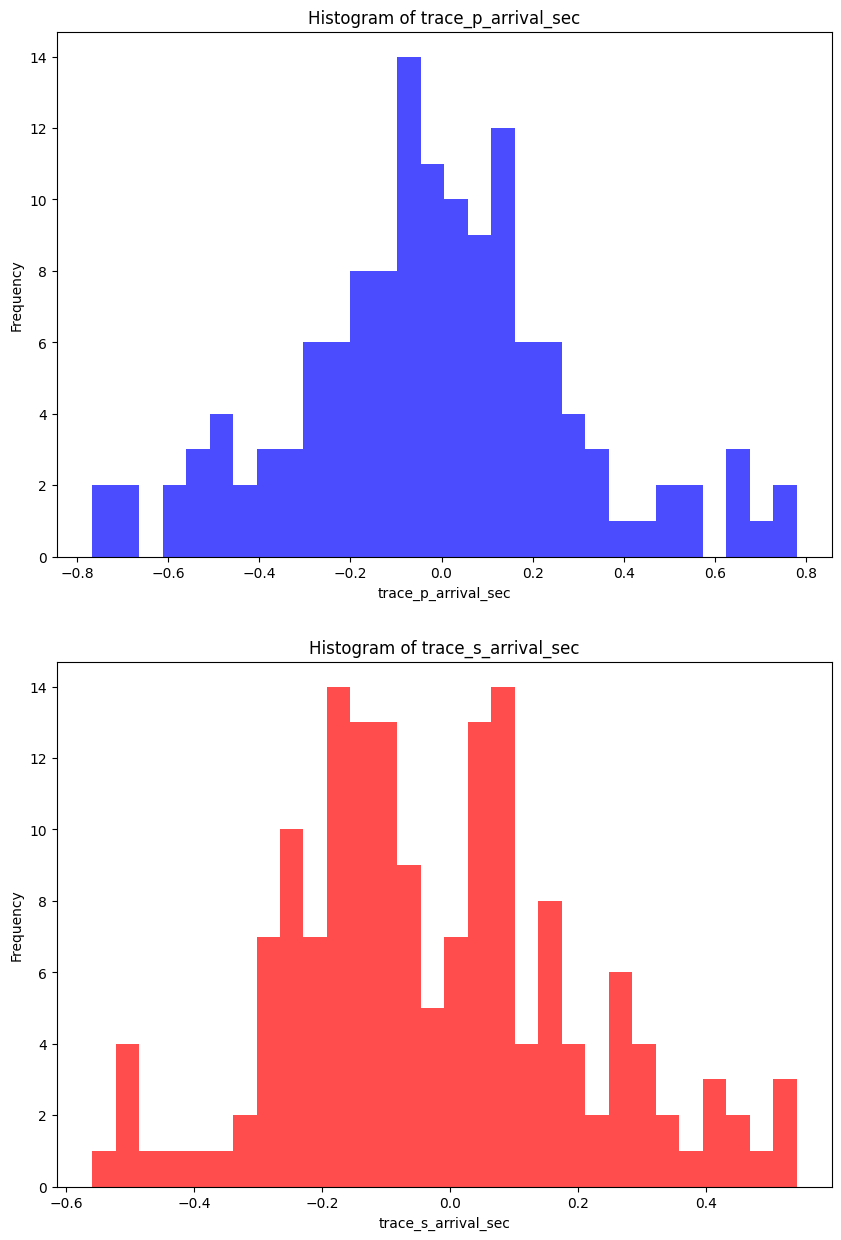

In [847]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(p_dataset['trace_p_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(s_dataset['trace_s_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')

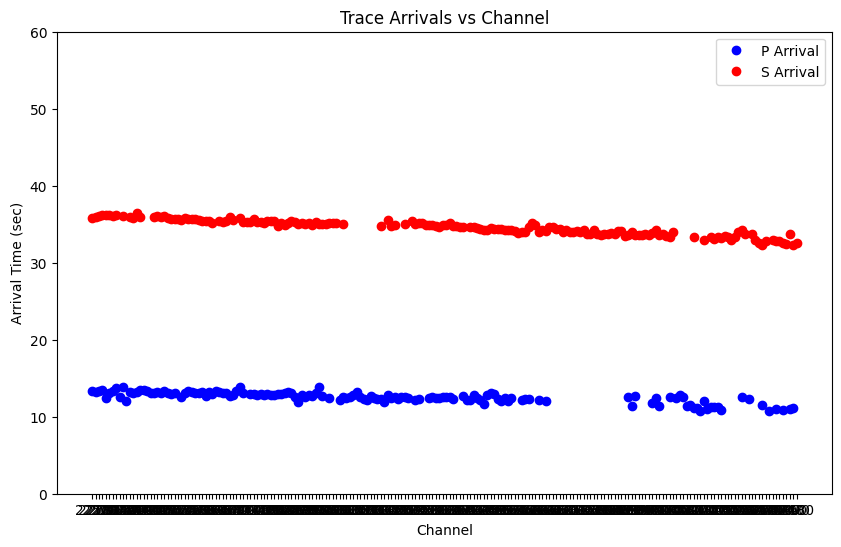

In [848]:
#original
plt.figure(figsize=(10, 6))


plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

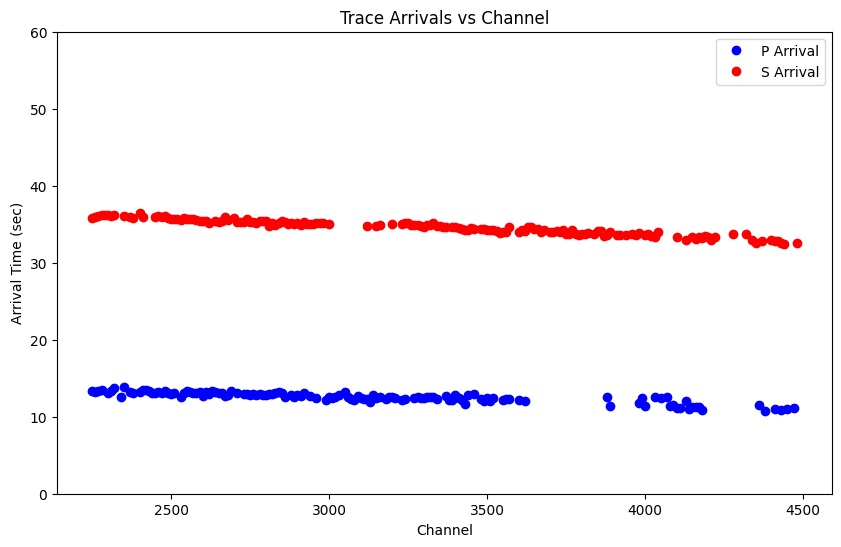

In [849]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

In [850]:
#interpolate the missing values from the p_outliers and s_outliers dataframes using the interpolate function
p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()

s_dataset


C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\3394753993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\3394753993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()


trace_s_arrival_sec  das_number  trace_s_arrival_sec_detrended  \
21408            35.869999      2250.0                      -0.293705   
21503            35.980000      2260.0                      -0.169210   
21598            36.060001      2270.0                      -0.074715   
21693            36.200001      2280.0                       0.079778   
21788            36.160000      2290.0                       0.054271   
...                    ...         ...                            ...   
42118            32.500000      4430.0                      -0.504105   
42213            32.430000      4440.0                      -0.559611   
42308                  NaN      4450.0                            NaN   
42498                  NaN      4470.0                            NaN   
42593            32.610001      4480.0                      -0.321636   

       trace_s_arrival_sec_interpolated  
21408                         35.869999  
21503                         35.980000  
21598                         36.060001  
21693                         36.200001  
21788                         36.160000  
...                                 ...  
42118                         32.500000  
42213                         32.430000  
42308                         32.490000  
42498                         32.550001  
42593                         32.610001  

[173 rows x 4 columns]

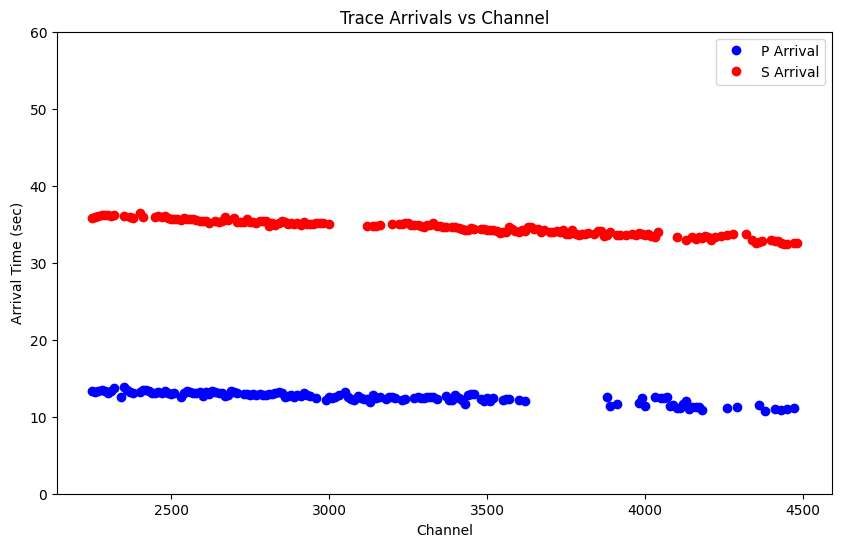

In [851]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

#### Interpolation 2

In [852]:
#find min and max das_number for p_dataset and s_dataset
p_dataset_min = p_dataset['das_number'].min()
p_dataset_max = p_dataset['das_number'].max()
s_dataset_min = s_dataset['das_number'].min()
s_dataset_max = s_dataset['das_number'].max()

print(f"p_dataset das_number min: {p_dataset_min}, max: {p_dataset_max}")
print(f"s_dataset das_number min: {s_dataset_min}, max: {s_dataset_max}")

p_dataset das_number min: 2250.0, max: 4470.0
s_dataset das_number min: 2250.0, max: 4480.0


In [853]:
from numpy import arange

new_array = arange(2250, 4481, 1)
new_array


array([2250, 2251, 2252, ..., 4478, 4479, 4480])

In [854]:
# Create a DataFrame with all possible das_number values from new_array
full_range_df = pd.DataFrame({'das_number': new_array})

# Merge with p_dataset and s_dataset to include missing values
p_dataset = full_range_df.merge(p_dataset, on='das_number', how='left')
s_dataset = full_range_df.merge(s_dataset, on='das_number', how='left')

#interpolate again to fill the missing values based on trace_p_arrivaL_sec_interpolated
p_dataset['trace_p_arrival_sec_interpolated2'] = p_dataset['trace_p_arrival_sec_interpolated'].interpolate()
p_dataset

#interpolate again to fill the missing values based on trace_s_arrivaL_sec_interpolated
s_dataset['trace_s_arrival_sec_interpolated2'] = s_dataset['trace_s_arrival_sec_interpolated'].interpolate()
#s_dataset


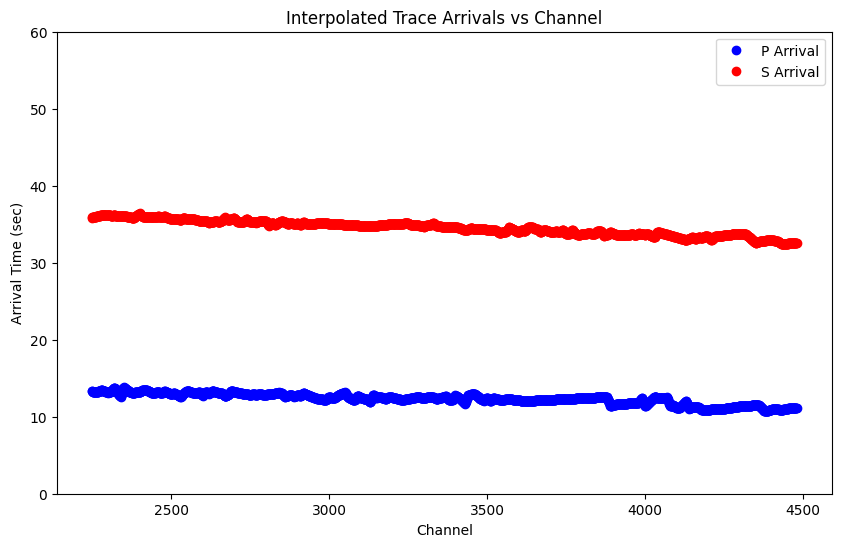

In [855]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated2'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated2'], 'o', color='red', label='S Arrival')

plt.title(f'Interpolated Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

#### File Creation

In [856]:
#create a 2D numpy array of zeros with dimensions (1500, 8530)
# Create a 2D numpy array of zeros with dimensions (1500, 8530)
#p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25
zeros = np.zeros((1500, 8530))

#convert the trace_p_arrival_sec_interpolated2 column to a numpy array and multiply by 25
p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25

#drop Nan values
p_dataset.dropna(subset=['Sample#', 'das_number'], inplace=True)

#match the sample# column and das_number columns to the zeros array with it (sample#, das_number) and assign 1 values to those points
for index, row in p_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        zeros[sample_number, das_number] = 1

#add 1 values each sample for 250 samples after the sample number for the s-wave 
for index, row in p_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
       for i in range(1, 25 * p_arrival_mask + 1):
            if sample_number + i < 1500:
                zeros[sample_number + i, das_number] = 1

#save zeroes
np.save('F:/DAS/'+str(p_arrival_mask)+'/p/p-wave_2023_12_16T19_24_56_880000Z_'+str(p_arrival_mask)+'sec_filled.npy', zeros)

#save zeros as a csv file
#np.savetxt('F:/DAS/p-wave_2023-12-30_22.35.57_UTC.np', zeros, delimiter=',')


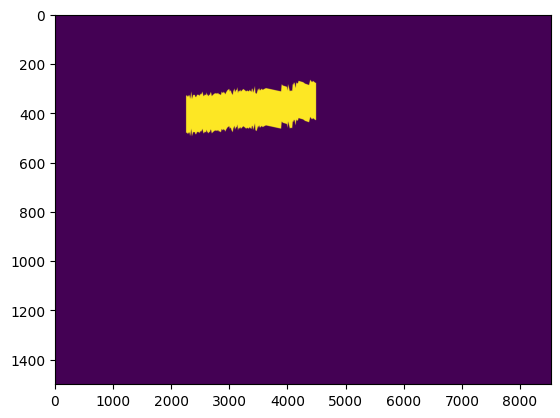

In [857]:
plt.imshow(zeros, aspect='auto')

In [858]:
#create a 2D numpy array of zeros with dimensions (1500, 8530)
# Create a 2D numpy array of zeros with dimensions (1500, 8530)
#p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25
zeros = np.zeros((1500, 8530))

#convert the trace_p_arrival_sec_interpolated2 column to a numpy array and multiply by 25
s_dataset["Sample#"] = s_dataset['trace_s_arrival_sec_interpolated2']*25

#drop Nan values
s_dataset.dropna(subset=['Sample#', 'das_number'], inplace=True)

#match the sample# column and das_number columns to the zeros array with it (sample#, das_number) and assign 1 values to those points
for index, row in s_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        zeros[sample_number, das_number] = 1

#add 1 values each sample for 250 samples after the sample number for the s-wave 
for index, row in s_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        for i in range(1, 25 * s_arrival_mask + 1):
            if sample_number + i < 1500:
                zeros[sample_number + i, das_number] = 1

#save zeroes
np.save('F:/DAS/'+str(s_arrival_mask)+'/s/s-wave_2023_12_16T19_24_56_880000Z_'+str(s_arrival_mask)+'sec_filled.npy', zeros)

#save zeros as a csv file
#np.savetxt('F:/DAS/p-wave_2023-12-30_22.35.57_UTC.np', zeros, delimiter=',')


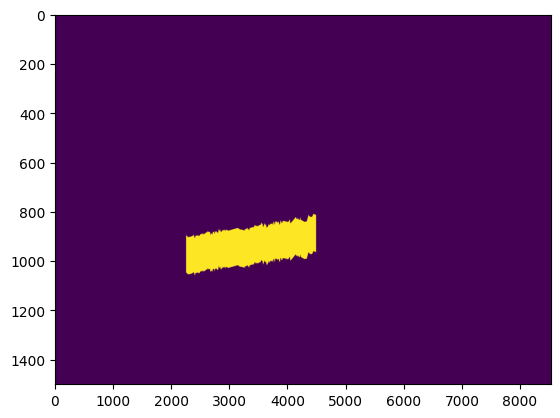

In [859]:
plt.imshow(zeros, aspect='auto')

In [860]:
# #turn previous section into a for loop to iterate through all the unique trace_start_times

# for i in unique_trace_start_times_dropped:
#     if i.strip() == '':
#         print(f"Skipping invalid trace_start_time: '{i}'")
#         continue
    
#     # Define directory and filename
#     # Convert i into a string with format YYYYMMDD_HHMMSS
#     name = str(i).replace(" ", "_").replace(":", "_").replace("-", "_").replace(".", "_")
    
#     directory = "F:/DAS/pick_plots_interpolated_20250401"
#     filename = str(name) + ".png"

#     # Combine directory and filename
#     filepath = os.path.join(directory, filename)

#     # Select the specific row based on the index
#     data = grouped_df_dropped.loc[i]

#     # Select specific columns from the row
#     dropped_dataset = data[['trace_p_arrival_sec', 'trace_s_arrival_sec', 'das_number']]
#     p_dataset = dropped_dataset[['trace_p_arrival_sec','das_number']]
#     s_dataset = dropped_dataset[['trace_s_arrival_sec','das_number']]

#     #drop Nans
#     p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
#     s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)
    
#     #convert das_number column to int
#     p_dataset['das_number'] = p_dataset['das_number'].astype(float)
#     s_dataset['das_number'] = s_dataset['das_number'].astype(float)
#     p_dataset['trace_p_arrival_sec'] = p_dataset['trace_p_arrival_sec'].astype(float)
#     s_dataset['trace_s_arrival_sec'] = s_dataset['trace_s_arrival_sec'].astype(float)

#     # Fit individual polynomials for p_dataset and s_dataset
#     p_coeffs_individual = np.polyfit(p_dataset['das_number'].values, p_dataset['trace_p_arrival_sec'].values, deg=1)
#     s_coeffs_individual = np.polyfit(s_dataset['das_number'].values, s_dataset['trace_s_arrival_sec'].values, deg=1)

#     # # Calculate the trends
#     p_trend_individual = np.polyval(p_coeffs_individual, pd.to_numeric(p_dataset['das_number']))
#     s_trend_individual = np.polyval(s_coeffs_individual, pd.to_numeric(s_dataset['das_number']))

#     #Detrend by subtracting the individual trends
#     p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
#     s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual

#     #calculate 2 standard deviations from the mean for the trace_p_arrival_sec and trace_s_arrival_sec columns
#     p_dataset_mean = p_dataset['trace_p_arrival_sec_detrended'].mean()
#     p_dataset_std = p_dataset['trace_p_arrival_sec_detrended'].std()
#     p_dataset_2std = 2 * p_dataset_std

#     # do it for s_dataset
#     s_dataset_mean = s_dataset['trace_s_arrival_sec_detrended'].mean()
#     s_dataset_std = s_dataset['trace_s_arrival_sec_detrended'].std()
#     s_dataset_2std = 2 * s_dataset_std
    
#     #save values for index which are greater than 2 standard deviations from the mean for the trace_p_arrival_sec column
#     p_dataset_outliers = p_dataset[(p_dataset['trace_p_arrival_sec_detrended'].values > p_dataset_2std) | 
#                                    (p_dataset['trace_p_arrival_sec_detrended'].values < -p_dataset_2std)]

#     #replace p_dataset trace_p_arrival_sec and trace_p_arrival_sec_detrended with Nans for the das_number values that occur in p_dataset_outliers
#     p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec'] = np.nan
#     p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec_detrended'] = np.nan

#     # Save values for index which are greater than 2 standard deviations from the mean for the trace_s_arrival_sec column
#     s_dataset_outliers = s_dataset[(s_dataset['trace_s_arrival_sec_detrended'].values > s_dataset_2std) | 
#                                    (s_dataset['trace_s_arrival_sec_detrended'].values < -s_dataset_2std)]

#     # Replace s_dataset trace_s_arrival_sec and trace_s_arrival_sec_detrended with NaNs for the das_number values that occur in s_dataset_outliers
#     s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec'] = np.nan
#     s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec_detrended'] = np.nan

#     #interpolate the missing values from the p_outliers and s_outliers dataframes using the interpolate function
#     p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
#     s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()

#     new_array = arange(1, 10000, 1)

#     # Create a DataFrame with all possible das_number values from new_array
#     full_range_df = pd.DataFrame({'das_number': new_array})

#     # Merge with p_dataset and s_dataset to include missing values
#     p_dataset = full_range_df.merge(p_dataset, on='das_number', how='left')
#     s_dataset = full_range_df.merge(s_dataset, on='das_number', how='left')

#     #interpolate again to fill the missing values based on trace_p_arrivaL_sec_interpolated
#     p_dataset['trace_p_arrival_sec_interpolated2'] = p_dataset['trace_p_arrival_sec_interpolated'].interpolate()

#     #interpolate again to fill the missing values based on trace_s_arrivaL_sec_interpolated
#     s_dataset['trace_s_arrival_sec_interpolated2'] = s_dataset['trace_s_arrival_sec_interpolated'].interpolate()

#     # Plot the interpolated values
#     plt.figure(figsize=(10, 6))
  
#     plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated2'], 'o', color='blue', label='P Arrival')
#     plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated2'], 'o', color='red', label='S Arrival')

#     plt.title(f'Interpolated Trace Arrivals vs Channel for {i}')
#     plt.xlabel('Channel')
#     plt.ylabel('Arrival Time (sec)')
#     plt.ylim(0, 60)
#     plt.legend()

#     # Set the number of ticks to 5
#     plt.gca().xaxis.set_major_locator(MaxNLocator(5))
#     plt.savefig(filepath)
#     plt.close()

### 2023_12_24T05_01_57_200000Z

#### Background

In [861]:
# Select the specific row based on the index
data_2023_12_30 = grouped_df_dropped.loc['2023-12-24T05:01:57.200000Z']

# Select specific columns from the row
dropped_dataset = data_2023_12_30[['trace_p_arrival_sec', 'trace_s_arrival_sec', 'das_number']]
p_dataset = dropped_dataset[['trace_p_arrival_sec','das_number']]
s_dataset = dropped_dataset[['trace_s_arrival_sec','das_number']]


In [862]:
p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)

C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\751016926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\751016926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)


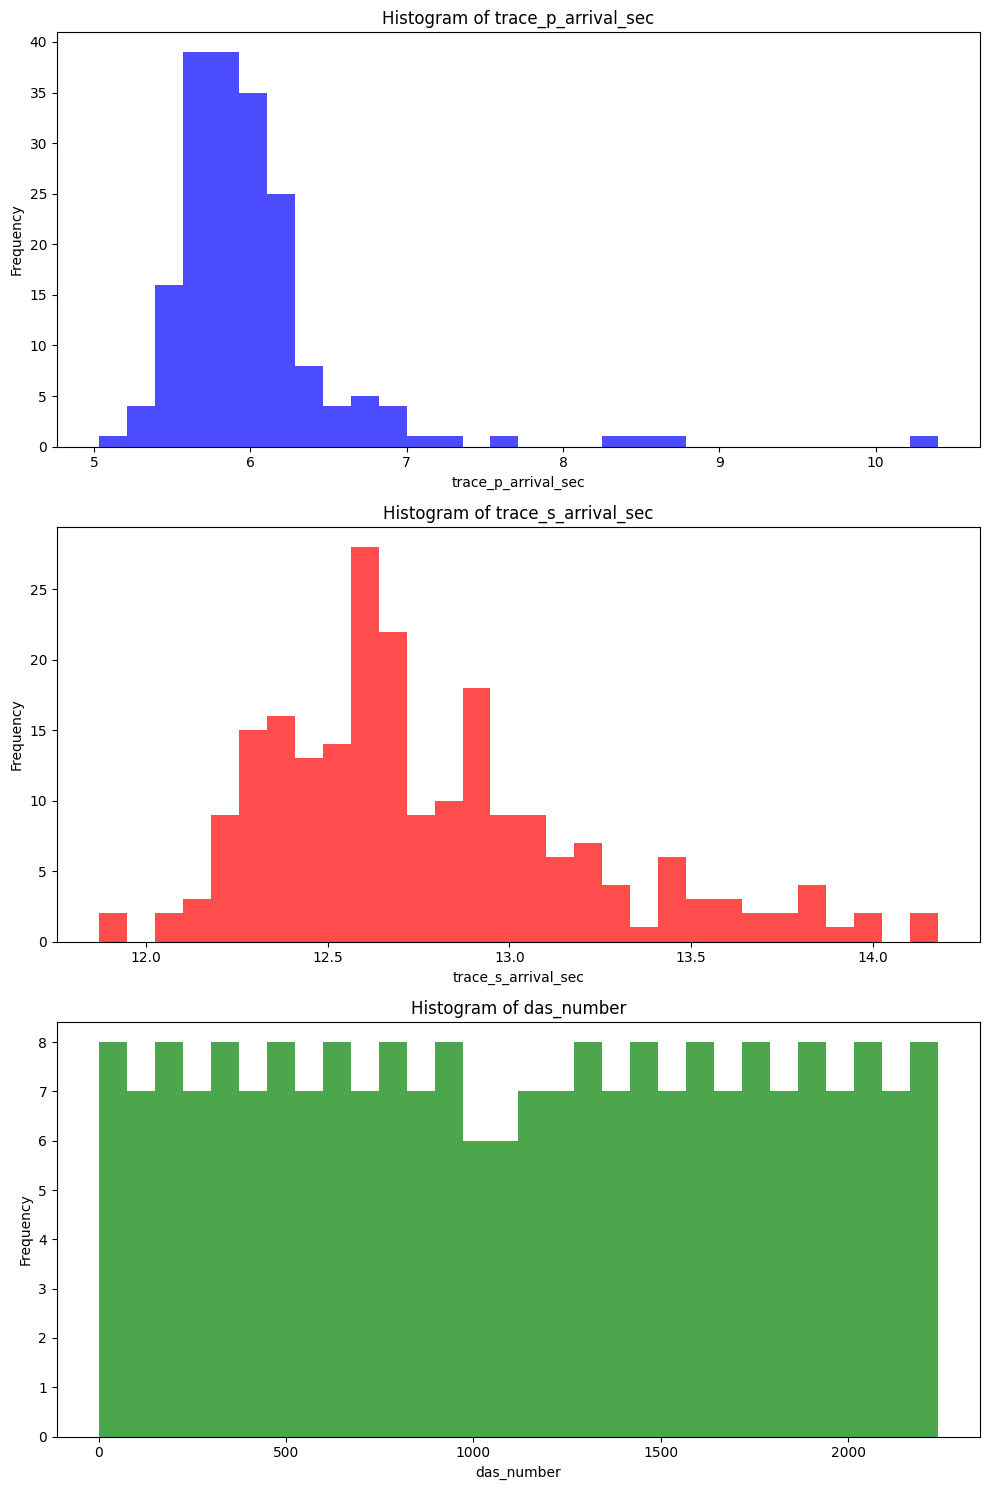

In [863]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(dropped_dataset['trace_p_arrival_sec'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(dropped_dataset['trace_s_arrival_sec'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')

# Histogram for das_number
axes[2].hist(pd.to_numeric(dropped_dataset['das_number'], errors='coerce').dropna(), bins=30, color='green', alpha=0.7)
axes[2].set_title('Histogram of das_number')
axes[2].set_xlabel('das_number')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

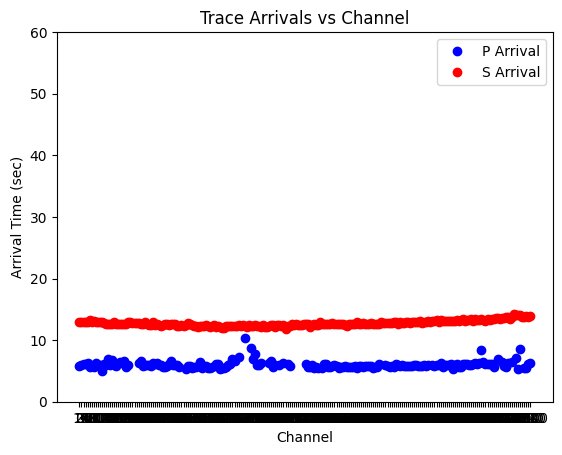

In [864]:
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

In [865]:
p_dataset
#convert das_number column to int
p_dataset['das_number'] = p_dataset['das_number'].astype(float)
s_dataset['das_number'] = s_dataset['das_number'].astype(float)
p_dataset['trace_p_arrival_sec'] = p_dataset['trace_p_arrival_sec'].astype(float)
s_dataset['trace_s_arrival_sec'] = s_dataset['trace_s_arrival_sec'].astype(float)



C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['das_number'] = p_dataset['das_number'].astype(float)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['das_number'] = s_dataset['das_number'].astype(float)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [866]:

#is there nans in p_dataset["trace_[arrival_sec"]"]
p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
print(p_dataset["trace_p_arrival_sec"].isna())


19       False
114      False
209      False
304      False
399      False
         ...  
20824    False
21014    False
21109    False
21204    False
21299    False
Name: trace_p_arrival_sec, Length: 187, dtype: bool


C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\620326073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)


In [867]:
print(p_dataset["das_number"].dtype)
print(p_dataset["trace_p_arrival_sec"].dtype)
print(s_dataset["das_number"].dtype)
print(s_dataset["trace_s_arrival_sec"].dtype)


float64
float64
float64
float64


In [868]:
print(p_dataset["das_number"].values)
print(p_dataset["trace_p_arrival_sec"].values)
print(s_dataset["das_number"].values)
print(s_dataset["trace_s_arrival_sec"].values)


[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.
  120.  130.  140.  150.  160.  170.  180.  200.  210.  220.  230.  240.
  290.  300.  310.  320.  330.  340.  350.  360.  370.  380.  390.  400.
  410.  420.  430.  440.  450.  460.  470.  480.  490.  520.  530.  540.
  550.  560.  570.  580.  590.  600.  610.  620.  630.  640.  650.  670.
  680.  690.  700.  710.  720.  730.  740.  750.  760.  780.  810.  840.
  850.  860.  870.  880.  890.  930.  940.  950.  960.  980. 1000. 1020.
 1030. 1140. 1150. 1160. 1170. 1180. 1190. 1200. 1220. 1230. 1240. 1250.
 1260. 1270. 1280. 1290. 1300. 1310. 1320. 1330. 1340. 1350. 1360. 1370.
 1380. 1390. 1400. 1410. 1420. 1430. 1440. 1450. 1460. 1470. 1480. 1490.
 1500. 1530. 1540. 1550. 1560. 1570. 1580. 1590. 1600. 1610. 1620. 1630.
 1640. 1650. 1660. 1670. 1680. 1690. 1700. 1710. 1720. 1730. 1740. 1760.
 1770. 1780. 1790. 1800. 1810. 1820. 1830. 1840. 1850. 1860. 1870. 1880.
 1890. 1900. 1910. 1920. 1930. 1940. 1950. 1960. 19

In [869]:
import numpy as np
import matplotlib.pyplot as plt

# Fit individual polynomials for p_dataset and s_dataset
p_coeffs_individual = np.polyfit(p_dataset['das_number'].values, p_dataset['trace_p_arrival_sec'].values, deg=1)
s_coeffs_individual = np.polyfit(s_dataset['das_number'].values, s_dataset['trace_s_arrival_sec'].values, deg=1)

# # Calculate the trends
p_trend_individual = np.polyval(p_coeffs_individual, pd.to_numeric(p_dataset['das_number']))
s_trend_individual = np.polyval(s_coeffs_individual, pd.to_numeric(s_dataset['das_number']))

# # Detrend by subtracting the individual trends
p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual



C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\25613787.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual


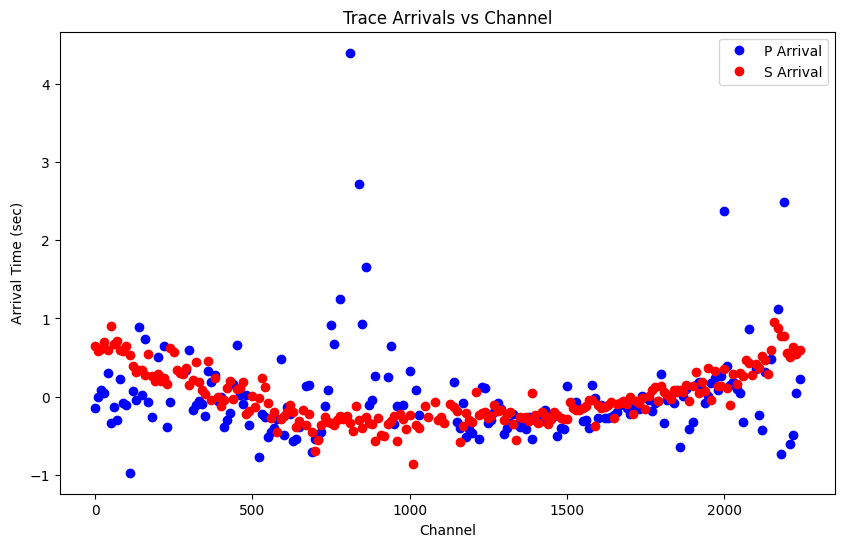

In [870]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_detrended'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_detrended'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.legend()
# Set the number of ticks to 5
plt.gca().xaxis.set_major_locator(MaxNLocator(5))

Text(0, 0.5, 'Frequency')

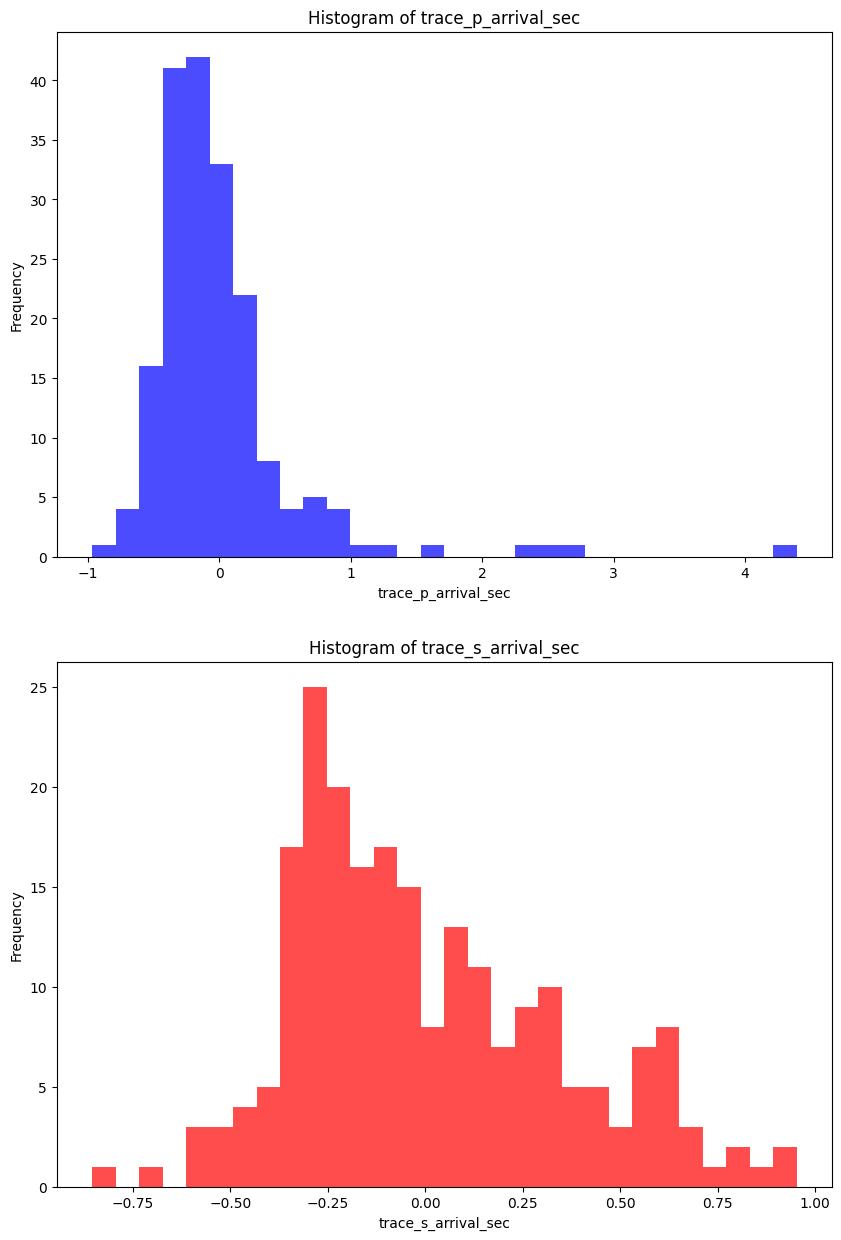

In [871]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(p_dataset['trace_p_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(s_dataset['trace_s_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')


In [872]:
#calculate 2 standard deviations from the mean for the trace_p_arrival_sec and trace_s_arrival_sec columns
p_dataset_mean = p_dataset['trace_p_arrival_sec_detrended'].mean()
p_dataset_std = p_dataset['trace_p_arrival_sec_detrended'].std()
p_dataset_2std = 2 * p_dataset_std

print(p_dataset_mean)
print(p_dataset_std)
print(p_dataset_2std)



5.082090422883069e-16
0.5941946767965085
1.188389353593017


In [873]:
# do it for s_dataset
s_dataset_mean = s_dataset['trace_s_arrival_sec_detrended'].mean()
s_dataset_std = s_dataset['trace_s_arrival_sec_detrended'].std()
s_dataset_2std = 2 * s_dataset_std

print(s_dataset_mean)
print(s_dataset_std)
print(s_dataset_2std)

-3.6487329674167305e-15
0.3416344832520185
0.683268966504037


In [874]:
#save values for index which are greater than 2 standard deviations from the mean for the trace_p_arrival_sec column
p_dataset_outliers = p_dataset[(p_dataset['trace_p_arrival_sec_detrended'].values > p_dataset_2std) | 
                               (p_dataset['trace_p_arrival_sec_detrended'].values < -p_dataset_2std)]

p_dataset_outliers

#replace p_dataset trace_p_arrival_sec and trace_p_arrival_sec_detrended with Nans for the das_number values that occur in p_dataset_outliers
p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec'] = np.nan
p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec_detrended'] = np.nan


#find the columns that are Nans
p_dataset[p_dataset['trace_p_arrival_sec'].isna()]

trace_p_arrival_sec  das_number  trace_p_arrival_sec_detrended
7429                   NaN       780.0                            NaN
7714                   NaN       810.0                            NaN
7999                   NaN       840.0                            NaN
8189                   NaN       860.0                            NaN
19019                  NaN      2000.0                            NaN
20824                  NaN      2190.0                            NaN

In [875]:
# Save values for index which are greater than 2 standard deviations from the mean for the trace_s_arrival_sec column
s_dataset_outliers = s_dataset[(s_dataset['trace_s_arrival_sec_detrended'].values > s_dataset_2std) | 
                               (s_dataset['trace_s_arrival_sec_detrended'].values < -s_dataset_2std)]

s_dataset_outliers

# Replace s_dataset trace_s_arrival_sec and trace_s_arrival_sec_detrended with NaNs for the das_number values that occur in s_dataset_outliers
s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec'] = np.nan
s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec_detrended'] = np.nan

# Find the columns that are NaNs
s_dataset[s_dataset['trace_s_arrival_sec'].isna()]


trace_s_arrival_sec  das_number  trace_s_arrival_sec_detrended
304                    NaN        30.0                            NaN
494                    NaN        50.0                            NaN
684                    NaN        70.0                            NaN
6669                   NaN       700.0                            NaN
9614                   NaN      1010.0                            NaN
20539                  NaN      2160.0                            NaN
20634                  NaN      2170.0                            NaN
20729                  NaN      2180.0                            NaN
20824                  NaN      2190.0                            NaN

Text(0, 0.5, 'Frequency')

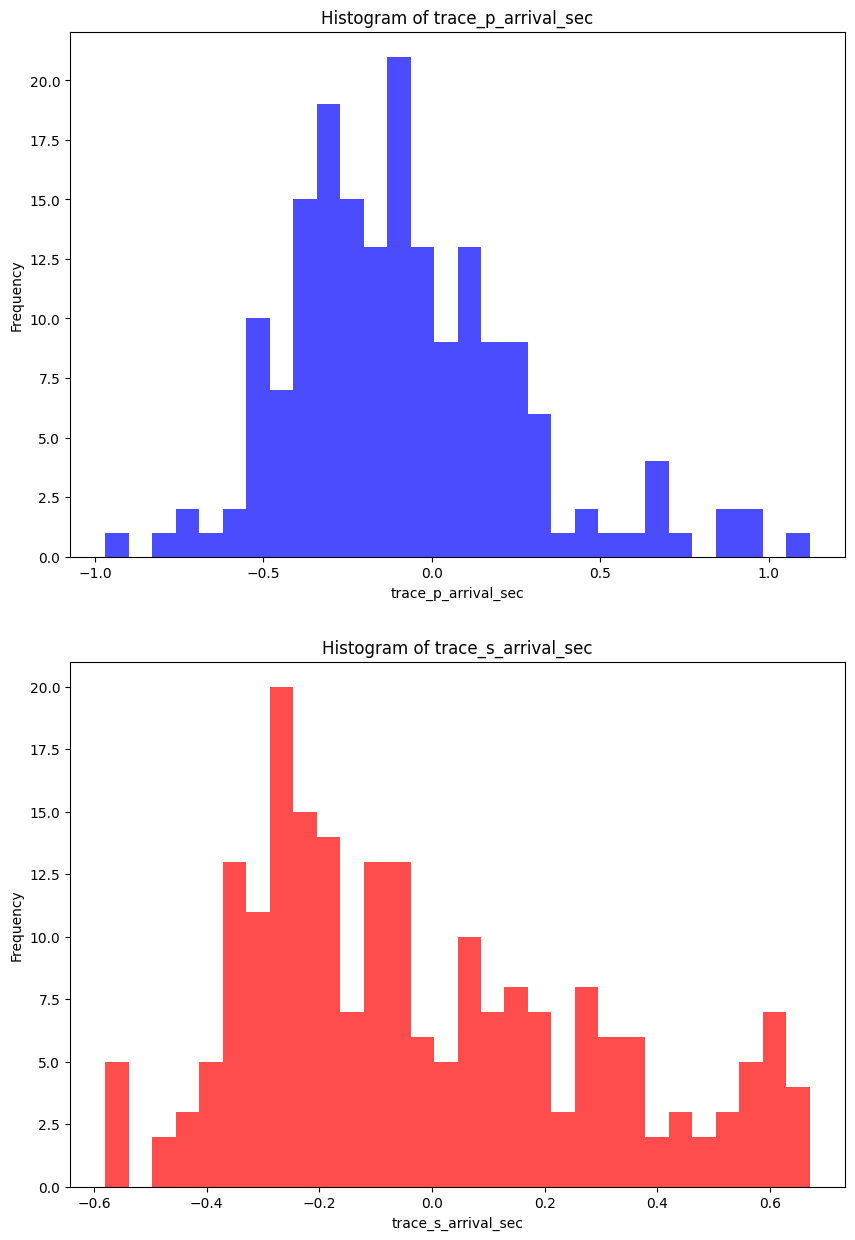

In [876]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(p_dataset['trace_p_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(s_dataset['trace_s_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')

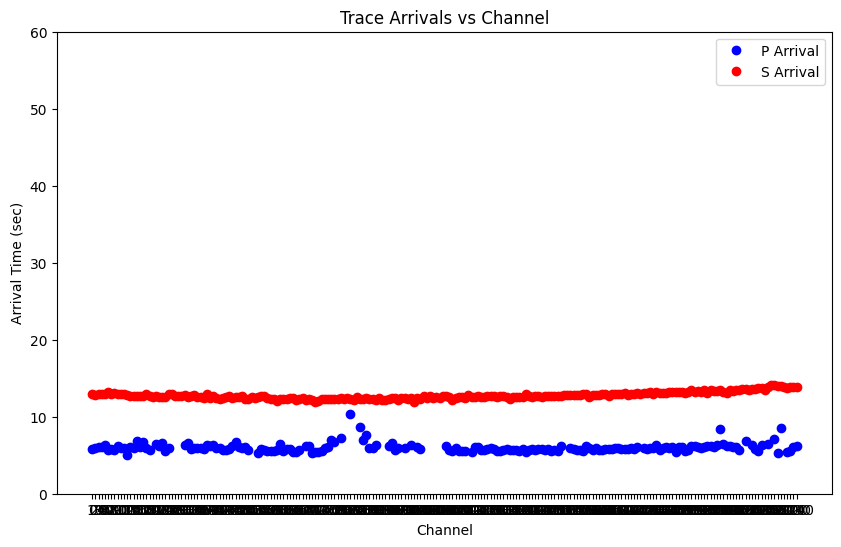

In [877]:
#original
plt.figure(figsize=(10, 6))


plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

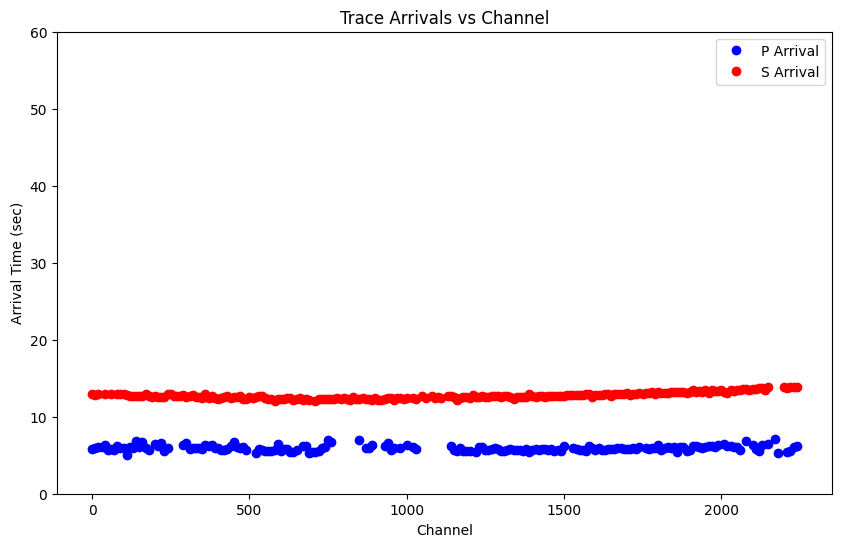

In [878]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

In [879]:
#interpolate the missing values from the p_outliers and s_outliers dataframes using the interpolate function
p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()

s_dataset


C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\3394753993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()


trace_s_arrival_sec  das_number  trace_s_arrival_sec_detrended  \
19                   12.93         0.0                       0.647204   
114                  12.87        10.0                       0.582831   
209                  12.90        20.0                       0.608458   
304                    NaN        30.0                            NaN   
399                  12.90        40.0                       0.599712   
...                    ...         ...                            ...   
20919                13.81      2200.0                       0.565125   
21014                13.76      2210.0                       0.510752   
21109                13.89      2220.0                       0.636378   
21204                13.81      2230.0                       0.552005   
21299                13.86      2240.0                       0.597632   

       trace_s_arrival_sec_interpolated  
19                                12.93  
114                               12.87  
209                               12.90  
304                               12.90  
399                               12.90  
...                                 ...  
20919                             13.81  
21014                             13.76  
21109                             13.89  
21204                             13.81  
21299                             13.86  

[222 rows x 4 columns]

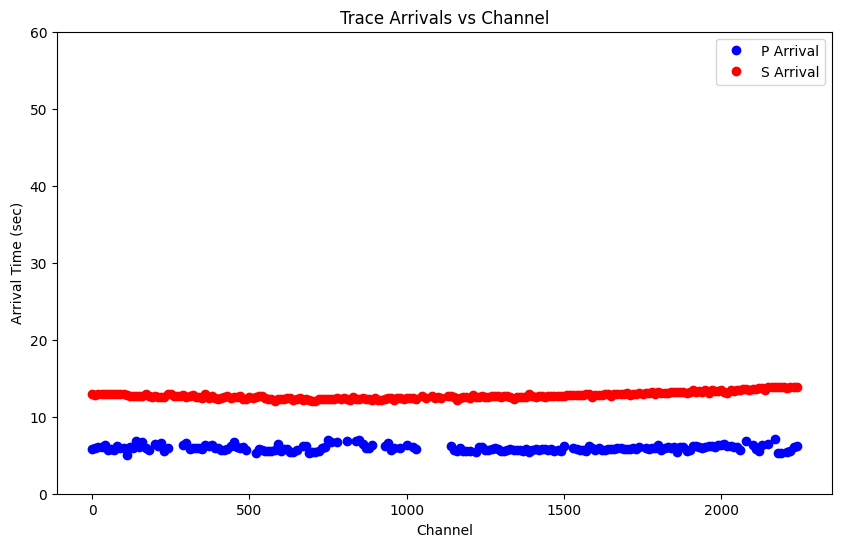

In [880]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

#### Interpolation 2

In [881]:
#find min and max das_number for p_dataset and s_dataset
p_dataset_min = p_dataset['das_number'].min()
p_dataset_max = p_dataset['das_number'].max()
s_dataset_min = s_dataset['das_number'].min()
s_dataset_max = s_dataset['das_number'].max()

print(f"p_dataset das_number min: {p_dataset_min}, max: {p_dataset_max}")
print(f"s_dataset das_number min: {s_dataset_min}, max: {s_dataset_max}")

p_dataset das_number min: 0.0, max: 2240.0
s_dataset das_number min: 0.0, max: 2240.0


In [882]:
from numpy import arange

new_array = arange(0, 2241, 1)
new_array


array([   0,    1,    2, ..., 2238, 2239, 2240])

In [883]:
# Create a DataFrame with all possible das_number values from new_array
full_range_df = pd.DataFrame({'das_number': new_array})

# Merge with p_dataset and s_dataset to include missing values
p_dataset = full_range_df.merge(p_dataset, on='das_number', how='left')
s_dataset = full_range_df.merge(s_dataset, on='das_number', how='left')

#interpolate again to fill the missing values based on trace_p_arrivaL_sec_interpolated
p_dataset['trace_p_arrival_sec_interpolated2'] = p_dataset['trace_p_arrival_sec_interpolated'].interpolate()
p_dataset

#interpolate again to fill the missing values based on trace_s_arrivaL_sec_interpolated
s_dataset['trace_s_arrival_sec_interpolated2'] = s_dataset['trace_s_arrival_sec_interpolated'].interpolate()
#s_dataset


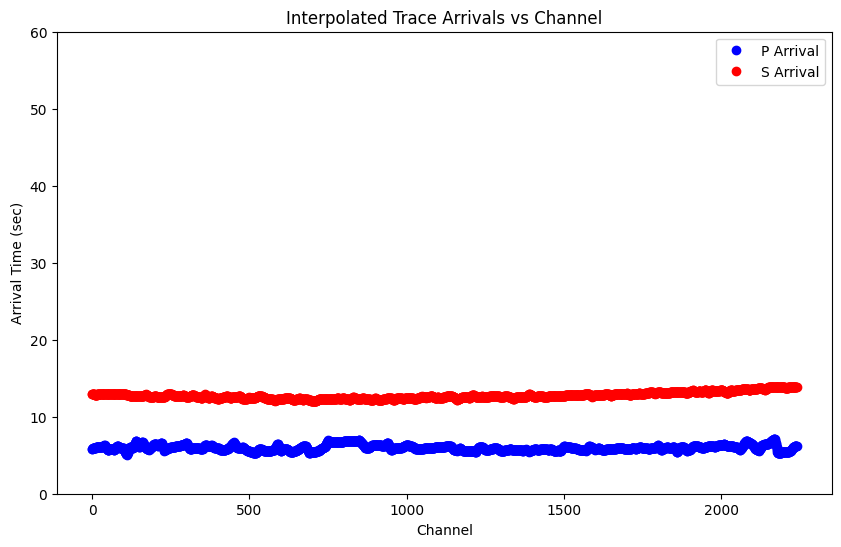

In [884]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated2'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated2'], 'o', color='red', label='S Arrival')

plt.title(f'Interpolated Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

#### File Creation

In [885]:
#create a 2D numpy array of zeros with dimensions (1500, 8530)
# Create a 2D numpy array of zeros with dimensions (1500, 8530)
#p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25
zeros = np.zeros((1500, 8530))

#convert the trace_p_arrival_sec_interpolated2 column to a numpy array and multiply by 25
p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25

#drop Nan values
p_dataset.dropna(subset=['Sample#', 'das_number'], inplace=True)

#match the sample# column and das_number columns to the zeros array with it (sample#, das_number) and assign 1 values to those points
for index, row in p_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        zeros[sample_number, das_number] = 1

#add 1 values each sample for 250 samples after the sample number for the s-wave 
for index, row in p_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        for i in range(1, 25 * p_arrival_mask + 1):
            if sample_number + i < 1500:
                zeros[sample_number + i, das_number] = 1

#save zeroes
np.save('F:/DAS/'+str(p_arrival_mask)+'/p/p-wave_2023_12_24T05_01_57_200000Z_'+str(p_arrival_mask)+'sec_filled.npy', zeros)

#save zeros as a csv file
#np.savetxt('F:/DAS/p-wave_2023-12-30_22.35.57_UTC.np', zeros, delimiter=',')


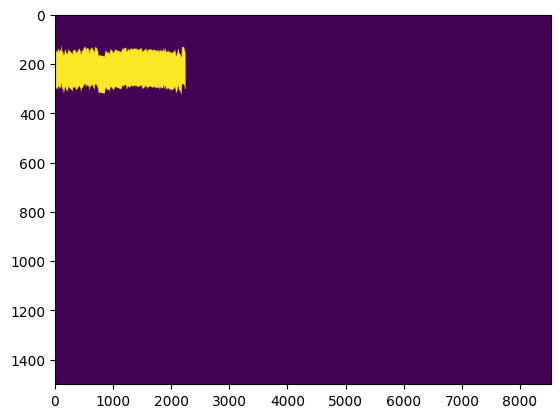

In [886]:
plt.imshow(zeros, aspect='auto')

In [887]:
#create a 2D numpy array of zeros with dimensions (1500, 8530)
# Create a 2D numpy array of zeros with dimensions (1500, 8530)
#p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25
zeros = np.zeros((1500, 8530))

#convert the trace_p_arrival_sec_interpolated2 column to a numpy array and multiply by 25
s_dataset["Sample#"] = s_dataset['trace_s_arrival_sec_interpolated2']*25

#drop Nan values
s_dataset.dropna(subset=['Sample#', 'das_number'], inplace=True)

#match the sample# column and das_number columns to the zeros array with it (sample#, das_number) and assign 1 values to those points
for index, row in s_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        zeros[sample_number, das_number] = 1

#add 1 values each sample for 250 samples after the sample number for the s-wave 
for index, row in s_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        for i in range(1, 25 * s_arrival_mask + 1):
            if sample_number + i < 1500:
                zeros[sample_number + i, das_number] = 1

#save zeroes
np.save('F:/DAS/'+str(s_arrival_mask)+'/s/s-wave_2023_12_24T05_01_57_200000Z_'+str(s_arrival_mask)+'sec_filled.npy', zeros)

#save zeros as a csv file
#np.savetxt('F:/DAS/p-wave_2023-12-30_22.35.57_UTC.np', zeros, delimiter=',')


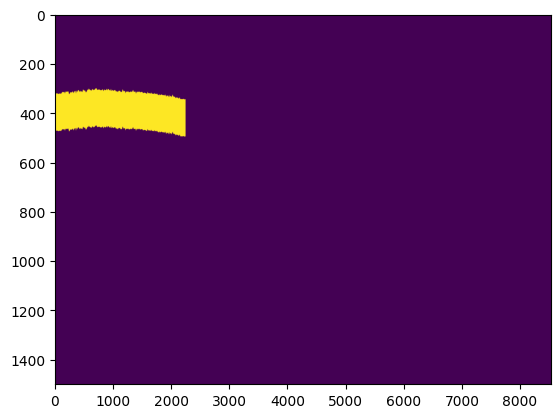

In [888]:
plt.imshow(zeros, aspect='auto')

In [889]:
# #turn previous section into a for loop to iterate through all the unique trace_start_times

# for i in unique_trace_start_times_dropped:
#     if i.strip() == '':
#         print(f"Skipping invalid trace_start_time: '{i}'")
#         continue
    
#     # Define directory and filename
#     # Convert i into a string with format YYYYMMDD_HHMMSS
#     name = str(i).replace(" ", "_").replace(":", "_").replace("-", "_").replace(".", "_")
    
#     directory = "F:/DAS/pick_plots_interpolated_20250401"
#     filename = str(name) + ".png"

#     # Combine directory and filename
#     filepath = os.path.join(directory, filename)

#     # Select the specific row based on the index
#     data = grouped_df_dropped.loc[i]

#     # Select specific columns from the row
#     dropped_dataset = data[['trace_p_arrival_sec', 'trace_s_arrival_sec', 'das_number']]
#     p_dataset = dropped_dataset[['trace_p_arrival_sec','das_number']]
#     s_dataset = dropped_dataset[['trace_s_arrival_sec','das_number']]

#     #drop Nans
#     p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
#     s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)
    
#     #convert das_number column to int
#     p_dataset['das_number'] = p_dataset['das_number'].astype(float)
#     s_dataset['das_number'] = s_dataset['das_number'].astype(float)
#     p_dataset['trace_p_arrival_sec'] = p_dataset['trace_p_arrival_sec'].astype(float)
#     s_dataset['trace_s_arrival_sec'] = s_dataset['trace_s_arrival_sec'].astype(float)

#     # Fit individual polynomials for p_dataset and s_dataset
#     p_coeffs_individual = np.polyfit(p_dataset['das_number'].values, p_dataset['trace_p_arrival_sec'].values, deg=1)
#     s_coeffs_individual = np.polyfit(s_dataset['das_number'].values, s_dataset['trace_s_arrival_sec'].values, deg=1)

#     # # Calculate the trends
#     p_trend_individual = np.polyval(p_coeffs_individual, pd.to_numeric(p_dataset['das_number']))
#     s_trend_individual = np.polyval(s_coeffs_individual, pd.to_numeric(s_dataset['das_number']))

#     #Detrend by subtracting the individual trends
#     p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
#     s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual

#     #calculate 2 standard deviations from the mean for the trace_p_arrival_sec and trace_s_arrival_sec columns
#     p_dataset_mean = p_dataset['trace_p_arrival_sec_detrended'].mean()
#     p_dataset_std = p_dataset['trace_p_arrival_sec_detrended'].std()
#     p_dataset_2std = 2 * p_dataset_std

#     # do it for s_dataset
#     s_dataset_mean = s_dataset['trace_s_arrival_sec_detrended'].mean()
#     s_dataset_std = s_dataset['trace_s_arrival_sec_detrended'].std()
#     s_dataset_2std = 2 * s_dataset_std
    
#     #save values for index which are greater than 2 standard deviations from the mean for the trace_p_arrival_sec column
#     p_dataset_outliers = p_dataset[(p_dataset['trace_p_arrival_sec_detrended'].values > p_dataset_2std) | 
#                                    (p_dataset['trace_p_arrival_sec_detrended'].values < -p_dataset_2std)]

#     #replace p_dataset trace_p_arrival_sec and trace_p_arrival_sec_detrended with Nans for the das_number values that occur in p_dataset_outliers
#     p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec'] = np.nan
#     p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec_detrended'] = np.nan

#     # Save values for index which are greater than 2 standard deviations from the mean for the trace_s_arrival_sec column
#     s_dataset_outliers = s_dataset[(s_dataset['trace_s_arrival_sec_detrended'].values > s_dataset_2std) | 
#                                    (s_dataset['trace_s_arrival_sec_detrended'].values < -s_dataset_2std)]

#     # Replace s_dataset trace_s_arrival_sec and trace_s_arrival_sec_detrended with NaNs for the das_number values that occur in s_dataset_outliers
#     s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec'] = np.nan
#     s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec_detrended'] = np.nan

#     #interpolate the missing values from the p_outliers and s_outliers dataframes using the interpolate function
#     p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
#     s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()

#     new_array = arange(1, 10000, 1)

#     # Create a DataFrame with all possible das_number values from new_array
#     full_range_df = pd.DataFrame({'das_number': new_array})

#     # Merge with p_dataset and s_dataset to include missing values
#     p_dataset = full_range_df.merge(p_dataset, on='das_number', how='left')
#     s_dataset = full_range_df.merge(s_dataset, on='das_number', how='left')

#     #interpolate again to fill the missing values based on trace_p_arrivaL_sec_interpolated
#     p_dataset['trace_p_arrival_sec_interpolated2'] = p_dataset['trace_p_arrival_sec_interpolated'].interpolate()

#     #interpolate again to fill the missing values based on trace_s_arrivaL_sec_interpolated
#     s_dataset['trace_s_arrival_sec_interpolated2'] = s_dataset['trace_s_arrival_sec_interpolated'].interpolate()

#     # Plot the interpolated values
#     plt.figure(figsize=(10, 6))
  
#     plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated2'], 'o', color='blue', label='P Arrival')
#     plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated2'], 'o', color='red', label='S Arrival')

#     plt.title(f'Interpolated Trace Arrivals vs Channel for {i}')
#     plt.xlabel('Channel')
#     plt.ylabel('Arrival Time (sec)')
#     plt.ylim(0, 60)
#     plt.legend()

#     # Set the number of ticks to 5
#     plt.gca().xaxis.set_major_locator(MaxNLocator(5))
#     plt.savefig(filepath)
#     plt.close()

### 2023_12_29T02_13_57_200000Z

#### Background

In [890]:
# Select the specific row based on the index
data_2023_12_30 = grouped_df_dropped.loc['2023-12-29T02:13:57.200000Z']

# Select specific columns from the row
dropped_dataset = data_2023_12_30[['trace_p_arrival_sec', 'trace_s_arrival_sec', 'das_number']]
p_dataset = dropped_dataset[['trace_p_arrival_sec','das_number']]
s_dataset = dropped_dataset[['trace_s_arrival_sec','das_number']]


In [891]:
p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)

C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\751016926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\751016926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)


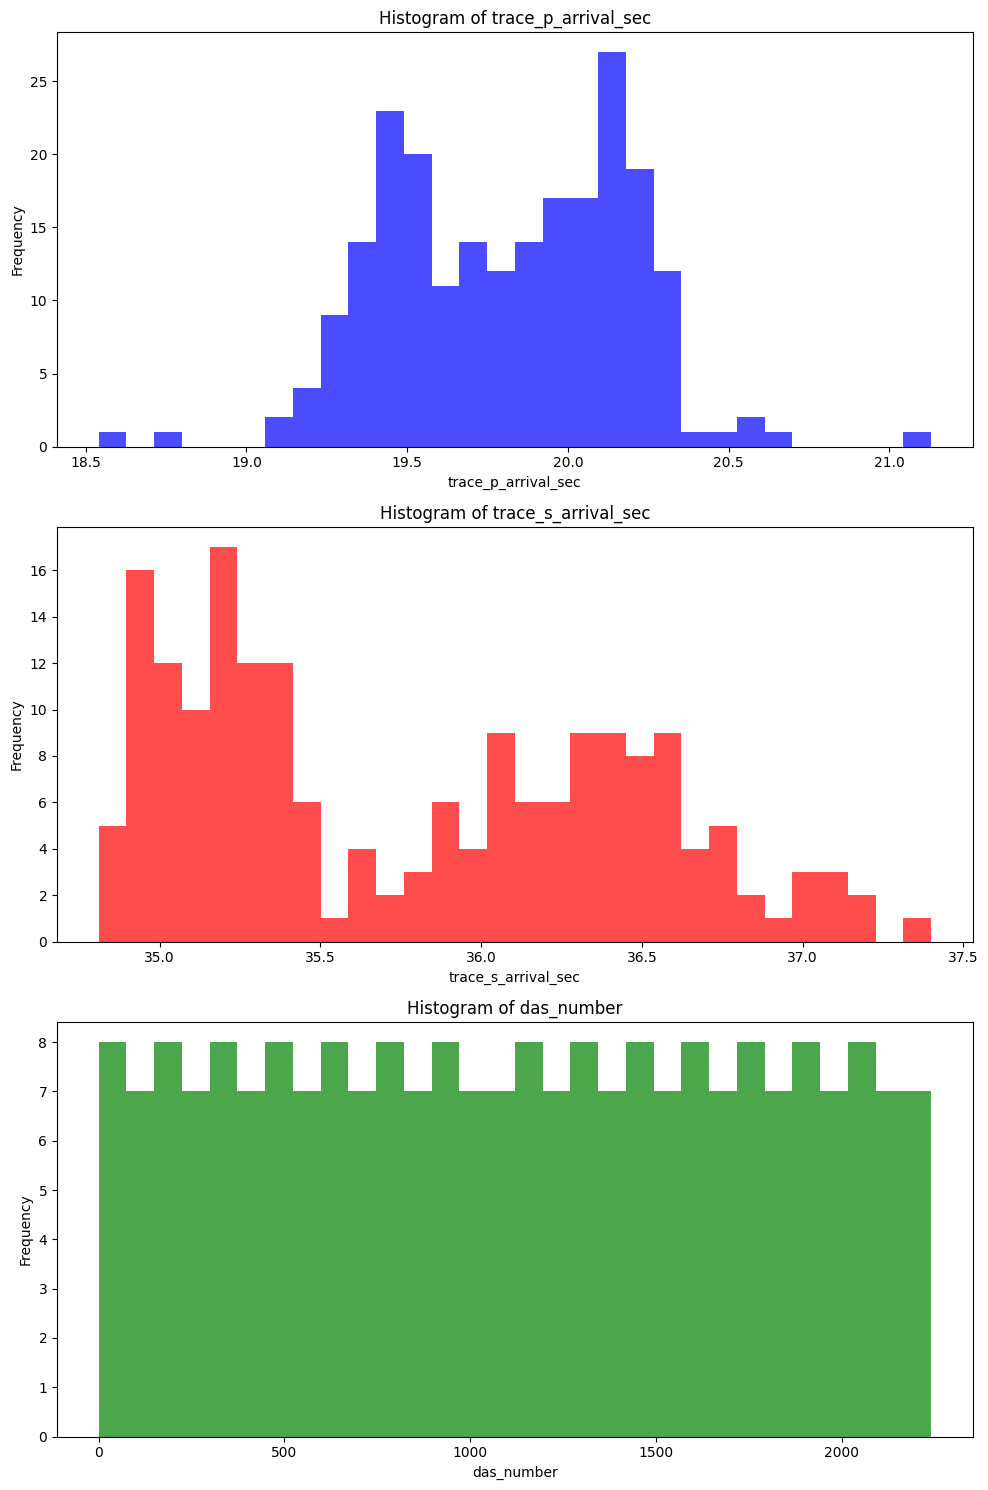

In [892]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(dropped_dataset['trace_p_arrival_sec'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(dropped_dataset['trace_s_arrival_sec'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')

# Histogram for das_number
axes[2].hist(pd.to_numeric(dropped_dataset['das_number'], errors='coerce').dropna(), bins=30, color='green', alpha=0.7)
axes[2].set_title('Histogram of das_number')
axes[2].set_xlabel('das_number')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

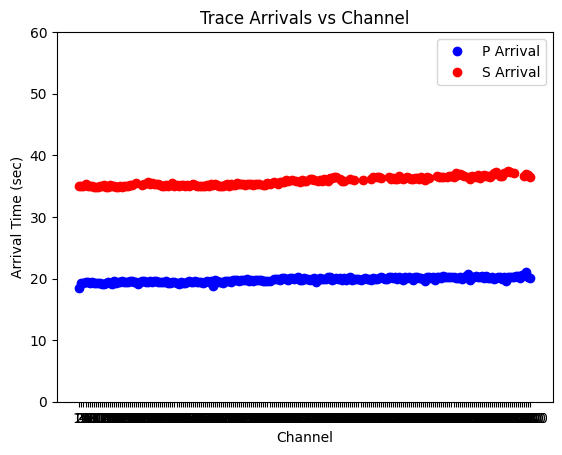

In [893]:
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

In [894]:
p_dataset
#convert das_number column to int
p_dataset['das_number'] = p_dataset['das_number'].astype(float)
s_dataset['das_number'] = s_dataset['das_number'].astype(float)
p_dataset['trace_p_arrival_sec'] = p_dataset['trace_p_arrival_sec'].astype(float)
s_dataset['trace_s_arrival_sec'] = s_dataset['trace_s_arrival_sec'].astype(float)



C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['das_number'] = p_dataset['das_number'].astype(float)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['das_number'] = s_dataset['das_number'].astype(float)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [895]:

#is there nans in p_dataset["trace_[arrival_sec"]"]
p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
print(p_dataset["trace_p_arrival_sec"].isna())


5        False
100      False
195      False
290      False
385      False
         ...  
20810    False
20905    False
21095    False
21190    False
21285    False
Name: trace_p_arrival_sec, Length: 223, dtype: bool


C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\620326073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)


In [896]:
print(p_dataset["das_number"].dtype)
print(p_dataset["trace_p_arrival_sec"].dtype)
print(s_dataset["das_number"].dtype)
print(s_dataset["trace_s_arrival_sec"].dtype)


float64
float64
float64
float64


In [897]:
print(p_dataset["das_number"].values)
print(p_dataset["trace_p_arrival_sec"].values)
print(s_dataset["das_number"].values)
print(s_dataset["trace_s_arrival_sec"].values)


[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.
  120.  130.  140.  150.  160.  170.  180.  190.  200.  210.  220.  230.
  240.  250.  260.  270.  280.  290.  300.  310.  320.  330.  340.  350.
  360.  370.  380.  390.  400.  410.  420.  430.  440.  450.  460.  470.
  480.  490.  500.  510.  520.  530.  540.  550.  560.  570.  580.  590.
  600.  610.  620.  630.  640.  650.  660.  670.  680.  690.  700.  710.
  720.  730.  740.  750.  760.  770.  780.  790.  800.  810.  820.  830.
  840.  850.  860.  870.  880.  890.  900.  910.  920.  930.  940.  960.
  970.  980.  990. 1000. 1010. 1020. 1030. 1040. 1050. 1060. 1070. 1080.
 1090. 1100. 1110. 1120. 1130. 1140. 1150. 1160. 1170. 1180. 1190. 1200.
 1210. 1220. 1230. 1240. 1250. 1260. 1270. 1280. 1290. 1300. 1310. 1320.
 1330. 1340. 1350. 1360. 1370. 1380. 1390. 1400. 1410. 1420. 1430. 1440.
 1450. 1460. 1470. 1480. 1490. 1500. 1510. 1520. 1530. 1540. 1550. 1560.
 1570. 1580. 1590. 1600. 1610. 1620. 1630. 1640. 16

In [898]:
import numpy as np
import matplotlib.pyplot as plt

# Fit individual polynomials for p_dataset and s_dataset
p_coeffs_individual = np.polyfit(p_dataset['das_number'].values, p_dataset['trace_p_arrival_sec'].values, deg=1)
s_coeffs_individual = np.polyfit(s_dataset['das_number'].values, s_dataset['trace_s_arrival_sec'].values, deg=1)

# # Calculate the trends
p_trend_individual = np.polyval(p_coeffs_individual, pd.to_numeric(p_dataset['das_number']))
s_trend_individual = np.polyval(s_coeffs_individual, pd.to_numeric(s_dataset['das_number']))

# # Detrend by subtracting the individual trends
p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual



C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\25613787.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\25613787.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual


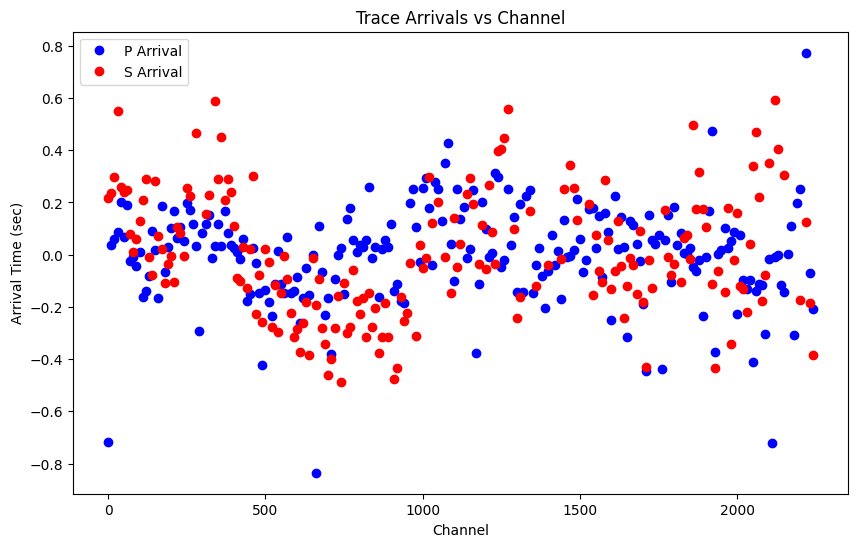

In [899]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_detrended'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_detrended'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.legend()
# Set the number of ticks to 5
plt.gca().xaxis.set_major_locator(MaxNLocator(5))

Text(0, 0.5, 'Frequency')

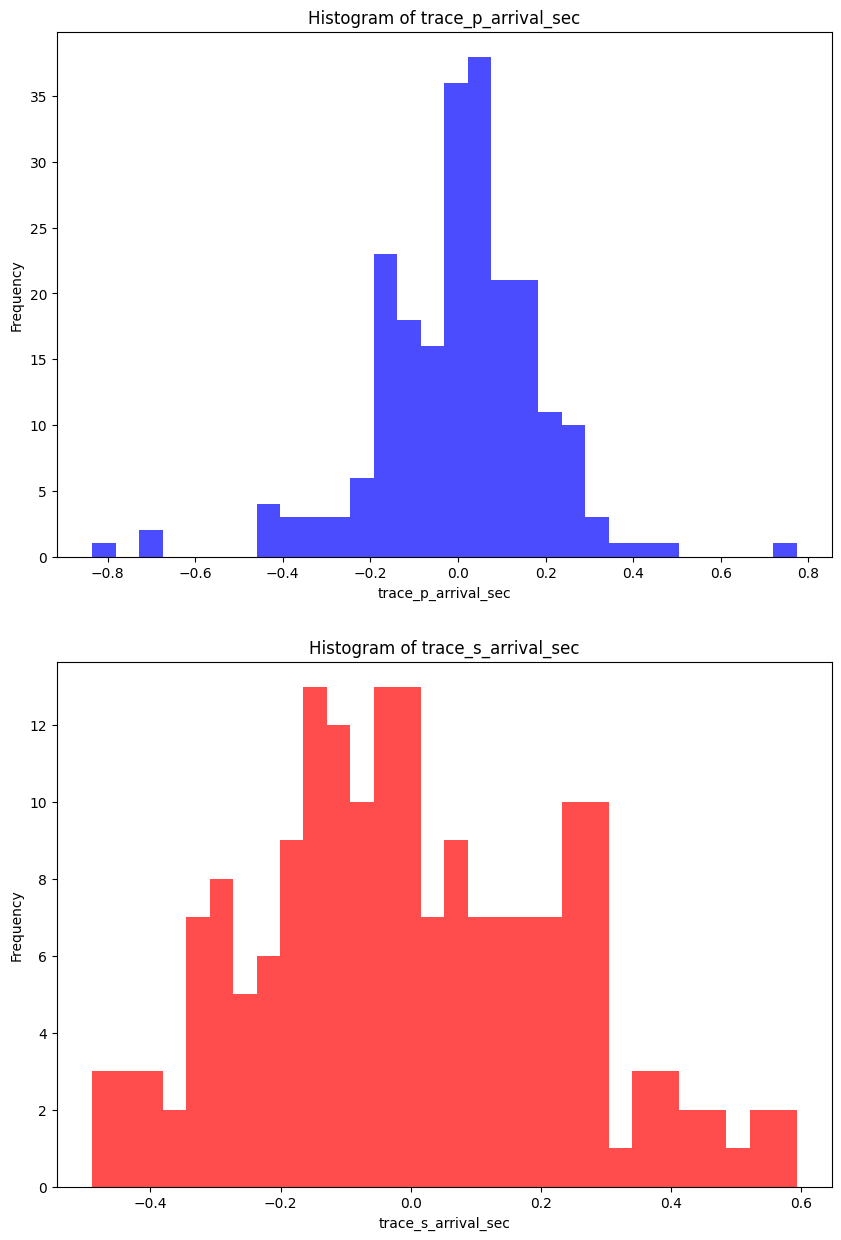

In [900]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(p_dataset['trace_p_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(s_dataset['trace_s_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')


In [901]:
#calculate 2 standard deviations from the mean for the trace_p_arrival_sec and trace_s_arrival_sec columns
p_dataset_mean = p_dataset['trace_p_arrival_sec_detrended'].mean()
p_dataset_std = p_dataset['trace_p_arrival_sec_detrended'].std()
p_dataset_2std = 2 * p_dataset_std

print(p_dataset_mean)
print(p_dataset_std)
print(p_dataset_2std)



-2.995112877195041e-15
0.18884427863082526
0.3776885572616505


In [902]:
# do it for s_dataset
s_dataset_mean = s_dataset['trace_s_arrival_sec_detrended'].mean()
s_dataset_std = s_dataset['trace_s_arrival_sec_detrended'].std()
s_dataset_2std = 2 * s_dataset_std

print(s_dataset_mean)
print(s_dataset_std)
print(s_dataset_2std)

9.157261995624821e-15
0.23637622431069955
0.4727524486213991


In [903]:
#save values for index which are greater than 2 standard deviations from the mean for the trace_p_arrival_sec column
p_dataset_outliers = p_dataset[(p_dataset['trace_p_arrival_sec_detrended'].values > p_dataset_2std) | 
                               (p_dataset['trace_p_arrival_sec_detrended'].values < -p_dataset_2std)]

p_dataset_outliers

#replace p_dataset trace_p_arrival_sec and trace_p_arrival_sec_detrended with Nans for the das_number values that occur in p_dataset_outliers
p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec'] = np.nan
p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec_detrended'] = np.nan


#find the columns that are Nans
p_dataset[p_dataset['trace_p_arrival_sec'].isna()]

trace_p_arrival_sec  das_number  trace_p_arrival_sec_detrended
5                      NaN         0.0                            NaN
4660                   NaN       490.0                            NaN
6275                   NaN       660.0                            NaN
6750                   NaN       710.0                            NaN
10265                  NaN      1080.0                            NaN
16250                  NaN      1710.0                            NaN
16725                  NaN      1760.0                            NaN
18245                  NaN      1920.0                            NaN
19480                  NaN      2050.0                            NaN
20050                  NaN      2110.0                            NaN
21095                  NaN      2220.0                            NaN

In [904]:
# Save values for index which are greater than 2 standard deviations from the mean for the trace_s_arrival_sec column
s_dataset_outliers = s_dataset[(s_dataset['trace_s_arrival_sec_detrended'].values > s_dataset_2std) | 
                               (s_dataset['trace_s_arrival_sec_detrended'].values < -s_dataset_2std)]

s_dataset_outliers

# Replace s_dataset trace_s_arrival_sec and trace_s_arrival_sec_detrended with NaNs for the das_number values that occur in s_dataset_outliers
s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec'] = np.nan
s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec_detrended'] = np.nan

# Find the columns that are NaNs
s_dataset[s_dataset['trace_s_arrival_sec'].isna()]


trace_s_arrival_sec  das_number  trace_s_arrival_sec_detrended
290                    NaN        30.0                            NaN
3235                   NaN       340.0                            NaN
7035                   NaN       740.0                            NaN
8650                   NaN       910.0                            NaN
12070                  NaN      1270.0                            NaN
17675                  NaN      1860.0                            NaN
20145                  NaN      2120.0                            NaN

Text(0, 0.5, 'Frequency')

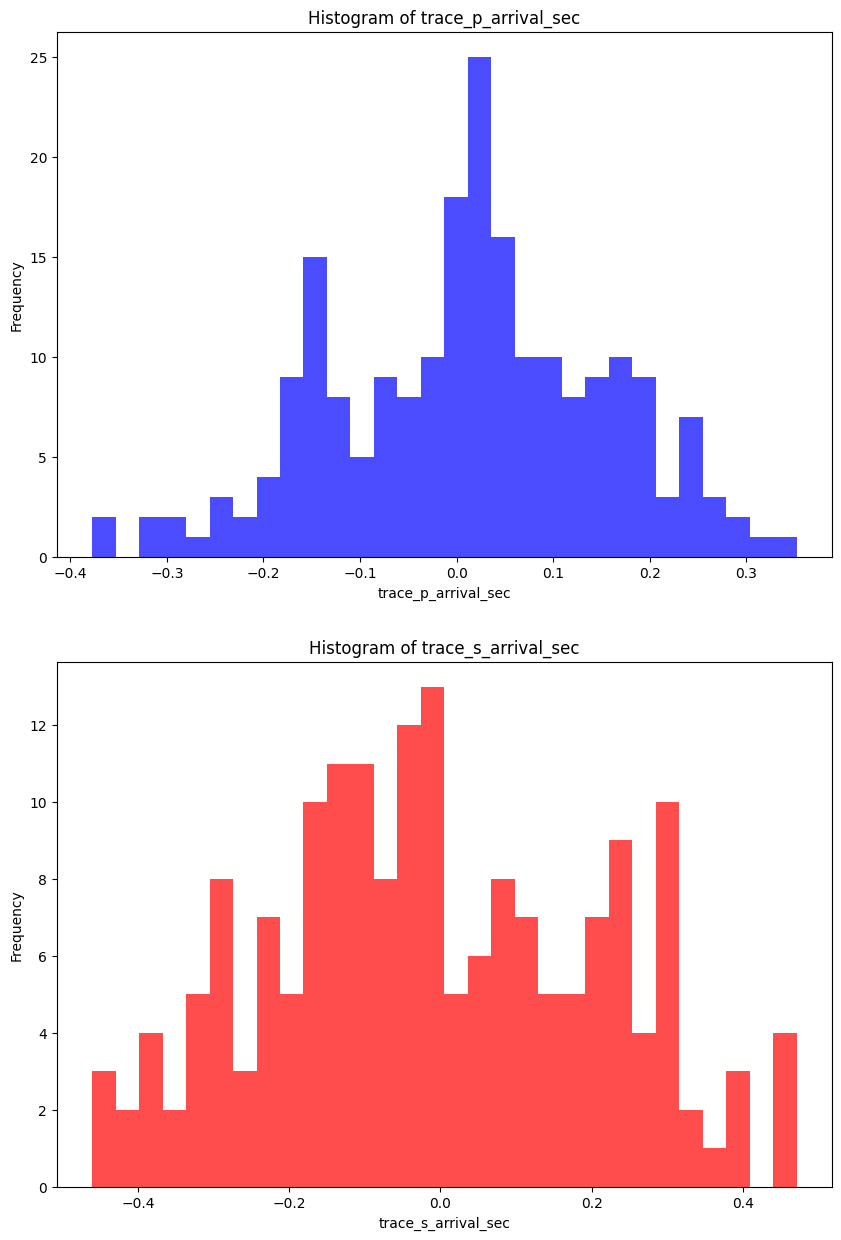

In [905]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(p_dataset['trace_p_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(s_dataset['trace_s_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')

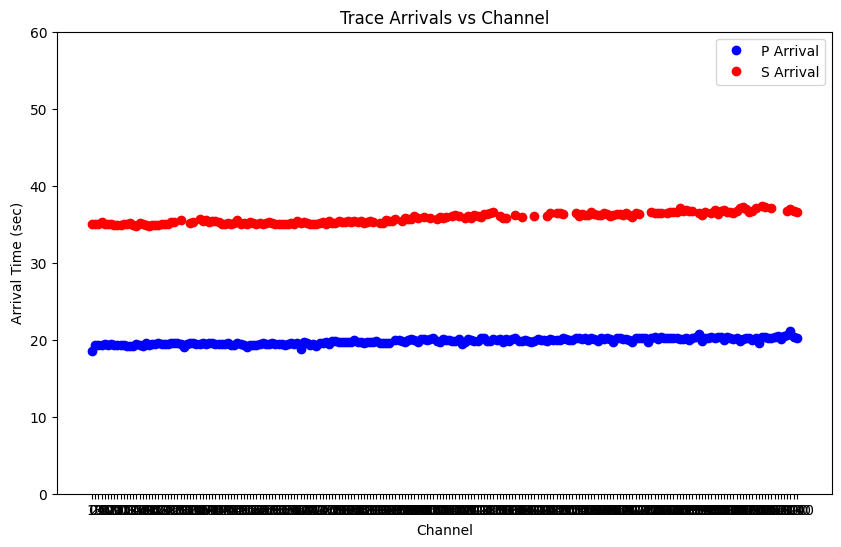

In [906]:
#original
plt.figure(figsize=(10, 6))


plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

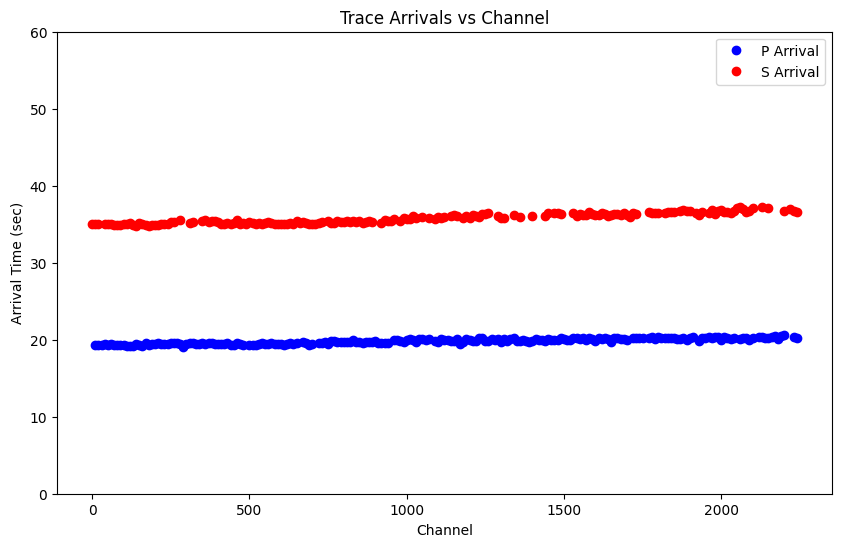

In [907]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

In [908]:
#interpolate the missing values from the p_outliers and s_outliers dataframes using the interpolate function
p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()

s_dataset


C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\3394753993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\3394753993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()


trace_s_arrival_sec  das_number  trace_s_arrival_sec_detrended  \
5                34.970001         0.0                       0.217516   
100              35.000000        10.0                       0.237825   
195              35.070000        20.0                       0.298134   
290                    NaN        30.0                            NaN   
385              35.049999        40.0                       0.258752   
...                    ...         ...                            ...   
20430            37.139999      2150.0                       0.304008   
20905            36.709999      2200.0                      -0.174446   
21095            37.029999      2220.0                       0.126173   
21190            36.730000      2230.0                      -0.183517   
21285            36.540001      2240.0                      -0.383207   

       trace_s_arrival_sec_interpolated  
5                             34.970001  
100                           35.000000  
195                           35.070000  
290                           35.059999  
385                           35.049999  
...                                 ...  
20430                         37.139999  
20905                         36.709999  
21095                         37.029999  
21190                         36.730000  
21285                         36.540001  

[187 rows x 4 columns]

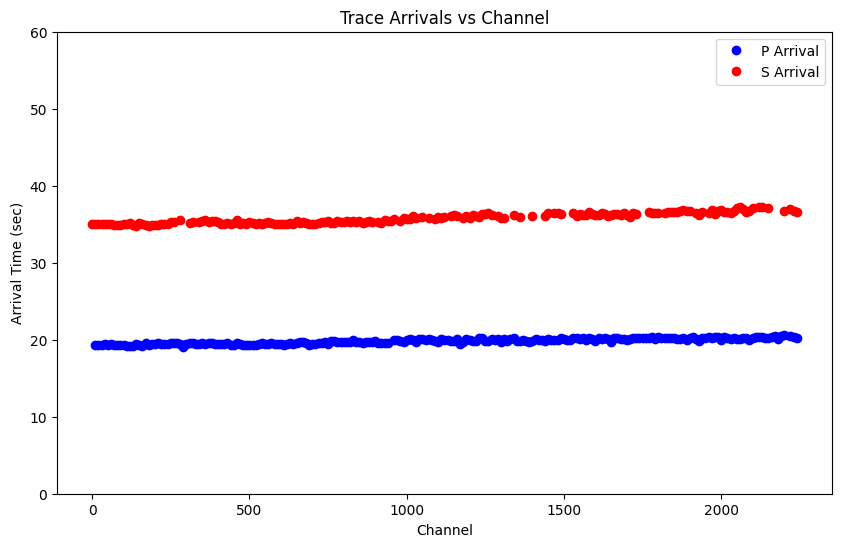

In [909]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

#### Interpolation 2

In [910]:
#find min and max das_number for p_dataset and s_dataset
p_dataset_min = p_dataset['das_number'].min()
p_dataset_max = p_dataset['das_number'].max()
s_dataset_min = s_dataset['das_number'].min()
s_dataset_max = s_dataset['das_number'].max()

print(f"p_dataset das_number min: {p_dataset_min}, max: {p_dataset_max}")
print(f"s_dataset das_number min: {s_dataset_min}, max: {s_dataset_max}")

p_dataset das_number min: 0.0, max: 2240.0
s_dataset das_number min: 0.0, max: 2240.0


In [911]:
from numpy import arange

new_array = arange(0, 2241, 1)
new_array


array([   0,    1,    2, ..., 2238, 2239, 2240])

In [912]:
# Create a DataFrame with all possible das_number values from new_array
full_range_df = pd.DataFrame({'das_number': new_array})

# Merge with p_dataset and s_dataset to include missing values
p_dataset = full_range_df.merge(p_dataset, on='das_number', how='left')
s_dataset = full_range_df.merge(s_dataset, on='das_number', how='left')

#interpolate again to fill the missing values based on trace_p_arrivaL_sec_interpolated
p_dataset['trace_p_arrival_sec_interpolated2'] = p_dataset['trace_p_arrival_sec_interpolated'].interpolate()
p_dataset

#interpolate again to fill the missing values based on trace_s_arrivaL_sec_interpolated
s_dataset['trace_s_arrival_sec_interpolated2'] = s_dataset['trace_s_arrival_sec_interpolated'].interpolate()
#s_dataset


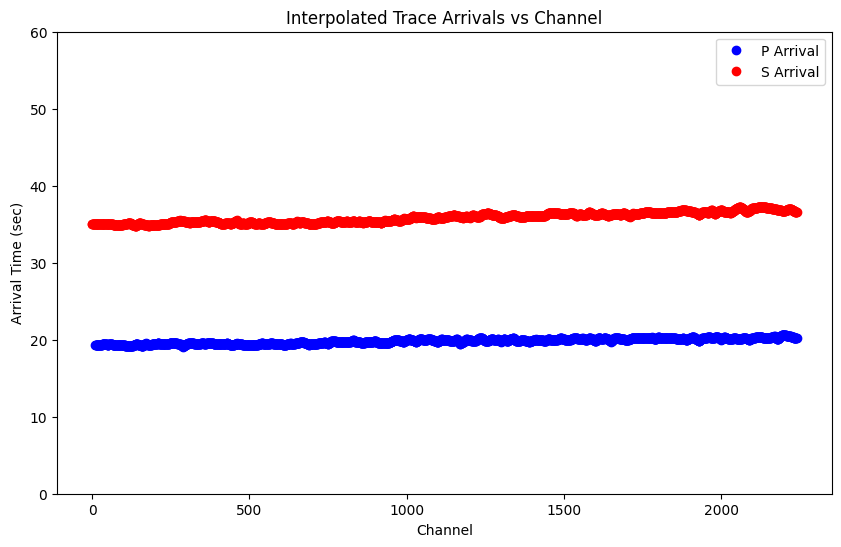

In [913]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated2'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated2'], 'o', color='red', label='S Arrival')

plt.title(f'Interpolated Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

#### File Creation

In [914]:
#create a 2D numpy array of zeros with dimensions (1500, 8530)
# Create a 2D numpy array of zeros with dimensions (1500, 8530)
#p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25
zeros = np.zeros((1500, 8530))

#convert the trace_p_arrival_sec_interpolated2 column to a numpy array and multiply by 25
p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25

#drop Nan values
p_dataset.dropna(subset=['Sample#', 'das_number'], inplace=True)

#match the sample# column and das_number columns to the zeros array with it (sample#, das_number) and assign 1 values to those points
for index, row in p_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        zeros[sample_number, das_number] = 1

#add 1 values each sample for 250 samples after the sample number for the s-wave 
for index, row in p_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        for i in range(1, 25 * p_arrival_mask + 1):
            if sample_number + i < 1500:
                zeros[sample_number + i, das_number] = 1

#save zeroes
np.save('F:/DAS/'+str(p_arrival_mask)+'/p/p-wave_2023_12_29T02_13_57_200000Z_'+str(p_arrival_mask)+'sec_filled.npy', zeros)

#save zeros as a csv file
#np.savetxt('F:/DAS/p-wave_2023-12-30_22.35.57_UTC.np', zeros, delimiter=',')


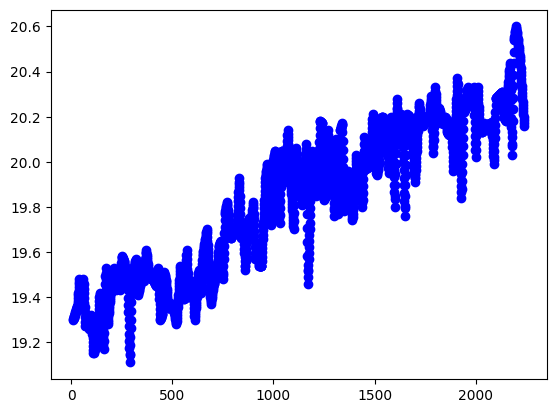

In [915]:
plt.plot(p_dataset["das_number"], p_dataset["trace_p_arrival_sec_interpolated2"], 'o', color='blue', label='P Arrival')



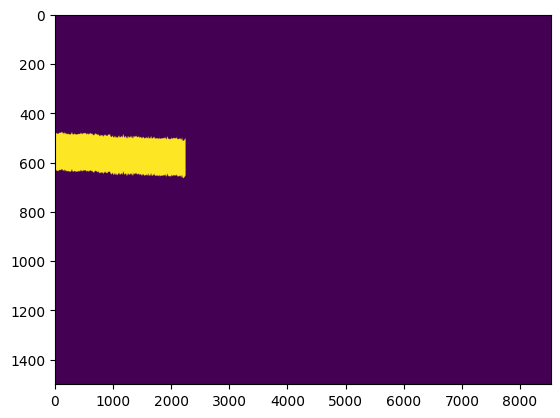

In [916]:
plt.imshow(zeros, aspect='auto')

In [917]:
#create a 2D numpy array of zeros with dimensions (1500, 8530)
# Create a 2D numpy array of zeros with dimensions (1500, 8530)
#p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25
zeros = np.zeros((1500, 8530))

#convert the trace_p_arrival_sec_interpolated2 column to a numpy array and multiply by 25
s_dataset["Sample#"] = s_dataset['trace_s_arrival_sec_interpolated2']*25

#drop Nan values
s_dataset.dropna(subset=['Sample#', 'das_number'], inplace=True)

#match the sample# column and das_number columns to the zeros array with it (sample#, das_number) and assign 1 values to those points
for index, row in s_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        zeros[sample_number, das_number] = 1

#add 1 values each sample for 250 samples after the sample number for the s-wave 
for index, row in s_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        for i in range(1, 25 * s_arrival_mask + 1):
            if sample_number + i < 1500:
                zeros[sample_number + i, das_number] = 1

#save zeroes
np.save('F:/DAS/'+str(s_arrival_mask)+'/s/s-wave_2023_12_29T02_13_57_200000Z_'+str(s_arrival_mask)+'sec_filled.npy', zeros)

#save zeros as a csv file
#np.savetxt('F:/DAS/p-wave_2023-12-30_22.35.57_UTC.np', zeros, delimiter=',')


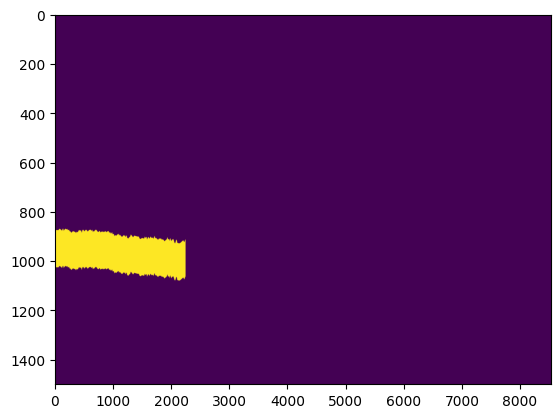

In [918]:
plt.imshow(zeros, aspect='auto')

In [919]:
# #turn previous section into a for loop to iterate through all the unique trace_start_times

# for i in unique_trace_start_times_dropped:
#     if i.strip() == '':
#         print(f"Skipping invalid trace_start_time: '{i}'")
#         continue
    
#     # Define directory and filename
#     # Convert i into a string with format YYYYMMDD_HHMMSS
#     name = str(i).replace(" ", "_").replace(":", "_").replace("-", "_").replace(".", "_")
    
#     directory = "F:/DAS/pick_plots_interpolated_20250401"
#     filename = str(name) + ".png"

#     # Combine directory and filename
#     filepath = os.path.join(directory, filename)

#     # Select the specific row based on the index
#     data = grouped_df_dropped.loc[i]

#     # Select specific columns from the row
#     dropped_dataset = data[['trace_p_arrival_sec', 'trace_s_arrival_sec', 'das_number']]
#     p_dataset = dropped_dataset[['trace_p_arrival_sec','das_number']]
#     s_dataset = dropped_dataset[['trace_s_arrival_sec','das_number']]

#     #drop Nans
#     p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
#     s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)
    
#     #convert das_number column to int
#     p_dataset['das_number'] = p_dataset['das_number'].astype(float)
#     s_dataset['das_number'] = s_dataset['das_number'].astype(float)
#     p_dataset['trace_p_arrival_sec'] = p_dataset['trace_p_arrival_sec'].astype(float)
#     s_dataset['trace_s_arrival_sec'] = s_dataset['trace_s_arrival_sec'].astype(float)

#     # Fit individual polynomials for p_dataset and s_dataset
#     p_coeffs_individual = np.polyfit(p_dataset['das_number'].values, p_dataset['trace_p_arrival_sec'].values, deg=1)
#     s_coeffs_individual = np.polyfit(s_dataset['das_number'].values, s_dataset['trace_s_arrival_sec'].values, deg=1)

#     # # Calculate the trends
#     p_trend_individual = np.polyval(p_coeffs_individual, pd.to_numeric(p_dataset['das_number']))
#     s_trend_individual = np.polyval(s_coeffs_individual, pd.to_numeric(s_dataset['das_number']))

#     #Detrend by subtracting the individual trends
#     p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
#     s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual

#     #calculate 2 standard deviations from the mean for the trace_p_arrival_sec and trace_s_arrival_sec columns
#     p_dataset_mean = p_dataset['trace_p_arrival_sec_detrended'].mean()
#     p_dataset_std = p_dataset['trace_p_arrival_sec_detrended'].std()
#     p_dataset_2std = 2 * p_dataset_std

#     # do it for s_dataset
#     s_dataset_mean = s_dataset['trace_s_arrival_sec_detrended'].mean()
#     s_dataset_std = s_dataset['trace_s_arrival_sec_detrended'].std()
#     s_dataset_2std = 2 * s_dataset_std
    
#     #save values for index which are greater than 2 standard deviations from the mean for the trace_p_arrival_sec column
#     p_dataset_outliers = p_dataset[(p_dataset['trace_p_arrival_sec_detrended'].values > p_dataset_2std) | 
#                                    (p_dataset['trace_p_arrival_sec_detrended'].values < -p_dataset_2std)]

#     #replace p_dataset trace_p_arrival_sec and trace_p_arrival_sec_detrended with Nans for the das_number values that occur in p_dataset_outliers
#     p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec'] = np.nan
#     p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec_detrended'] = np.nan

#     # Save values for index which are greater than 2 standard deviations from the mean for the trace_s_arrival_sec column
#     s_dataset_outliers = s_dataset[(s_dataset['trace_s_arrival_sec_detrended'].values > s_dataset_2std) | 
#                                    (s_dataset['trace_s_arrival_sec_detrended'].values < -s_dataset_2std)]

#     # Replace s_dataset trace_s_arrival_sec and trace_s_arrival_sec_detrended with NaNs for the das_number values that occur in s_dataset_outliers
#     s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec'] = np.nan
#     s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec_detrended'] = np.nan

#     #interpolate the missing values from the p_outliers and s_outliers dataframes using the interpolate function
#     p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
#     s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()

#     new_array = arange(1, 10000, 1)

#     # Create a DataFrame with all possible das_number values from new_array
#     full_range_df = pd.DataFrame({'das_number': new_array})

#     # Merge with p_dataset and s_dataset to include missing values
#     p_dataset = full_range_df.merge(p_dataset, on='das_number', how='left')
#     s_dataset = full_range_df.merge(s_dataset, on='das_number', how='left')

#     #interpolate again to fill the missing values based on trace_p_arrivaL_sec_interpolated
#     p_dataset['trace_p_arrival_sec_interpolated2'] = p_dataset['trace_p_arrival_sec_interpolated'].interpolate()

#     #interpolate again to fill the missing values based on trace_s_arrivaL_sec_interpolated
#     s_dataset['trace_s_arrival_sec_interpolated2'] = s_dataset['trace_s_arrival_sec_interpolated'].interpolate()

#     # Plot the interpolated values
#     plt.figure(figsize=(10, 6))
  
#     plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated2'], 'o', color='blue', label='P Arrival')
#     plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated2'], 'o', color='red', label='S Arrival')

#     plt.title(f'Interpolated Trace Arrivals vs Channel for {i}')
#     plt.xlabel('Channel')
#     plt.ylabel('Arrival Time (sec)')
#     plt.ylim(0, 60)
#     plt.legend()

#     # Set the number of ticks to 5
#     plt.gca().xaxis.set_major_locator(MaxNLocator(5))
#     plt.savefig(filepath)
#     plt.close()

### 2023_12_30T22_35_56_880000Z

#### Background

In [920]:
# Select the specific row based on the index
data_2023_12_30 = grouped_df_dropped.loc['2023-12-30T22:35:56.880000Z']

# Select specific columns from the row
dropped_dataset = data_2023_12_30[['trace_p_arrival_sec', 'trace_s_arrival_sec', 'das_number']]
p_dataset = dropped_dataset[['trace_p_arrival_sec','das_number']]
s_dataset = dropped_dataset[['trace_s_arrival_sec','das_number']]


In [921]:
p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)

C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\751016926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\751016926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)


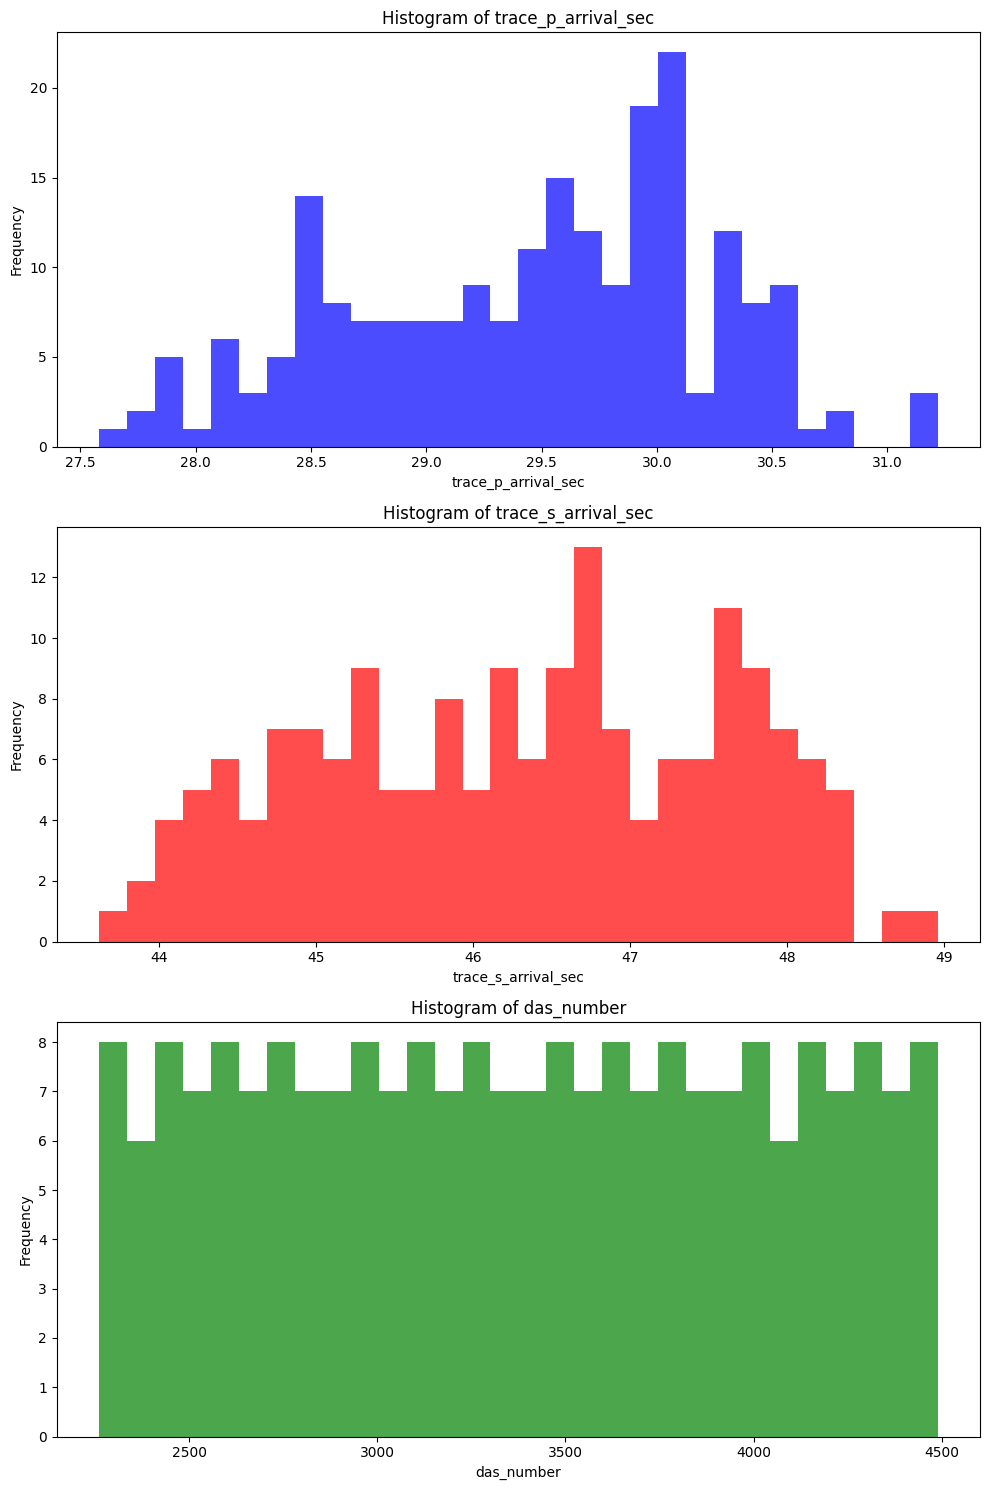

In [922]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(dropped_dataset['trace_p_arrival_sec'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(dropped_dataset['trace_s_arrival_sec'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')

# Histogram for das_number
axes[2].hist(pd.to_numeric(dropped_dataset['das_number'], errors='coerce').dropna(), bins=30, color='green', alpha=0.7)
axes[2].set_title('Histogram of das_number')
axes[2].set_xlabel('das_number')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

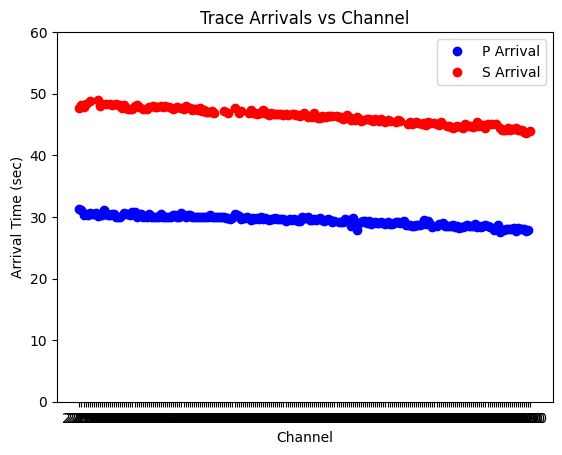

In [923]:
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

In [924]:
p_dataset
#convert das_number column to int
p_dataset['das_number'] = p_dataset['das_number'].astype(float)
s_dataset['das_number'] = s_dataset['das_number'].astype(float)
p_dataset['trace_p_arrival_sec'] = p_dataset['trace_p_arrival_sec'].astype(float)
s_dataset['trace_s_arrival_sec'] = s_dataset['trace_s_arrival_sec'].astype(float)



C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['das_number'] = p_dataset['das_number'].astype(float)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['das_number'] = s_dataset['das_number'].astype(float)
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\2963224887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [925]:

#is there nans in p_dataset["trace_[arrival_sec"]"]
p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
print(p_dataset["trace_p_arrival_sec"].isna())


21471    False
21566    False
21661    False
21756    False
21851    False
         ...  
42181    False
42276    False
42371    False
42466    False
42561    False
Name: trace_p_arrival_sec, Length: 215, dtype: bool


C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\620326073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)


In [926]:
print(p_dataset["das_number"].dtype)
print(p_dataset["trace_p_arrival_sec"].dtype)
print(s_dataset["das_number"].dtype)
print(s_dataset["trace_s_arrival_sec"].dtype)


float64
float64
float64
float64


In [927]:
print(p_dataset["das_number"].values)
print(p_dataset["trace_p_arrival_sec"].values)
print(s_dataset["das_number"].values)
print(s_dataset["trace_s_arrival_sec"].values)


[2260. 2270. 2280. 2290. 2300. 2310. 2320. 2330. 2350. 2360. 2370. 2380.
 2390. 2400. 2410. 2420. 2430. 2440. 2450. 2460. 2470. 2490. 2500. 2510.
 2520. 2530. 2540. 2550. 2560. 2570. 2580. 2590. 2600. 2610. 2620. 2630.
 2640. 2650. 2660. 2670. 2680. 2690. 2700. 2710. 2720. 2730. 2740. 2750.
 2760. 2770. 2780. 2790. 2800. 2810. 2820. 2830. 2840. 2850. 2860. 2870.
 2880. 2890. 2900. 2910. 2920. 2930. 2940. 2950. 2960. 2970. 2980. 2990.
 3000. 3010. 3020. 3030. 3040. 3050. 3060. 3070. 3080. 3090. 3100. 3110.
 3120. 3130. 3140. 3150. 3160. 3170. 3180. 3190. 3200. 3210. 3220. 3230.
 3240. 3250. 3260. 3270. 3280. 3290. 3300. 3310. 3320. 3330. 3340. 3350.
 3360. 3370. 3380. 3390. 3400. 3410. 3420. 3430. 3440. 3450. 3460. 3470.
 3480. 3490. 3500. 3510. 3520. 3540. 3550. 3560. 3570. 3580. 3590. 3600.
 3610. 3620. 3630. 3640. 3650. 3660. 3670. 3680. 3690. 3700. 3710. 3720.
 3730. 3740. 3750. 3760. 3770. 3780. 3790. 3800. 3810. 3820. 3830. 3840.
 3850. 3860. 3870. 3880. 3890. 3900. 3910. 3920. 39

In [928]:
import numpy as np
import matplotlib.pyplot as plt

# Fit individual polynomials for p_dataset and s_dataset
p_coeffs_individual = np.polyfit(p_dataset['das_number'].values, p_dataset['trace_p_arrival_sec'].values, deg=1)
s_coeffs_individual = np.polyfit(s_dataset['das_number'].values, s_dataset['trace_s_arrival_sec'].values, deg=1)

# # Calculate the trends
p_trend_individual = np.polyval(p_coeffs_individual, pd.to_numeric(p_dataset['das_number']))
s_trend_individual = np.polyval(s_coeffs_individual, pd.to_numeric(s_dataset['das_number']))

# # Detrend by subtracting the individual trends
p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual



C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\25613787.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\25613787.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual


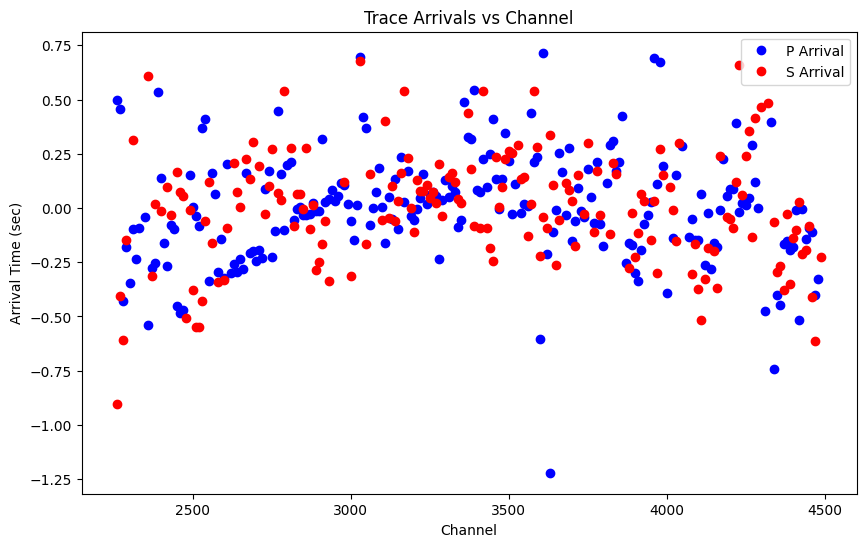

In [929]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_detrended'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_detrended'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.legend()
# Set the number of ticks to 5
plt.gca().xaxis.set_major_locator(MaxNLocator(5))

Text(0, 0.5, 'Frequency')

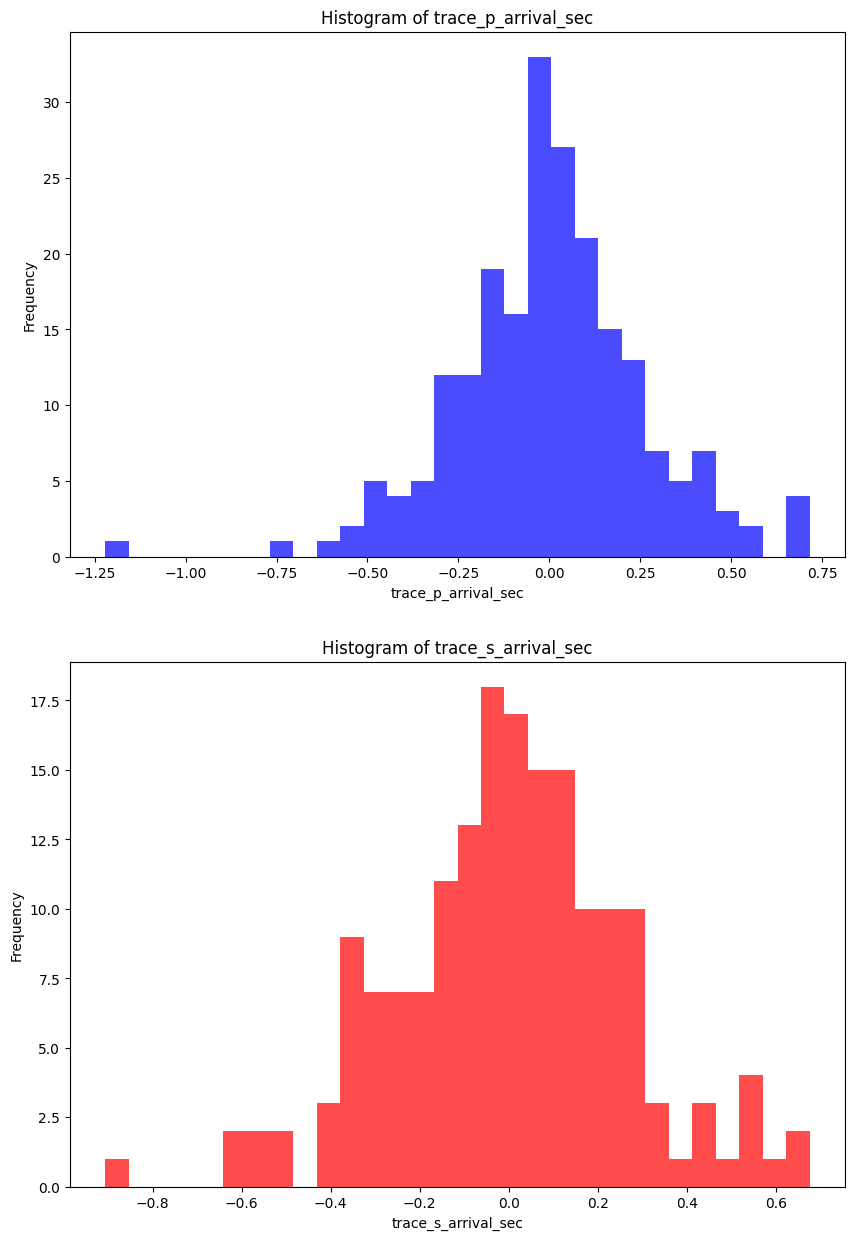

In [930]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(p_dataset['trace_p_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(s_dataset['trace_s_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')


In [931]:
#calculate 2 standard deviations from the mean for the trace_p_arrival_sec and trace_s_arrival_sec columns
p_dataset_mean = p_dataset['trace_p_arrival_sec_detrended'].mean()
p_dataset_std = p_dataset['trace_p_arrival_sec_detrended'].std()
p_dataset_2std = 2 * p_dataset_std

print(p_dataset_mean)
print(p_dataset_std)
print(p_dataset_2std)



-2.5596062737032446e-14
0.25980385989905425
0.5196077197981085


In [932]:
# do it for s_dataset
s_dataset_mean = s_dataset['trace_s_arrival_sec_detrended'].mean()
s_dataset_std = s_dataset['trace_s_arrival_sec_detrended'].std()
s_dataset_2std = 2 * s_dataset_std

print(s_dataset_mean)
print(s_dataset_std)
print(s_dataset_2std)

2.3684757858670007e-14
0.2593235053967832
0.5186470107935665


In [933]:
#save values for index which are greater than 2 standard deviations from the mean for the trace_p_arrival_sec column
p_dataset_outliers = p_dataset[(p_dataset['trace_p_arrival_sec_detrended'].values > p_dataset_2std) | 
                               (p_dataset['trace_p_arrival_sec_detrended'].values < -p_dataset_2std)]

p_dataset_outliers

#replace p_dataset trace_p_arrival_sec and trace_p_arrival_sec_detrended with Nans for the das_number values that occur in p_dataset_outliers
p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec'] = np.nan
p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec_detrended'] = np.nan


#find the columns that are Nans
p_dataset[p_dataset['trace_p_arrival_sec'].isna()]

trace_p_arrival_sec  das_number  trace_p_arrival_sec_detrended
22421                  NaN      2360.0                            NaN
22706                  NaN      2390.0                            NaN
28786                  NaN      3030.0                            NaN
32206                  NaN      3390.0                            NaN
34201                  NaN      3600.0                            NaN
34296                  NaN      3610.0                            NaN
34486                  NaN      3630.0                            NaN
37621                  NaN      3960.0                            NaN
37811                  NaN      3980.0                            NaN
41231                  NaN      4340.0                            NaN

In [934]:
# Save values for index which are greater than 2 standard deviations from the mean for the trace_s_arrival_sec column
s_dataset_outliers = s_dataset[(s_dataset['trace_s_arrival_sec_detrended'].values > s_dataset_2std) | 
                               (s_dataset['trace_s_arrival_sec_detrended'].values < -s_dataset_2std)]

s_dataset_outliers

# Replace s_dataset trace_s_arrival_sec and trace_s_arrival_sec_detrended with NaNs for the das_number values that occur in s_dataset_outliers
s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec'] = np.nan
s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec_detrended'] = np.nan

# Find the columns that are NaNs
s_dataset[s_dataset['trace_s_arrival_sec'].isna()]


trace_s_arrival_sec  das_number  trace_s_arrival_sec_detrended
21471                  NaN      2260.0                            NaN
21661                  NaN      2280.0                            NaN
22421                  NaN      2360.0                            NaN
23846                  NaN      2510.0                            NaN
23941                  NaN      2520.0                            NaN
26506                  NaN      2790.0                            NaN
28786                  NaN      3030.0                            NaN
30116                  NaN      3170.0                            NaN
32491                  NaN      3420.0                            NaN
34011                  NaN      3580.0                            NaN
40186                  NaN      4230.0                            NaN
42466                  NaN      4470.0                            NaN

Text(0, 0.5, 'Frequency')

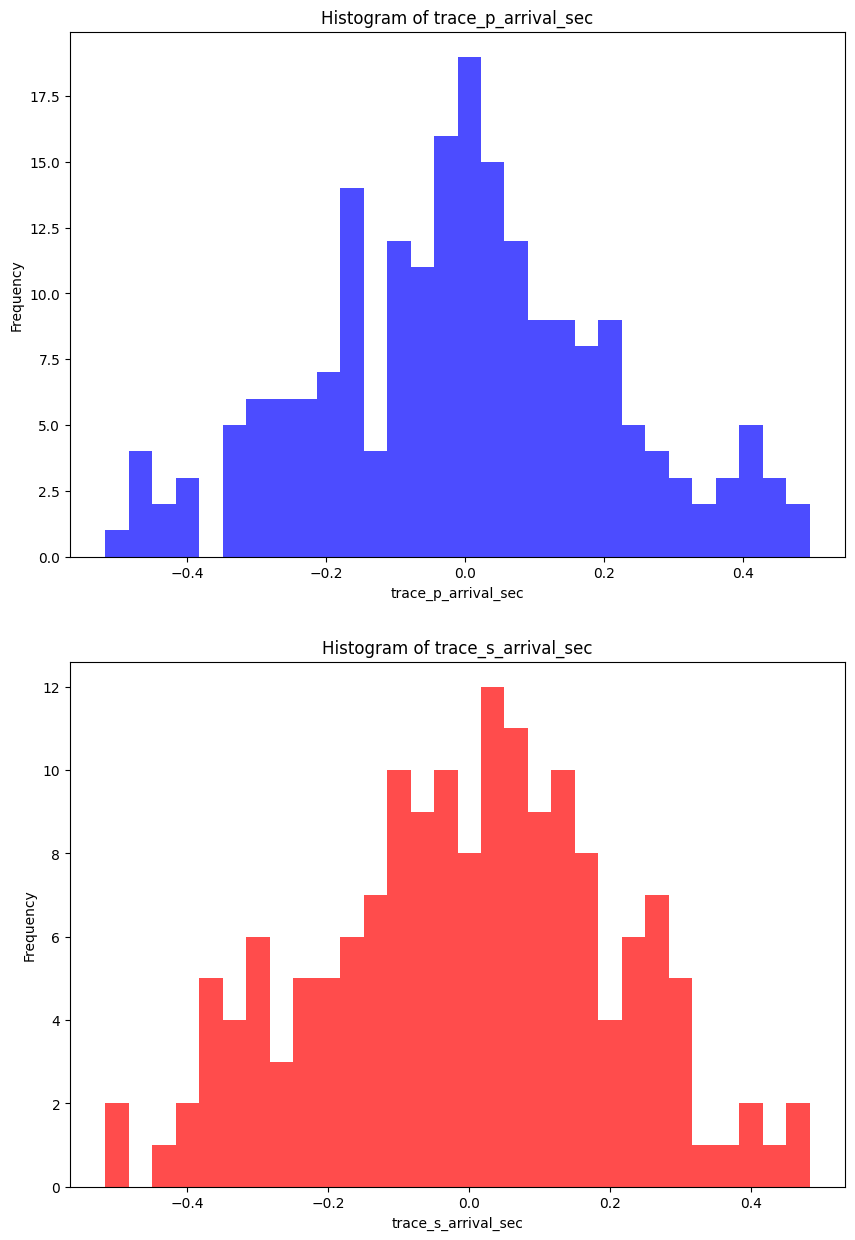

In [935]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(p_dataset['trace_p_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(s_dataset['trace_s_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')

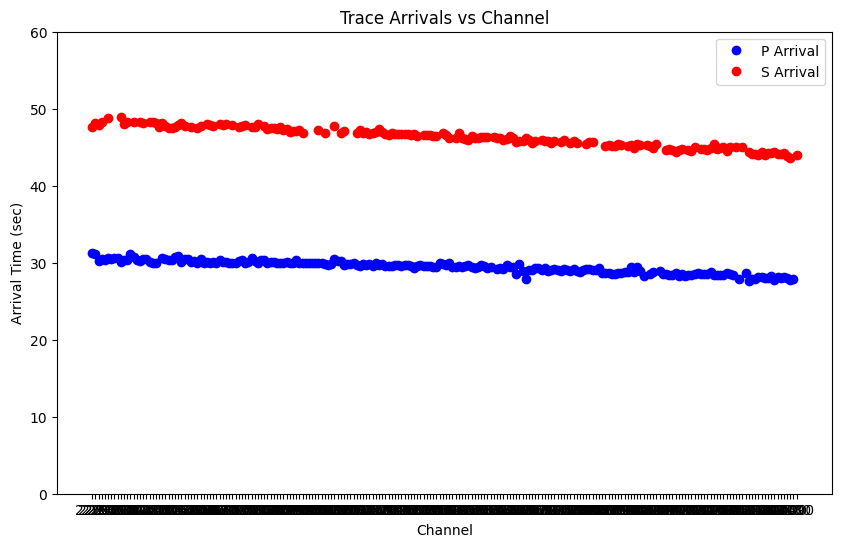

In [936]:
#original
plt.figure(figsize=(10, 6))


plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

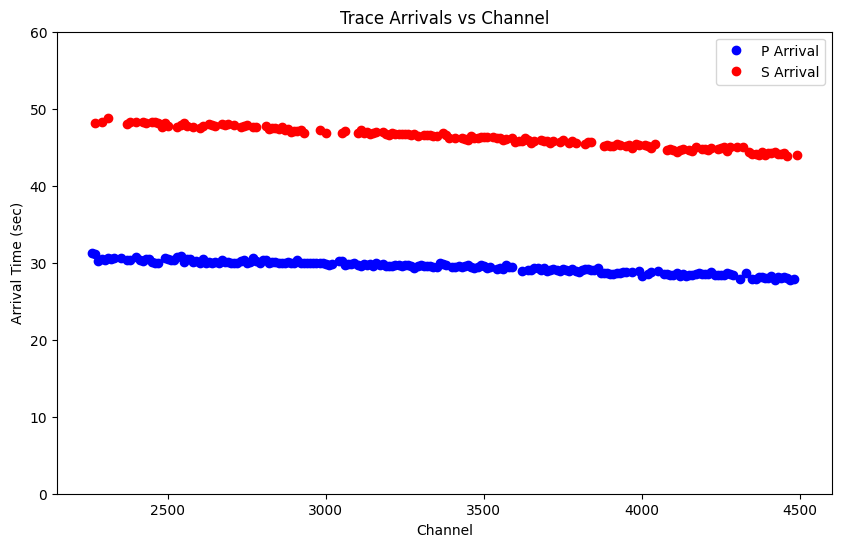

In [937]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

In [938]:
#interpolate the missing values from the p_outliers and s_outliers dataframes using the interpolate function
p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()

s_dataset


C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\3394753993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
C:\Users\alexa\AppData\Local\Temp\ipykernel_12808\3394753993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()


trace_s_arrival_sec  das_number  trace_s_arrival_sec_detrended  \
21471                  NaN      2260.0                            NaN   
21566            48.119999      2270.0                      -0.406632   
21661                  NaN      2280.0                            NaN   
21756            48.340000      2290.0                      -0.147600   
21946            48.759998      2310.0                       0.311429   
...                    ...         ...                            ...   
42181            44.099998      4440.0                      -0.191789   
42276            44.189999      4450.0                      -0.082273   
42371            43.840000      4460.0                      -0.412756   
42466                  NaN      4470.0                            NaN   
42656            43.970001      4490.0                      -0.224209   

       trace_s_arrival_sec_interpolated  
21471                               NaN  
21566                         48.119999  
21661                         48.229999  
21756                         48.340000  
21946                         48.759998  
...                                 ...  
42181                         44.099998  
42276                         44.189999  
42371                         43.840000  
42466                         43.905000  
42656                         43.970001  

[174 rows x 4 columns]

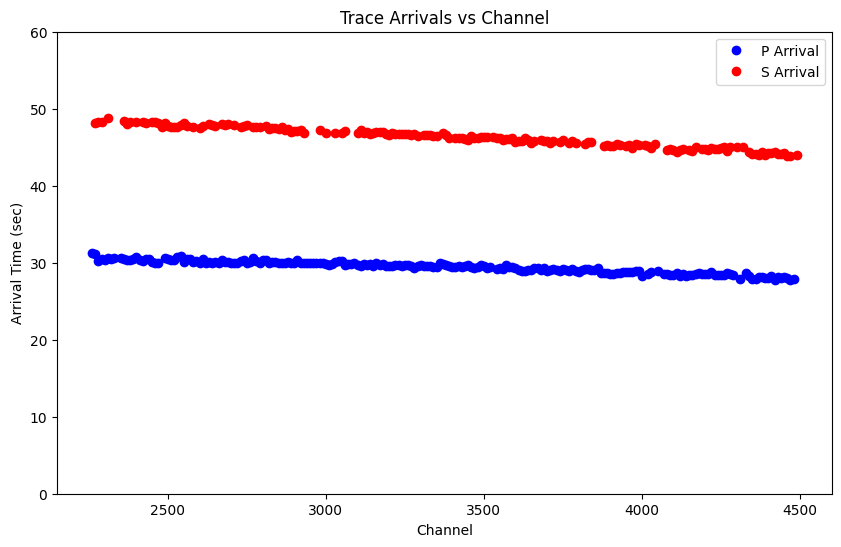

In [939]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

#### Interpolation 2

In [940]:
#find min and max das_number for p_dataset and s_dataset
p_dataset_min = p_dataset['das_number'].min()
p_dataset_max = p_dataset['das_number'].max()
s_dataset_min = s_dataset['das_number'].min()
s_dataset_max = s_dataset['das_number'].max()

print(f"p_dataset das_number min: {p_dataset_min}, max: {p_dataset_max}")
print(f"s_dataset das_number min: {s_dataset_min}, max: {s_dataset_max}")

p_dataset das_number min: 2260.0, max: 4480.0
s_dataset das_number min: 2260.0, max: 4490.0


In [941]:
from numpy import arange

new_array = arange(2260, 4491, 1)
new_array


array([2260, 2261, 2262, ..., 4488, 4489, 4490])

In [942]:
# Create a DataFrame with all possible das_number values from new_array
full_range_df = pd.DataFrame({'das_number': new_array})

# Merge with p_dataset and s_dataset to include missing values
p_dataset = full_range_df.merge(p_dataset, on='das_number', how='left')
s_dataset = full_range_df.merge(s_dataset, on='das_number', how='left')

#interpolate again to fill the missing values based on trace_p_arrivaL_sec_interpolated
p_dataset['trace_p_arrival_sec_interpolated2'] = p_dataset['trace_p_arrival_sec_interpolated'].interpolate()
p_dataset

#interpolate again to fill the missing values based on trace_s_arrivaL_sec_interpolated
s_dataset['trace_s_arrival_sec_interpolated2'] = s_dataset['trace_s_arrival_sec_interpolated'].interpolate()
#s_dataset


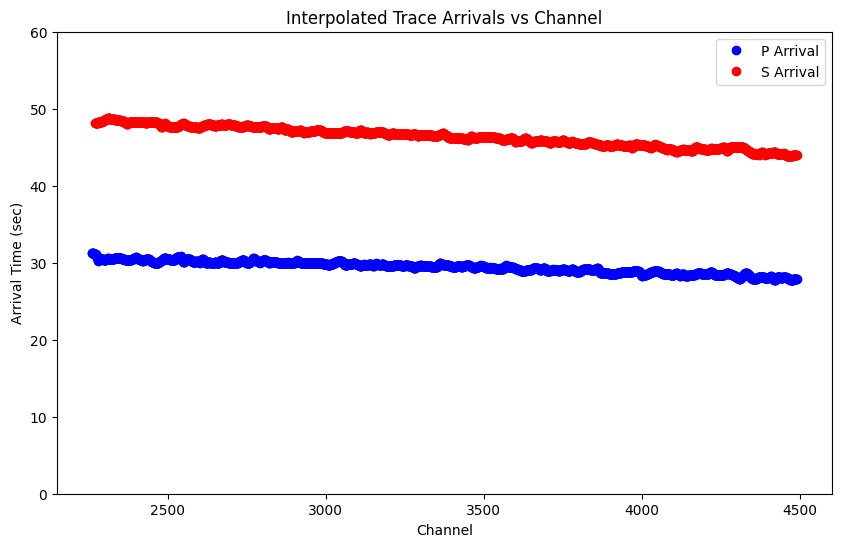

In [943]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated2'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated2'], 'o', color='red', label='S Arrival')

plt.title(f'Interpolated Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

#### File Creation

In [944]:
#create a 2D numpy array of zeros with dimensions (1500, 8530)
# Create a 2D numpy array of zeros with dimensions (1500, 8530)
#p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25
zeros = np.zeros((1500, 8530))

#convert the trace_p_arrival_sec_interpolated2 column to a numpy array and multiply by 25
p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25

#drop Nan values
p_dataset.dropna(subset=['Sample#', 'das_number'], inplace=True)

#match the sample# column and das_number columns to the zeros array with it (sample#, das_number) and assign 1 values to those points
for index, row in p_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        zeros[sample_number, das_number] = 1

#add 1 values each sample for 250 samples after the sample number for the s-wave 
for index, row in p_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        for i in range(1, 25 * p_arrival_mask + 1):
            if sample_number + i < 1500:
                zeros[sample_number + i, das_number] = 1

#save zeroes
np.save('F:/DAS/'+str(p_arrival_mask)+'/p/p-wave_2023_12_30T22_35_56_880000Z_'+str(p_arrival_mask)+'sec_filled.npy', zeros)

#save zeros as a csv file
#np.savetxt('F:/DAS/p-wave_2023-12-30_22.35.57_UTC.np', zeros, delimiter=',')


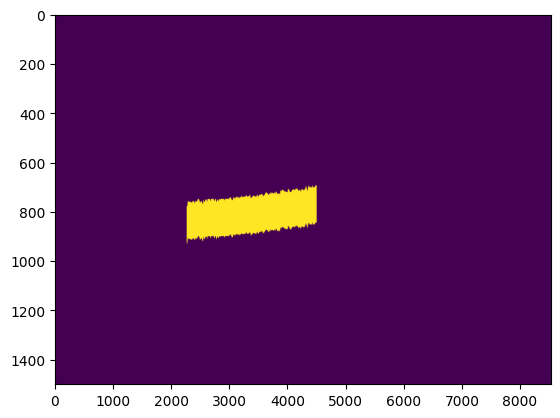

In [945]:
plt.imshow(zeros, aspect='auto')

In [946]:
#create a 2D numpy array of zeros with dimensions (1500, 8530)
# Create a 2D numpy array of zeros with dimensions (1500, 8530)
#p_dataset["Sample#"] = p_dataset['trace_p_arrival_sec_interpolated2']*25
zeros = np.zeros((1500, 8530))

#convert the trace_p_arrival_sec_interpolated2 column to a numpy array and multiply by 25
s_dataset["Sample#"] = s_dataset['trace_s_arrival_sec_interpolated2']*25

#drop Nan values
s_dataset.dropna(subset=['Sample#', 'das_number'], inplace=True)

#match the sample# column and das_number columns to the zeros array with it (sample#, das_number) and assign 1 values to those points
for index, row in s_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        zeros[sample_number, das_number] = 1

#add 1 values each sample for 250 samples after the sample number for the s-wave 
for index, row in s_dataset.iterrows():
    sample_number = int(row['Sample#'])
    das_number = int(row['das_number'])
    if 0 <= sample_number < 1500 and 0 <= das_number < 8530:
        for i in range(1, 25 * s_arrival_mask + 1):
            if sample_number + i < 1500:
                zeros[sample_number + i, das_number] = 1

#save zeroes
np.save('F:/DAS/'+str(s_arrival_mask)+'/s/s-wave_2023_12_30T22_35_56_880000Z_'+str(s_arrival_mask)+'sec_filled.npy', zeros)

#save zeros as a csv file
#np.savetxt('F:/DAS/p-wave_2023-12-30_22.35.57_UTC.np', zeros, delimiter=',')


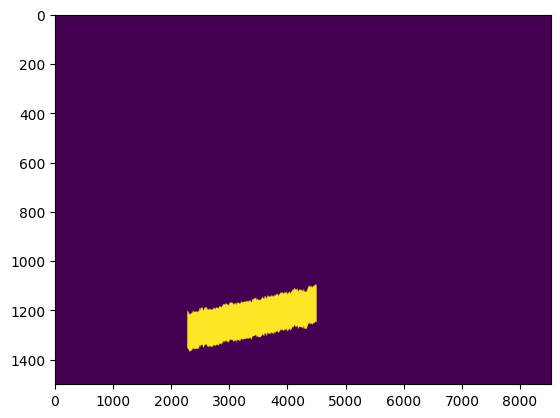

In [947]:
plt.imshow(zeros, aspect='auto')

In [948]:
# #turn previous section into a for loop to iterate through all the unique trace_start_times

# for i in unique_trace_start_times_dropped:
#     if i.strip() == '':
#         print(f"Skipping invalid trace_start_time: '{i}'")
#         continue
    
#     # Define directory and filename
#     # Convert i into a string with format YYYYMMDD_HHMMSS
#     name = str(i).replace(" ", "_").replace(":", "_").replace("-", "_").replace(".", "_")
    
#     directory = "F:/DAS/pick_plots_interpolated_20250401"
#     filename = str(name) + ".png"

#     # Combine directory and filename
#     filepath = os.path.join(directory, filename)

#     # Select the specific row based on the index
#     data = grouped_df_dropped.loc[i]

#     # Select specific columns from the row
#     dropped_dataset = data[['trace_p_arrival_sec', 'trace_s_arrival_sec', 'das_number']]
#     p_dataset = dropped_dataset[['trace_p_arrival_sec','das_number']]
#     s_dataset = dropped_dataset[['trace_s_arrival_sec','das_number']]

#     #drop Nans
#     p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
#     s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)
    
#     #convert das_number column to int
#     p_dataset['das_number'] = p_dataset['das_number'].astype(float)
#     s_dataset['das_number'] = s_dataset['das_number'].astype(float)
#     p_dataset['trace_p_arrival_sec'] = p_dataset['trace_p_arrival_sec'].astype(float)
#     s_dataset['trace_s_arrival_sec'] = s_dataset['trace_s_arrival_sec'].astype(float)

#     # Fit individual polynomials for p_dataset and s_dataset
#     p_coeffs_individual = np.polyfit(p_dataset['das_number'].values, p_dataset['trace_p_arrival_sec'].values, deg=1)
#     s_coeffs_individual = np.polyfit(s_dataset['das_number'].values, s_dataset['trace_s_arrival_sec'].values, deg=1)

#     # # Calculate the trends
#     p_trend_individual = np.polyval(p_coeffs_individual, pd.to_numeric(p_dataset['das_number']))
#     s_trend_individual = np.polyval(s_coeffs_individual, pd.to_numeric(s_dataset['das_number']))

#     #Detrend by subtracting the individual trends
#     p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
#     s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual

#     #calculate 2 standard deviations from the mean for the trace_p_arrival_sec and trace_s_arrival_sec columns
#     p_dataset_mean = p_dataset['trace_p_arrival_sec_detrended'].mean()
#     p_dataset_std = p_dataset['trace_p_arrival_sec_detrended'].std()
#     p_dataset_2std = 2 * p_dataset_std

#     # do it for s_dataset
#     s_dataset_mean = s_dataset['trace_s_arrival_sec_detrended'].mean()
#     s_dataset_std = s_dataset['trace_s_arrival_sec_detrended'].std()
#     s_dataset_2std = 2 * s_dataset_std
    
#     #save values for index which are greater than 2 standard deviations from the mean for the trace_p_arrival_sec column
#     p_dataset_outliers = p_dataset[(p_dataset['trace_p_arrival_sec_detrended'].values > p_dataset_2std) | 
#                                    (p_dataset['trace_p_arrival_sec_detrended'].values < -p_dataset_2std)]

#     #replace p_dataset trace_p_arrival_sec and trace_p_arrival_sec_detrended with Nans for the das_number values that occur in p_dataset_outliers
#     p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec'] = np.nan
#     p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec_detrended'] = np.nan

#     # Save values for index which are greater than 2 standard deviations from the mean for the trace_s_arrival_sec column
#     s_dataset_outliers = s_dataset[(s_dataset['trace_s_arrival_sec_detrended'].values > s_dataset_2std) | 
#                                    (s_dataset['trace_s_arrival_sec_detrended'].values < -s_dataset_2std)]

#     # Replace s_dataset trace_s_arrival_sec and trace_s_arrival_sec_detrended with NaNs for the das_number values that occur in s_dataset_outliers
#     s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec'] = np.nan
#     s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec_detrended'] = np.nan

#     #interpolate the missing values from the p_outliers and s_outliers dataframes using the interpolate function
#     p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
#     s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()

#     new_array = arange(1, 10000, 1)

#     # Create a DataFrame with all possible das_number values from new_array
#     full_range_df = pd.DataFrame({'das_number': new_array})

#     # Merge with p_dataset and s_dataset to include missing values
#     p_dataset = full_range_df.merge(p_dataset, on='das_number', how='left')
#     s_dataset = full_range_df.merge(s_dataset, on='das_number', how='left')

#     #interpolate again to fill the missing values based on trace_p_arrivaL_sec_interpolated
#     p_dataset['trace_p_arrival_sec_interpolated2'] = p_dataset['trace_p_arrival_sec_interpolated'].interpolate()

#     #interpolate again to fill the missing values based on trace_s_arrivaL_sec_interpolated
#     s_dataset['trace_s_arrival_sec_interpolated2'] = s_dataset['trace_s_arrival_sec_interpolated'].interpolate()

#     # Plot the interpolated values
#     plt.figure(figsize=(10, 6))
  
#     plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated2'], 'o', color='blue', label='P Arrival')
#     plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated2'], 'o', color='red', label='S Arrival')

#     plt.title(f'Interpolated Trace Arrivals vs Channel for {i}')
#     plt.xlabel('Channel')
#     plt.ylabel('Arrival Time (sec)')
#     plt.ylim(0, 60)
#     plt.legend()

#     # Set the number of ticks to 5
#     plt.gca().xaxis.set_major_locator(MaxNLocator(5))
#     plt.savefig(filepath)
#     plt.close()